# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import (
    PowerTransformer
)











pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)
# Instead of getting output as NumPy array, get it as a pandas DataFrame
from sklearn import set_config
set_config(transform_output="pandas")

# Reading data 

In [2]:
df = pd.read_csv(r'C:\Users\ABC\Desktop/bhushan/property_project/data/property_cleaned_data.csv')

In [3]:
df.head()

id                      builder                 project_name  \
0  cardid69429251               raymond realty  tenx habitat raymond realty   
1  cardid69427147               paradise group    paradise sai world empire   
2  cardid71764335  n rose developers pvt. ltd.               northern hills   
3  cardid71631505                  avant group             avant heritage v   
4  cardid72558997                      mj shah                    centrionx   

   project_in_acres         location         city  lattitude  longitude  \
0            1.3006     pokhran road        thane  19.207777  72.967479   
1           17.0000         kharghar  navi mumbai  19.080605  73.073939   
2            1.0000     dahisar east       mumbai  19.248778  72.863793   
3            1.0000  jogeshwari east       mumbai  19.138704  72.859964   
4            2.0000          govandi       mumbai  19.055308  72.922850   

  property_type              status  ... hospital_within_2km tourist_mean_km  \
0  new property  under construction  ...                 NaN             NaN   
1  new property  under construction  ...                 NaN             NaN   
2  new property  under construction  ...                 NaN             NaN   
3  new property  under construction  ...                 NaN             NaN   
4  new property  under construction  ...                 NaN             NaN   

   tourist_min_km  tourist_within_2km overall_min_mean_km  \
0             NaN                 NaN            1.833333   
1             NaN                 NaN            2.760000   
2             NaN                 NaN            5.380000   
3             NaN                 NaN                 NaN   
4             NaN                 NaN            1.200000   

   overall_avg_mean_km  overall_min_min_km  overall_avg_min_km  \
0             3.044444                 1.2            2.100000   
1             3.980000                 1.1            1.900000   
2            10.417917                 0.2            4.900000   
3                  NaN                 NaN                 NaN   
4             2.370000                 1.2            1.566667   

   total_within_2km           seller  
0               2.0     organization  
1               2.0  realestateagent  
2               8.0     organization  
3               0.0     organization  
4               4.0     organization  

[5 rows x 53 columns]

In [4]:
df.shape

(11857, 53)

# Preliminary Analysis

In [5]:
# check for missing values in the data

df.isnull().sum()

id                                0
builder                        4255
project_name                   3479
project_in_acres               5730
location                        481
city                              0
lattitude                       464
longitude                       464
property_type                     2
status                           82
construction                   1048
ownership                      3590
flat_on_floor                  2287
total_floor                    2054
furnish                          39
area                              5
bed                               0
bath                             30
balcony                        5801
lift                           5419
parking                        6208
overlooking                    3945
facing                         3716
flooring                       4430
extra_rooms                    5275
costpersqft                       6
emi                               2
price_category              

In [6]:
# number of rows in the data that have missing values

missing_rows = (
    df
    .isnull()
    .any(axis=1)
    .sum()
)

print(f'There are {missing_rows} rows with missing values in the data.')

print(f"It accounts for {(missing_rows/df.shape[0])*100:.2f}% of the data")

There are 11853 rows with missing values in the data.
It accounts for 99.97% of the data


In [7]:
# check for duplicate rows in the data

df.duplicated().sum()

0

`observation`  
There are no duplicate rows in the data and none were created by our data cleaning step

In [8]:
# data types of features

df.dtypes

id                             object
builder                        object
project_name                   object
project_in_acres              float64
location                       object
city                           object
lattitude                     float64
longitude                     float64
property_type                  object
status                         object
construction                   object
ownership                      object
flat_on_floor                 float64
total_floor                   float64
furnish                        object
area                          float64
bed                           float64
bath                          float64
balcony                       float64
lift                          float64
parking                       float64
overlooking                    object
facing                         object
flooring                       object
extra_rooms                    object
costpersqft                   float64
emi         

In [9]:
#Description of our dataset
df.describe().T

count          mean           std         min  \
project_in_acres             6127.0     16.390482    115.073097    0.000000   
lattitude                   11393.0     19.146894      0.119007   18.795002   
longitude                   11393.0     72.905679      0.086504   72.704548   
flat_on_floor                9570.0     10.872623     10.129539   -2.000000   
total_floor                  9803.0     22.197389     16.215548    1.000000   
area                        11852.0    872.251097    572.523406  180.000000   
bed                         11857.0      2.161086      0.977148    1.000000   
bath                        11827.0      2.315380      0.962674    1.000000   
balcony                      6056.0      1.845773      1.049238    1.000000   
lift                         6438.0      3.117428      1.715025    1.000000   
parking                      5649.0      1.391220      0.720674    1.000000   
costpersqft                 11851.0  27718.066886  15823.093316  289.000000   
emi                         11855.0      1.307408      1.882684    0.007450   
price                       11857.0      2.898266      4.173830    0.017000   
education_mean_km            7615.0      7.778245     14.584922    0.100000   
education_min_km             7615.0      2.384399      4.978229    0.100000   
education_within_2km         7615.0      1.860538      1.451333    0.000000   
transport_mean_km            5624.0      3.872515      5.207154    0.000100   
transport_min_km             5624.0      2.245767      3.827838    0.000100   
transport_within_2km         5802.0      1.227335      1.038572    0.000000   
shopping_centre_mean_km      7994.0      3.361921      3.605331    0.100000   
shopping_centre_min_km       7994.0      1.473787      2.604857    0.000100   
shopping_centre_within_2km   7994.0      2.241181      1.592355    0.000000   
commercial_hub_mean_km       6736.0      6.854038      7.154563    0.100000   
commercial_hub_min_km        6736.0      4.604604      6.947253    0.000100   
commercial_hub_within_2km    6741.0      1.056668      1.304543    0.000000   
hospital_mean_km             3186.0      1.409351      1.294693    0.166667   
hospital_min_km              3186.0      0.765072      0.502975    0.000100   
hospital_within_2km          3293.0      1.767993      0.949635    0.000000   
tourist_mean_km              1500.0      1.036600      0.285812    0.100000   
tourist_min_km               1500.0      0.941800      0.293570    0.100000   
tourist_within_2km           1551.0      2.075435      1.133699    0.000000   
overall_min_mean_km          8174.0      1.723874      2.628123    0.000100   
overall_avg_mean_km          8174.0      4.770792      5.036910    0.100000   
overall_min_min_km           8174.0      0.710828      1.191918    0.000100   
overall_avg_min_km           8174.0      2.360314      2.939515    0.000100   
total_within_2km            11857.0      4.669731      4.618151    0.000000   

                                     25%           50%           75%  \
project_in_acres                1.000000      3.000000      8.499900   
lattitude                      19.062055     19.143923     19.210299   
longitude                      72.839809     72.872695     72.963466   
flat_on_floor                   4.000000      8.000000     15.000000   
total_floor                     8.000000     19.000000     30.000000   
area                          540.000000    730.000000   1034.000000   
bed                             1.000000      2.000000      3.000000   
bath                            2.000000      2.000000      3.000000   
balcony                         1.000000      1.000000      3.000000   
lift                            2.000000      3.000000      4.000000   
parking                         1.000000      1.000000      2.000000   
costpersqft                 16923.000000  25578.000000  34284.500000   
emi                             0.430000      0.800000      1.440000   
price              

In [10]:
#Description of our dataset
df.describe(include='O').T

count unique                 top  freq
id              11857  11857      cardid69429251     1
builder          7602   1143         lodha group   466
project_name     8378   2935     oberoi sky city    96
location        11376    901         mulund west   335
city            11857      4              mumbai  7543
property_type   11855      2              resale  6702
status          11775      3       ready to move  7225
construction    10809      7  under construction  4547
ownership        8267      4            freehold  5906
furnish         11818      3         unfurnished  7461
overlooking      7912      7           main road  2240
facing           8141      8                east  4721
flooring         7427    252           vitrified  3666
extra_rooms      6582     35       none of these  2999
price_category  11857     13         1.00 - 1.99  3461
seller          11857      3     realestateagent  8096

In [11]:
#find the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)
print("-"*100)
print(f'total numerical columns : {len(numerical_columns)}')

Index(['project_in_acres', 'lattitude', 'longitude', 'flat_on_floor',
       'total_floor', 'area', 'bed', 'bath', 'balcony', 'lift', 'parking',
       'costpersqft', 'emi', 'price', 'education_mean_km', 'education_min_km',
       'education_within_2km', 'transport_mean_km', 'transport_min_km',
       'transport_within_2km', 'shopping_centre_mean_km',
       'shopping_centre_min_km', 'shopping_centre_within_2km',
       'commercial_hub_mean_km', 'commercial_hub_min_km',
       'commercial_hub_within_2km', 'hospital_mean_km', 'hospital_min_km',
       'hospital_within_2km', 'tourist_mean_km', 'tourist_min_km',
       'tourist_within_2km', 'overall_min_mean_km', 'overall_avg_mean_km',
       'overall_min_min_km', 'overall_avg_min_km', 'total_within_2km'],
      dtype='object')
----------------------------------------------------------------------------------------------------
total numerical columns : 37


In [12]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)
print("-" * 100)
print(f'Total categorical columns: {len(categorical_columns)}')

Index(['id', 'builder', 'project_name', 'location', 'city', 'property_type',
       'status', 'construction', 'ownership', 'furnish', 'overlooking',
       'facing', 'flooring', 'extra_rooms', 'price_category', 'seller'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Total categorical columns: 16


# Functions 

about data : value_counts and unique categories 

In [13]:
def analyze_column(df, feature, top_n=None, threshold=None):
    import warnings
    warnings.filterwarnings("ignore")

    col = df.loc[:, feature].copy()

    print('-' * 50)
    print(f"Quick Glance of '{feature}':")
    display(col.head())

    print('-' * 50)
    print(f"Meta-data for '{feature}':")
    print(f"{'Data Type':15}: {col.dtype}")
    print(f"{'Cardinality':15}: {col.nunique(dropna=True)}") #prints the number of unique (non-NaN) values
    print(f"{'Missing Data':15}: {col.isna().sum():,} rows ({col.isna().mean() * 100:.2f} %)")
    print(f"{'Available Data':15}: {col.count():,} / {len(col):,} rows")

    if col.dtype in ["float64", "int64"]:  # Numerical column
        print('-' * 50)
        print(f"Descriptive Statistics for '{feature}':")
        display(col.describe())

        print('-' * 50)
        print(f"Top Frequent Values in '{feature}':")

        value_counts = col.value_counts().to_frame(name='count')
        total = col.count()  #Use non-null count to get valid total
        value_counts['percentage'] = (value_counts['count'] / total * 100).round(2)
        value_counts['cum_percent'] = value_counts['percentage'].cumsum().round(2)

        # Filter by threshold (before top_n)
        if threshold is not None:
            value_counts = value_counts[value_counts['cum_percent'] <= threshold]

        # Apply top_n filter if given
        if top_n is not None:
            display(value_counts.head(top_n))
        else:
            display(value_counts)

        # After displaying, print the values list
        if threshold is not None:
            value_list = value_counts.index.tolist()
            print(f"\n{len(value_list)} Values in '{feature}' with cumulative percentage ≤ {threshold}%:")
            print(value_list)


about categorical data : unique categories in column ,missing values in column ,percentage of each categories in column   

In [14]:
# Categorical summary function with top_n and threshold
def cat_summary(data, var, top_n=None, threshold=None):
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")

    col = data.loc[:, var].copy()

    # Quick Glance
    print('-'*50)
    print('Quick Glance:')
    display(col.head())

    # Meta-data
    print('-'*50)
    print('Meta-data')
    print(f"{'Data Type':15}: {col.dtype}")
    print(f"{'Cardinality':15}: {col.nunique(dropna=True)} categories")
    print(f"{'Missing Data':15}: {col.isna().sum():,} rows ({col.isna().mean() * 100:.2f} %)")
    print(f"{'Available Data':15}: {col.count():,} / {len(col):,} rows")

    # Summary
    print('-'*50)
    print('summary:')
    display(col.describe().rename("").to_frame())

    # Category Distribution
    print('-'*50)
    print('Categories Distribution:')
    vc = col.value_counts()
    total = col.count()  #Use count() to exclude NaN from percentage calculations

    percentage = (vc / total * 100).round(2)
    cum_percent = percentage.cumsum().round(2)

    vc_df = pd.DataFrame({
        "count": vc,
        "percentage": percentage,
        "cum_percent": cum_percent
    })
    vc_df.index.name = "category"

    # Apply threshold first
    if threshold is not None:
        vc_df = vc_df[vc_df['cum_percent'] <= threshold]

    # Apply top_n filter
    if top_n is not None:
        vc_df = vc_df.head(top_n)

    display(vc_df)

    # Print values within threshold
    if threshold is not None:
        values_list = vc_df.index.tolist()
        print(f"\n{len(values_list)} Categories in '{var}' with cumulative percentage ≤ {threshold}%:")
        print(values_list)


Function to visualize the distribution of a numerical feature using Histogram, QQ Plot, and Box Plot

In [15]:
def num_three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout=True, figsize=(20, 8))
    grid = gridspec.GridSpec(ncols=4, nrows=6, figure=fig)

    ax1 = fig.add_subplot(grid[0:3, :3])  # Increase histogram height
    ax1.set_title('Histogram')
    sns.histplot(df[feature], kde=True, ax=ax1)
    ax1.axvline(x=df[feature].mean(), c='red', label="Mean")
    ax1.axvline(x=df[feature].median(), c='green', label="Median")
    ax1.legend()

    ax2 = fig.add_subplot(grid[3:6, :3])  # Increase probability plot height
    ax2.set_title('QQ Plot')
    stats.probplot(df[feature], plot=ax2)

    ax3 = fig.add_subplot(grid[:, 3])
    ax3.set_title('Box Plot')
    sns.boxplot(y=df[feature], ax=ax3)

    plt.show()

Bar Plot and pie chart Function

In [16]:
def bar_pie_chart_plot(df, feature, bar_top_n=None, pie_top_n=None):
    fig = plt.figure(constrained_layout=True, figsize=(25, 8))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)  # 2 columns: Bar plot + Pie chart

    # Get value counts and sort in descending order
    value_counts = df[feature].value_counts().sort_values(ascending=False)

    # Bar Chart Data (Apply bar_top_n filter if specified)
    bar_data = value_counts.reset_index()
    if bar_top_n is not None and bar_top_n < len(value_counts):
        bar_data = bar_data.iloc[:bar_top_n]
    bar_data.columns = [feature, 'count']

    # Pie Chart Data (Top N categories + "Others" only if needed)
    if pie_top_n is not None and pie_top_n < len(value_counts):
        top_values = value_counts.iloc[:pie_top_n]  # Keep only top N categories
        others_sum = value_counts.iloc[pie_top_n:].sum()  # Sum of remaining categories
        pie_data = pd.concat([top_values, pd.Series({'Others': others_sum})])  # Add "Others"
        pie_data = pie_data.reset_index()
        pie_data.columns = [feature, 'count']
    else:
        pie_data = value_counts.reset_index()
        pie_data.columns = [feature, 'count']

    pie_data = pie_data.sort_values(by="count", ascending=False)  # Ensure sorting

    # Bar Chart
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title(f'{feature} Distribution - Bar Chart (Top {bar_top_n if bar_top_n else "All"})', fontsize=14)

    sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature], 
                palette='tab10', edgecolor='black')

    # Add count labels on top of bars
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, color='black')

    ax1.set_xticks(range(len(bar_data[feature])))  # Explicitly set tick positions
    ax1.set_xticklabels(bar_data[feature], rotation=45, ha='right', fontsize=10)
    ax1.grid(axis="y", linestyle="--", alpha=0.7)
    ax1.set_ylabel("Count")

    # Pie Chart
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title(f'{feature} Distribution - Pie Chart (Top {pie_top_n if pie_top_n else "All"})', fontsize=14)

    ax2.pie(pie_data['count'], labels=pie_data[feature], autopct='%1.1f%%', colors=sns.color_palette('tab10'), 
            wedgeprops={'edgecolor': 'black'},radius=1.1)

    plt.show()

function calculates skewness, kurtosis, quartiles (Q1 & Q3), interquartile range (IQR), lower & upper whiskers, and user-specified quantiles for a given numerical feature in a DataFrame.

In [17]:
# gives detailed summary of numeric features
def num_summary(data, var):
  import warnings
  warnings.filterwarnings("ignore")

  col = data.loc[:, var].copy()

  # quantiles
  print('-'*50)
  print('Percentiles:')  
  display(
      col
      .quantile([0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0])
      .rename(index=lambda val: f"{val * 100:.0f}")
      .rename("value")
      .rename_axis(index="percentile")
      .to_frame()
  )

  # central tendancy
  print('-'*50)
  print('Central Tendancy:')
  display(
      pd
      .Series({
          "mean": col.mean(),
          "trimmed mean (5%)": stats.trim_mean(col.dropna().values, 0.05),
          "trimmed mean (10%)": stats.trim_mean(col.dropna().values, 0.1),
          "median": col.median()
      })
      .rename("value")
      .to_frame()
  )

  # spread
  print('-'*50)
  print('Measure of Spread:')
  std = col.std()
  q1 = col.quantile(0.25)
  q3 = col.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  display(
      pd
      .Series({
          "var": col.var(),
          "std": std,
          "IQR": iqr,
          "lower_bound": lower_bound,
          "upper_bound": upper_bound,
          "mad": stats.median_abs_deviation(col.dropna()),
          "coef_variance": std / col.mean()
      })
      .rename("value")
      .to_frame()
  )

  # skewness and kurtosis
  print('-'*50)
  print('Skewness and Kurtosis:')
  display(
      pd
      .Series({
          "skewness": col.skew(),
          "kurtosis": col.kurtosis()
      })
      .rename("value")
      .to_frame()
  )

  alpha = 0.05
  # test for normality to chk numerical columns follows the normal distribution or not 
  print('-'*50)
  print('Hypothesis Testing for Normality:')

  from scipy.stats import jarque_bera

  # Jarque-Bera Test
  print('Jarque-Bera Test:')
  jb_test = jarque_bera(col.dropna().values)
  jb_statistic = jb_test.statistic
  jb_pvalue = jb_test.pvalue

  alpha = 0.05  # significance level

  print(f"{'Significance Level':21}: {alpha}")
  print(f"{'Null Hypothesis':21}: The data is normally distributed")
  print(f"{'Alternate Hypothesis':21}: The data is not normally distributed")
  print(f"{'p-value':21}: {jb_pvalue}")
  print(f"{'Test Statistic':21}: {jb_statistic}")

  if jb_pvalue < alpha:
      print(f"- Since p-value is less than alpha ({alpha}), we Reject the Null Hypothesis at {alpha * 100}% significance level")
      print("- CONCLUSION: We conclude that the data sample is not normally distributed")
  else:
      print(f"- Since p-value is greater than alpha ({alpha}), we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
      print("- CONCLUSION: We conclude that the data sample is normally distributed")


  # anderson-darling test
  print('-'*50)
  print('Anderson-Darling Test:')
  ad_test = stats.anderson(col.dropna().values, dist="norm")
  ad_statistic = ad_test.statistic
  ad_critical = ad_test.critical_values[2]
  print(f"{'Significance Level':21}: {alpha}")
  print(f"{'Null Hypothesis':21}: The data is normally distributed")
  print(f"{'Alternate Hypothesis':21}: The data is not normally distributed")
  print(f"{'Critical Value':21}: {ad_critical}")
  print(f"{'Test Statistic':21}: {ad_statistic}")
  if ad_statistic >= ad_critical:
    print(f"- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is not normally distributed")
  else:
    print(f"- Since the Test-statistic is less than Critical Value, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is normally distributed")

- If skewness = 0 → Symmetrical distribution.  
- If skewness ≠ 0 → Non-symmetrical distribution.  
- If skewness < 0 → Left-skewed (long tail on the left).  
- If skewness > 0 → Right-skewed (long tail on the right).

CV

- CV shows how much the data is spread out compared to its mean.  
- Low CV (0–0.2) → Data is tightly clustered → low spread.  
- Moderate CV (0.2–0.5) → Data is moderately spread out.  
- High CV (>0.5) → Data is highly spread out relative to the mean.  
- Example: CV = 0.1667 → Standard deviation is 16.67% of the mean.


hypothesis testing for categorical columns : ANOVA test and kruskal-wallis test

In [18]:
# hypothesis testing for association between numeric and categorical variable
def num_cat_hyp_testing(data, num_var, cat_var, alpha=0.05):
  display_html(2, f"Hypothesis Test for Association between {num_var} and {cat_var}")

  groups_df = (
      data
      .dropna(subset=[num_var])
      .groupby(cat_var)
  )
  groups = [group[num_var].values for _, group in groups_df]

  # anova test
  anova = stats.f_oneway(*groups)
  statistic = anova[0]
  pvalue = anova[1]
  display_html(3, "ANOVA Test")
  print(f"- {'Significance Level':21}: {alpha * 100}%")
  print(f"- {'Null Hypothesis':21}: The groups have similar population mean")
  print(f"- {'Alternate Hypothesis':21}: The groups don't have similar population mean")
  print(f"- {'Test Statistic':21}: {statistic}")
  print(f"- {'p-value':21}: {pvalue}")
  if pvalue < alpha:
    print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {num_var} and {cat_var} are associated to each other")
  else:
    print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {num_var} and {cat_var} are not associated to each other")

  # kruskal-wallis test
  kruskal = stats.kruskal(*groups)
  statistic = kruskal[0]
  pvalue = kruskal[1]
  display_html(3, "Kruskal-Wallis Test")
  print(f"- {'Significance Level':21}: {alpha * 100}%")
  print(f"- {'Null Hypothesis':21}: The groups have similar population median")
  print(f"- {'Alternate Hypothesis':21}: The groups don't have similar population median")
  print(f"- {'Test Statistic':21}: {statistic}")
  print(f"- {'p-value':21}: {pvalue}")
  if pvalue < alpha:
    print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {num_var} and {cat_var} are associated to each other")
  else:
    print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {num_var} and {cat_var} are not associated to each other")


In [19]:
def num_univar_plots(data, var, bins=10, figsize=(13, 8)):

    col = data.loc[:, var].copy()

    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.ravel()

    # Histogram
    sns.histplot(
        data,
        x=var,
        bins=bins,
        kde=True,
        color="#1973bd",
        ax=axes[0],
    )
    sns.rugplot(
        data,
        x=var,
        color="black",
        height=0.035,
        ax=axes[0]
    )
    axes[0].set(title="Histogram")

    # CDF
    sns.ecdfplot(
        data,
        x=var,
        ax=axes[1],
        color="red"
    )
    axes[1].set(title="CDF")

    # Power Transform
    data = data.assign(**{
        f"{var}_pwt": (
            PowerTransformer()
            .fit_transform(data.loc[:, [var]])
        )
    })
    sns.kdeplot(
        data,
        x=f"{var}_pwt",
        fill=True,
        color="#f2b02c",
        ax=axes[2]
    )
    sns.rugplot(
        data,
        x=f"{var}_pwt",
        color="black",
        height=0.035,
        ax=axes[2]
    )
    axes[2].set(title="Power Transformed")  #by default it use yeo-johnson transform 

    # Violin Plot
    sns.violinplot(
        data,
        x=var,
        color="#ed68b4",
        ax=axes[3]
    )
    axes[3].set(title="Violin Plot")

    plt.tight_layout()
    plt.show()


Let's first analyze the target column, then perform univariate analysis on numerical columns, and finally examine categorical columns.

# price 

In [20]:
analyze_column(df, 'price', top_n=5,threshold=20)

--------------------------------------------------
Quick Glance of 'price':


0    1.80
1    2.37
2    1.80
3    1.64
4    1.26
Name: price, dtype: float64

--------------------------------------------------
Meta-data for 'price':
Data Type      : float64
Cardinality    : 1166
Missing Data   : 0 rows (0.00 %)
Available Data : 11,857 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'price':


count    11857.000000
mean         2.898266
std          4.173830
min          0.017000
25%          0.950000
50%          1.780000
75%          3.200000
max         75.000000
Name: price, dtype: float64

--------------------------------------------------
Top Frequent Values in 'price':


count  percentage  cum_percent
price                                
1.25     150        1.27         1.27
1.10     148        1.25         2.52
1.20     130        1.10         3.62
2.50     130        1.10         4.72
1.50     124        1.05         5.77


20 Values in 'price' with cumulative percentage ≤ 20%:
[1.25, 1.1, 1.2, 2.5, 1.5, 1.4, 1.75, 1.8, 2.0, 1.9, 0.9, 1.35, 2.25, 1.0, 0.75, 0.95, 1.3, 2.3, 1.6, 1.15]


`observation`
  - No missing values.
  - Mean Price: The average price is approximately 2.89 crores.
  - Median Price: The median (or 50th percentile) price is 1.78 crores.
  - The standard deviation is 4.17 Cr, indicating significant variation in prices.
  - Range: Prices range from a minimum of 0.01 crores to a maximum of 75 crores.
  - max price is 75 cr and 75th percentile is 3.20cr this clearly indicatie that there is outliers in the data
  - IQR: The interquartile range is from 0.95 crores(25th percentile) to 3.20 crores(50th percentile).

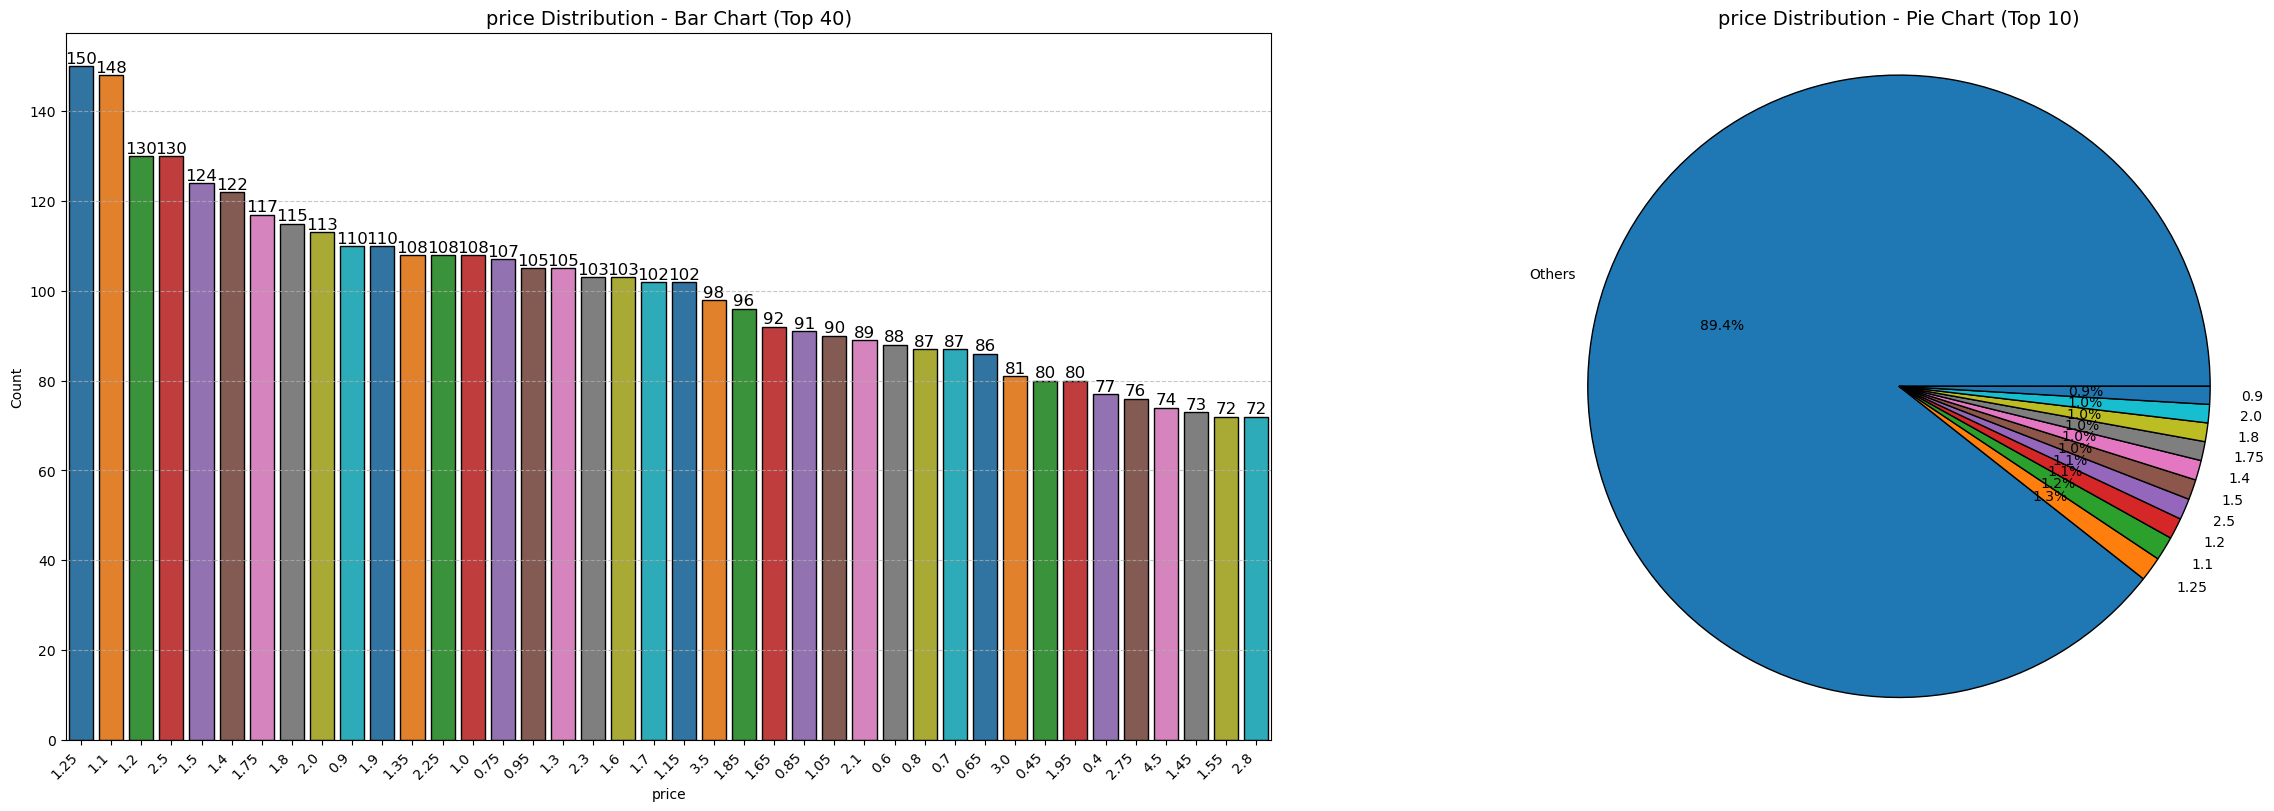

In [21]:
bar_pie_chart_plot(df, 'price', bar_top_n=40, pie_top_n=10)

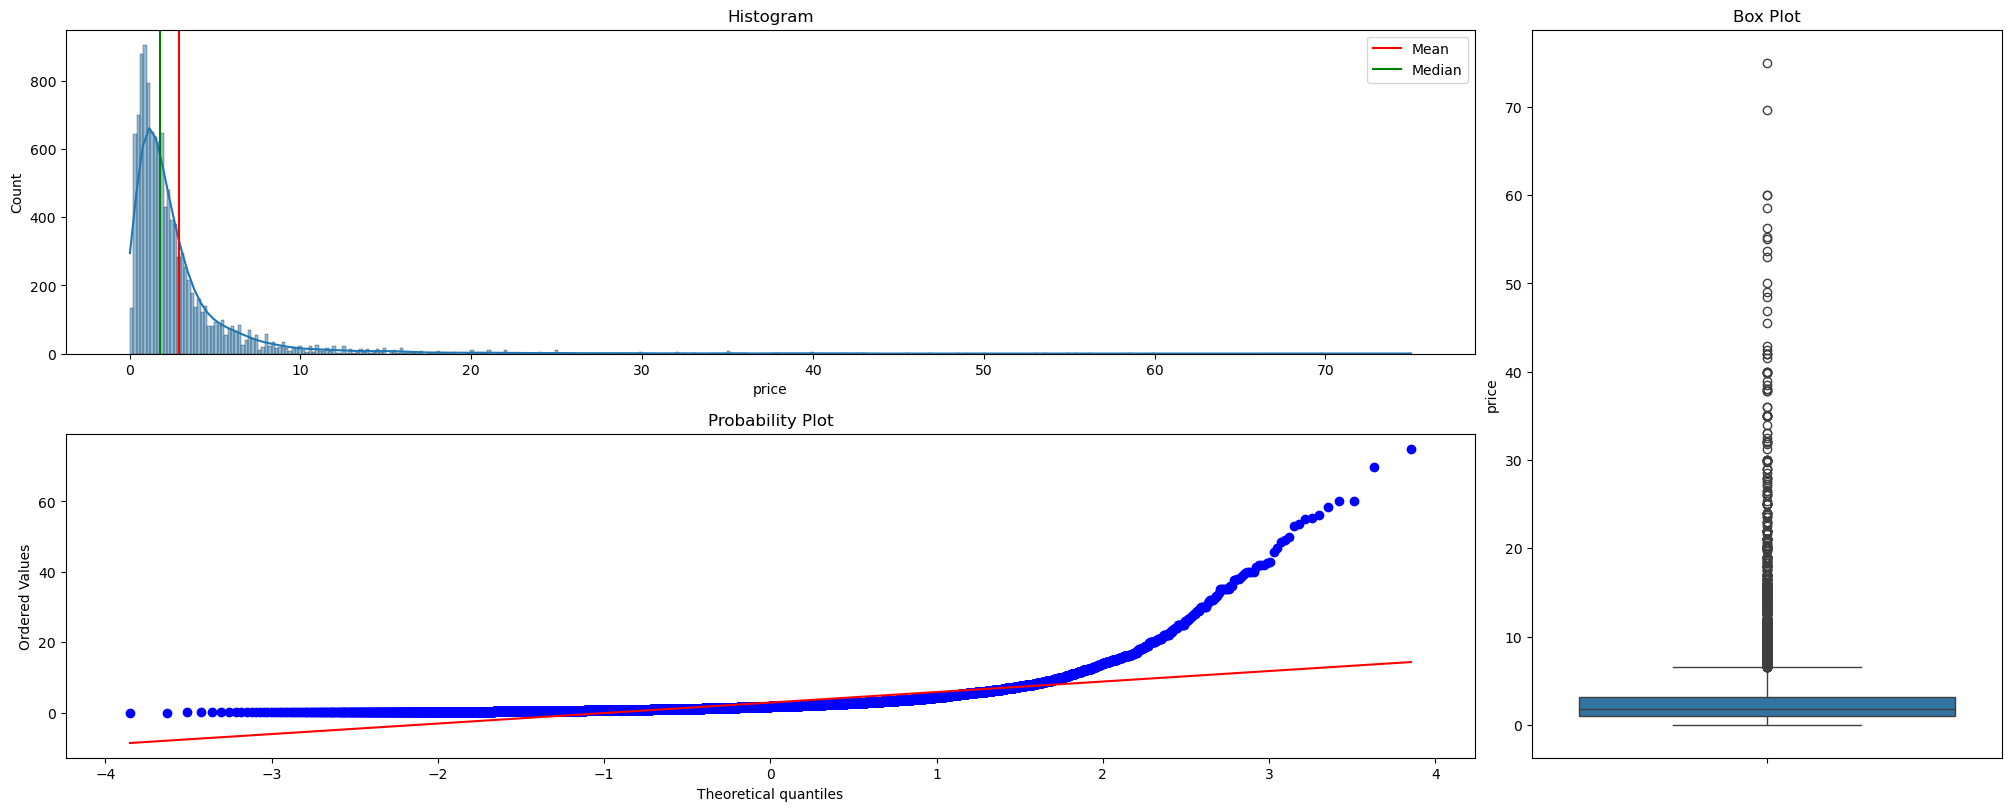

In [22]:
num_three_chart_plot(df, 'price')

`observation`
- Right-skewed distribution → Most prices are in the lower range (below 5 Cr).
- Box plot → Prices above ~10 Cr are likely outliers.
- Majority of prices fall within 0.95–3.2 Cr, with a dense cluster near the median.

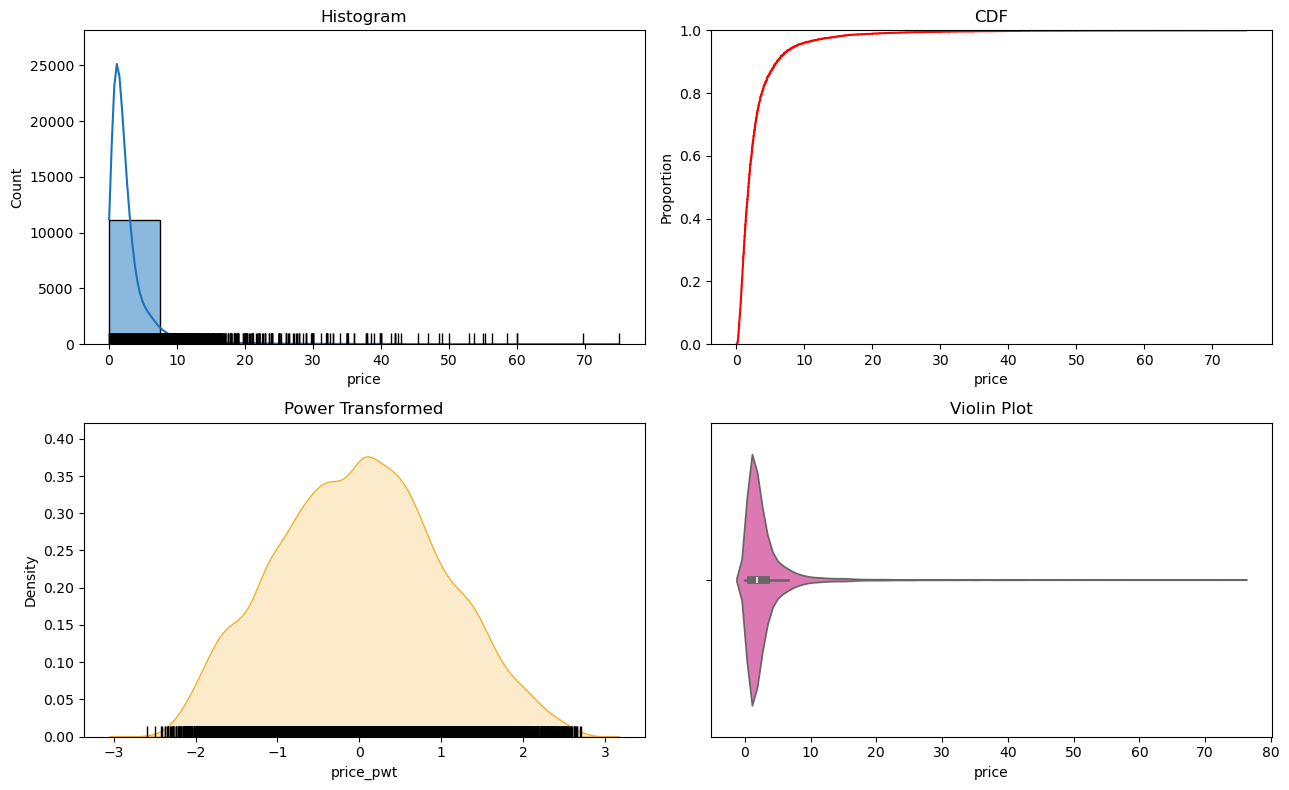

In [23]:
num_univar_plots(df, 'price', bins=10)

`observation`
- Most of the flats are priced below ₹10 Cr.
- Compared to properties below ₹10 Cr, there are fewer properties above ₹10 Cr. The highest price is ₹80 Cr, as shown by the rug plot.
- Power Transform: In this, we use Yeo-Johnson tranform, which tries to make the distribution of the feature as symmetric as possible.(Note: Power Transform does not make the feature perfectly Gaussian — it only tries to reduce skewness and improve symmetry.    ) but the prices can not be negative and hence log1p transformation as shown below
- and as price only has positice values and it is strong right skewed hence we can use log1p

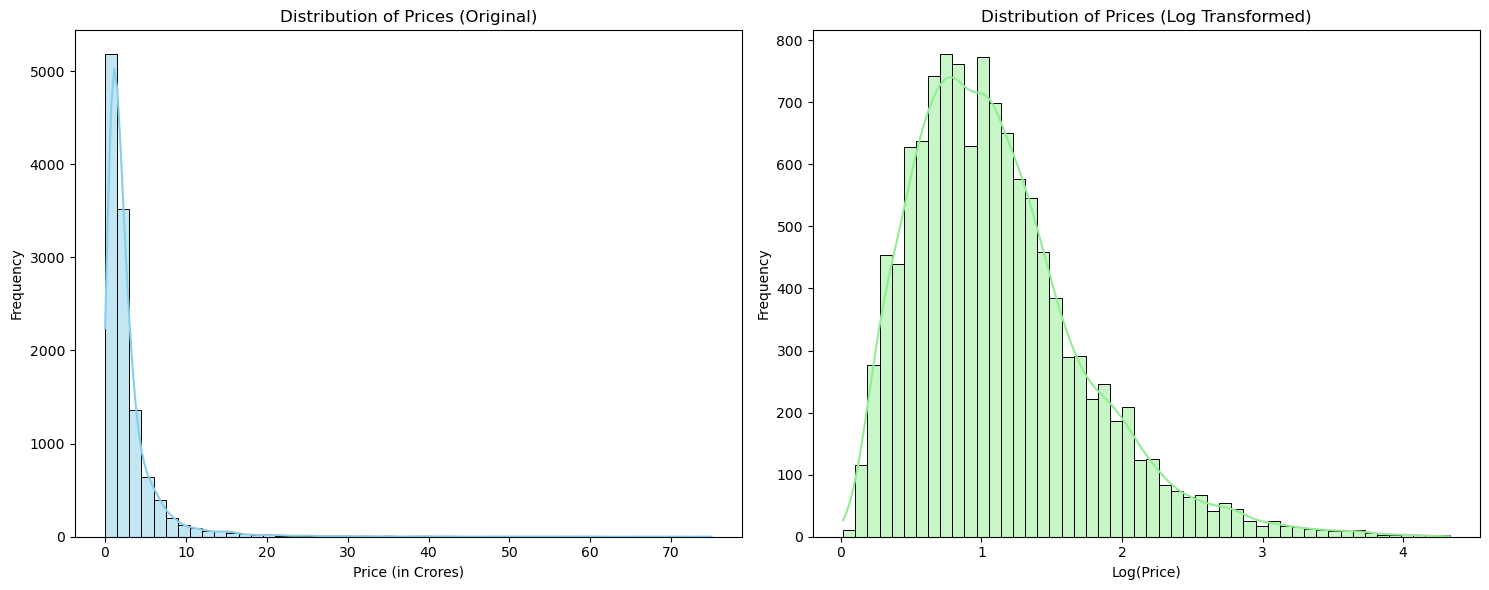

In [24]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. 
It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [25]:
num_summary(df,'price')

--------------------------------------------------
Percentiles:


value
percentile         
0            0.0170
5            0.3600
10           0.5400
25           0.9500
50           1.7800
75           3.2000
90           6.0000
95           8.7160
99          20.6704
100         75.0000

--------------------------------------------------
Central Tendancy:


value
mean                2.898266
trimmed mean (5%)   2.286461
trimmed mean (10%)  2.100391
median              1.780000

--------------------------------------------------
Measure of Spread:


value
var            17.420854
std             4.173830
IQR             2.250000
lower_bound    -2.425000
upper_bound     6.575000
mad             0.980000
coef_variance   1.440113

--------------------------------------------------
Skewness and Kurtosis:


value
skewness   5.962640
kurtosis  55.294556

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 1579466.2970680054
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 1423.7763602565356
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`observation`
- skewness 5.96, which is highly positive
- right-skewed distribution
- kurtosis 55.30, which is extremely high.
- High kurtosis indicates a leptokurtic distribution**(leptokurtic = sample kurtosis -3 > 0 and in leptokurtic we have Heavy tails, sharp peak, more outliers than normal)
- 95% Quantile: 95% of properties are priced below 8.71 crores.
- 99% Quantile: 99% of properties are priced below 20.66 crores, indicating that very few properties are priced above this value.
- 50% of properties are below 1.78cr and 50% of properties are above 1.78cr
- 25 percentile is 0.950 and 50 percentile is 1.780 means 25 percent data is above 0.950 and less than 1.780 cr
- Q1=0.95  ,Q2=1.78 , Q3= 3.20
- on an average flats are 2.89 cr
- trimmed mean 5% means after sorting price col, we trimmed the upper and lower 5% values and then find the mean of the remaining values, same for trimmed mean 10%
- mean = 2.89 and median =1.78 , price column is skewed
- std dev = 4.17, this means on an avg, price of flat is ±4.17 cr from the mean, so this means w.r.t. mean values, on avg our flats are +4.17 or -4.17 in this range.
- MAD = 0.98, much smaller than std → data has some outliers or skewness
- using hypotheisis testing we got to know that the price is not normally distruibuted
- High CV (>0.5) → Data is highly spread out relative to the mean.

`Potential Actions:`
- Consider log transformation or other scaling techniques to reduce skewness.
- Investigate the outliers 
- Use non-parametric statistical methods (e.g., Mann-Whitney U, Spearman correlation) for hypothesis testing or correlations if normality cannot be assumed.

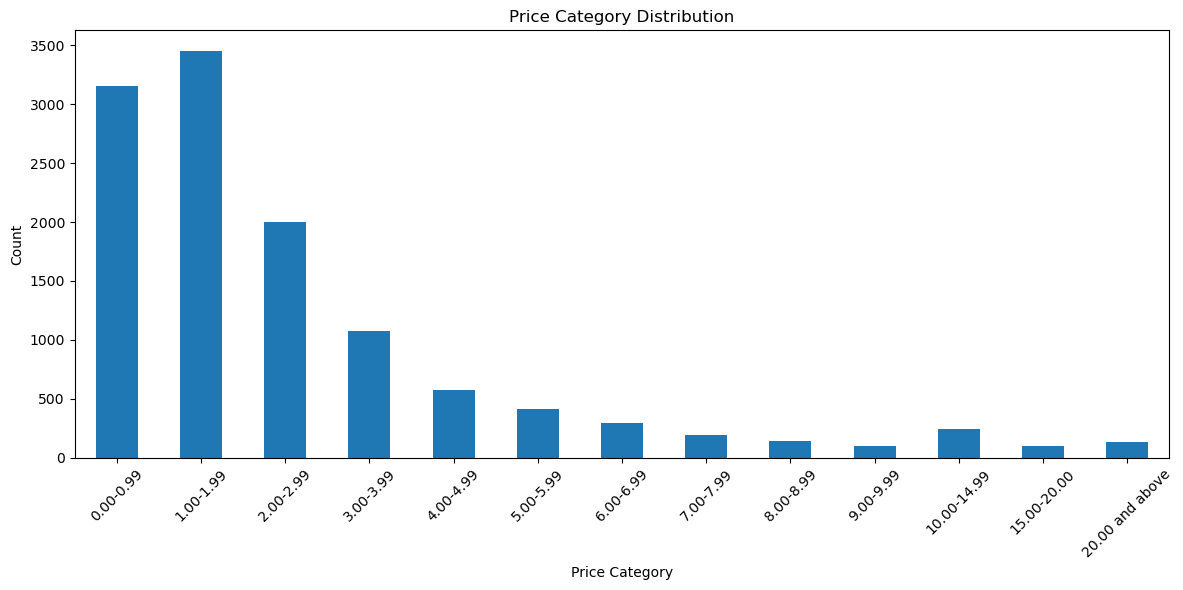

In [26]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, float('inf')]
labels = [
    '0.00-0.99', '1.00-1.99', '2.00-2.99', '3.00-3.99',
    '4.00-4.99', '5.00-5.99', '6.00-6.99', '7.00-7.99',
    '8.00-8.99', '9.00-9.99', '10.00-14.99',
    '15.00-20.00', '20.00 and above'
]

df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

counts = df['price_category'].value_counts().reindex(labels, fill_value=0)

counts.plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=45)
plt.title('Price Category Distribution')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


`observation`
- The majority of properties are priced in the "0-1","1-2","2-3" and "3-5" crores" ranges.
- There is a noticeable decrease in the number of properties priced above 5 crores.

In [27]:
# Check why extreme values in the 'price' column are coming up as outliers

target_25_per, target_75_per = np.percentile(df['price'], [25, 75])
iqr = target_75_per - target_25_per

upper_bound = target_75_per + (1.5 * iqr)

# Let’s check if the 'area' column values are causing these outlier values in the 'price' column
df.loc[(df['price'] > upper_bound), 'city'].value_counts()

city
mumbai         968
thane            6
navi mumbai      4
Name: count, dtype: int64

In [28]:
df['city'].value_counts()

city
mumbai         7543
thane          2162
navi mumbai    1597
palghar         555
Name: count, dtype: int64

`observation`
- From the city column, we can see that we get extreme values in the price column mainly from Mumbai. We have 7,544 properties in Mumbai, and out of that, 968 are price outliers (i.e., 12.8%).
- In comparison, Thane and Navi Mumbai have 2,162 and 1,598 properties, respectively, and the outlier properties in the price column for these are 6 (i.e., 0.27%) and 4 (i.e., 0.25%), respectively.
- Palghar does not have a single outlier point in the price column.

# Univariate analysis on Numerical columns

In [29]:
#find the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)
print("-"*100)
print(f'total numerical columns : {len(numerical_columns)}')

Index(['project_in_acres', 'lattitude', 'longitude', 'flat_on_floor',
       'total_floor', 'area', 'bed', 'bath', 'balcony', 'lift', 'parking',
       'costpersqft', 'emi', 'price', 'education_mean_km', 'education_min_km',
       'education_within_2km', 'transport_mean_km', 'transport_min_km',
       'transport_within_2km', 'shopping_centre_mean_km',
       'shopping_centre_min_km', 'shopping_centre_within_2km',
       'commercial_hub_mean_km', 'commercial_hub_min_km',
       'commercial_hub_within_2km', 'hospital_mean_km', 'hospital_min_km',
       'hospital_within_2km', 'tourist_mean_km', 'tourist_min_km',
       'tourist_within_2km', 'overall_min_mean_km', 'overall_avg_mean_km',
       'overall_min_min_km', 'overall_avg_min_km', 'total_within_2km'],
      dtype='object')
----------------------------------------------------------------------------------------------------
total numerical columns : 37


## project_in_acres

In [30]:
# no of unique categories and value_counts
analyze_column(df, 'project_in_acres', top_n=20, threshold=90)

--------------------------------------------------
Quick Glance of 'project_in_acres':


0     1.3006
1    17.0000
2     1.0000
3     1.0000
4     2.0000
Name: project_in_acres, dtype: float64

--------------------------------------------------
Meta-data for 'project_in_acres':
Data Type      : float64
Cardinality    : 205
Missing Data   : 5,730 rows (48.33 %)
Available Data : 6,127 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'project_in_acres':


count    6127.000000
mean       16.390482
std       115.073097
min         0.000000
25%         1.000000
50%         3.000000
75%         8.499900
max      4500.000000
Name: project_in_acres, dtype: float64

--------------------------------------------------
Top Frequent Values in 'project_in_acres':


count  percentage  cum_percent
project_in_acres                                
1.0                1285       20.97        20.97
2.0                 788       12.86        33.83
3.0                 516        8.42        42.25
4.0                 415        6.77        49.02
6.0                 284        4.64        53.66
5.0                 281        4.59        58.25
8.0                 212        3.46        61.71
7.0                 203        3.31        65.02
27.0                133        2.17        67.19
40.0                122        1.99        69.18
18.0                113        1.84        71.02
10.0                103        1.68        72.70
12.0                 92        1.50        74.20
32.0                 90        1.47        75.67
17.0                 86        1.40        77.07
14.0                 71        1.16        78.23
250.0                62        1.01        79.24
36.0                 60        0.98        80.22
9.0                  59        0.96        81.18
16.0                 48        0.78        81.96


36 Values in 'project_in_acres' with cumulative percentage ≤ 90%:
[1.0, 2.0, 3.0, 4.0, 6.0, 5.0, 8.0, 7.0, 27.0, 40.0, 18.0, 10.0, 12.0, 32.0, 17.0, 14.0, 250.0, 36.0, 9.0, 16.0, 22.0, 105.0, 15.0, 25.0, 0.2617, 30.0, 3.0493, 11.0, 20.0, 68.0, 0.0, 13.0, 1.1246, 23.0, 0.5807, 0.3049]


`observation` 
- project built on the land in acres
- 5750 missing values
- ranges from 0 to 55000
- mean is 27.41 acre and median is 3 acre
- 75% properties have built on land 8.49acre or less
- high std-dev indicates high variation
- data is right skewed with extreme high acres values 

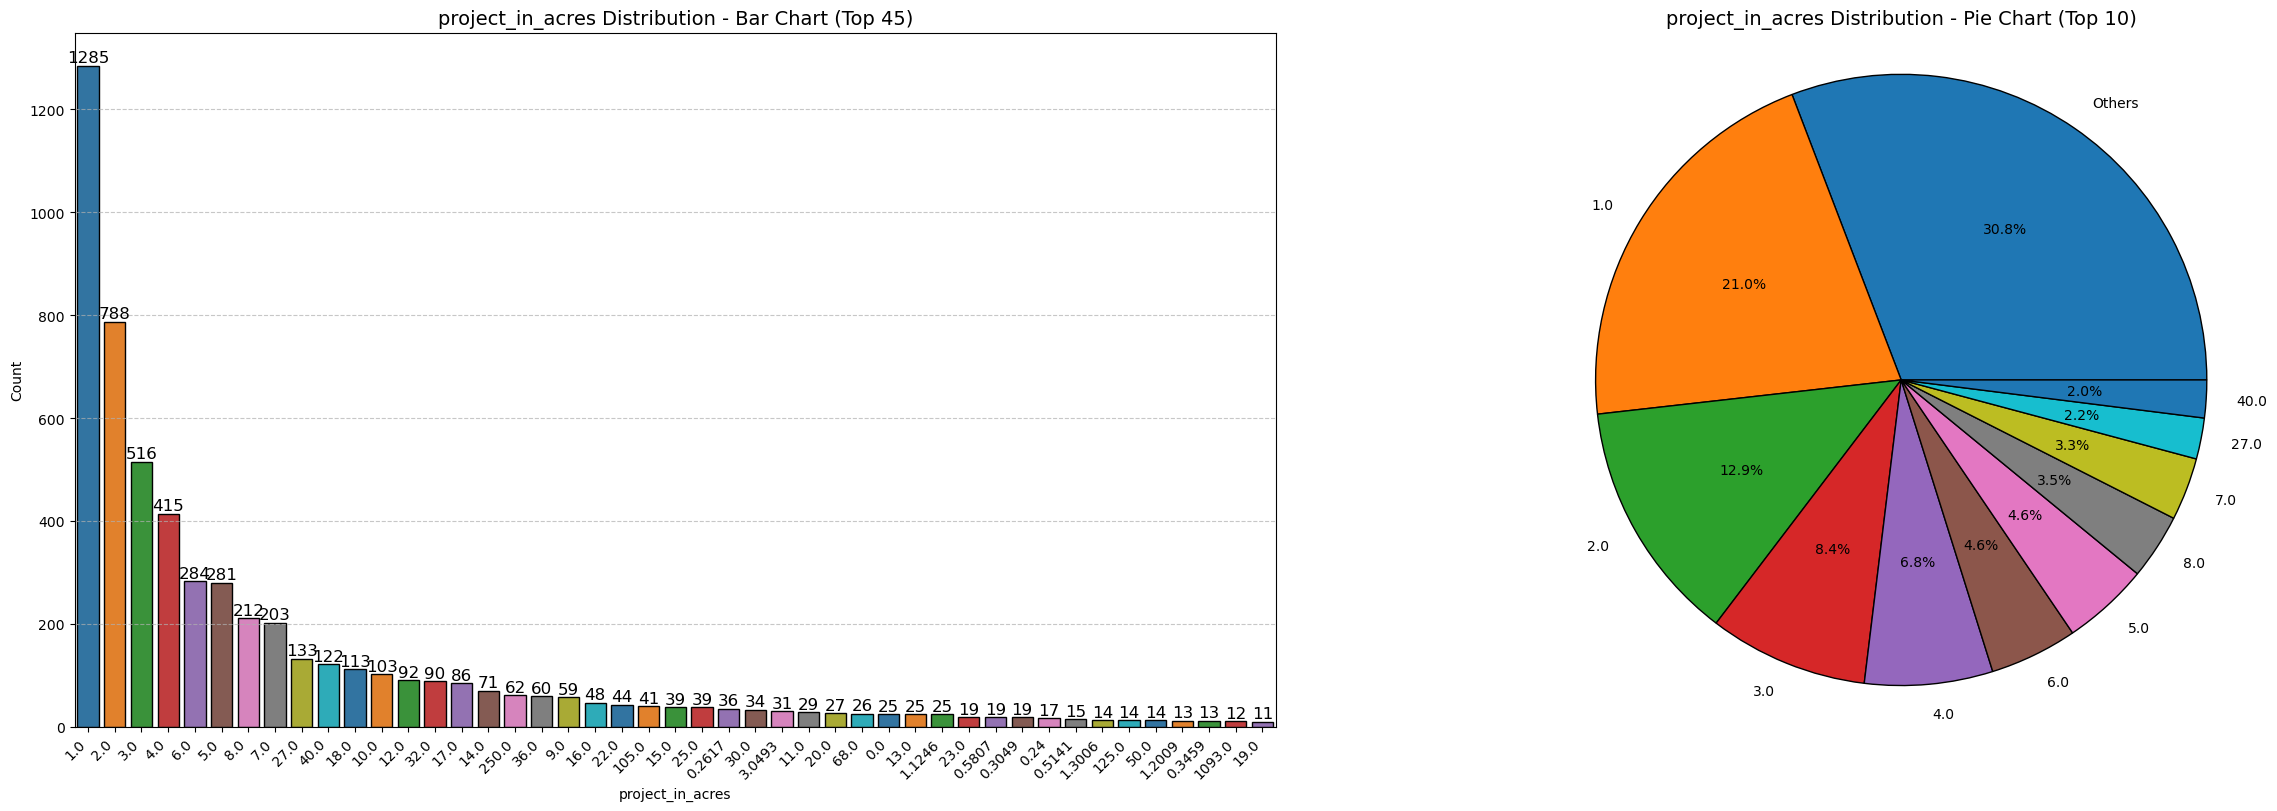

In [31]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'project_in_acres', bar_top_n=45, pie_top_n=10)

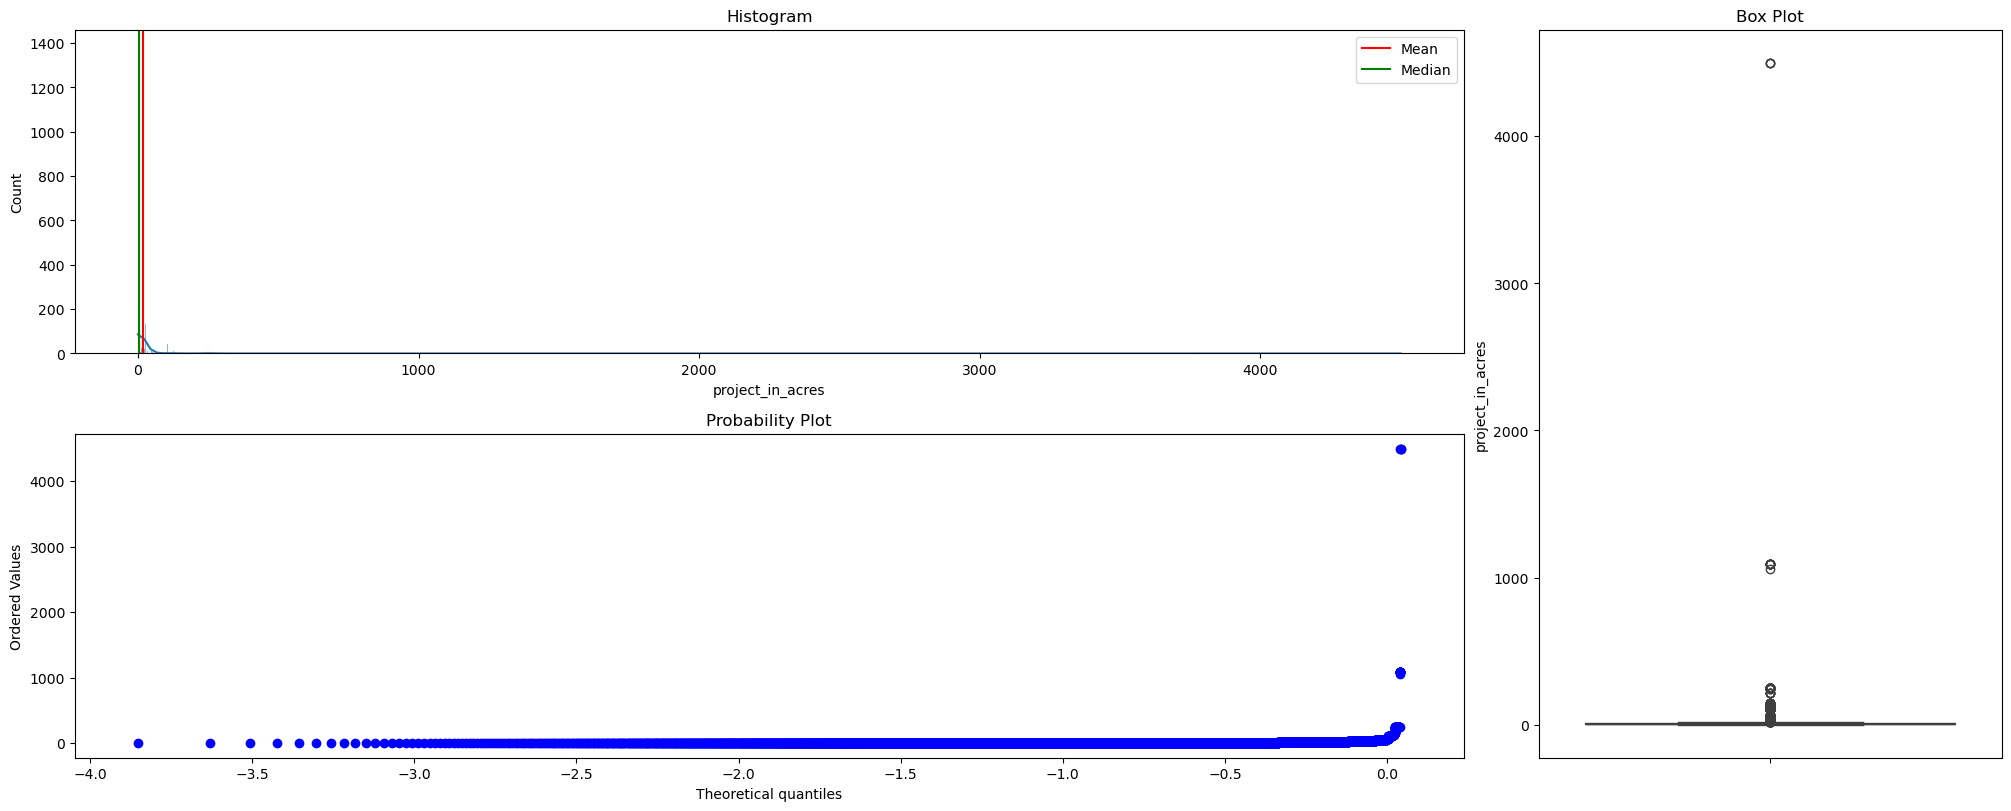

In [32]:
num_three_chart_plot(df, 'project_in_acres')

`observation` 
- Highly right-skewed.  
  Most projects have small acre land.  
- few projects with extremely high acre land (>10,000 acres).  
- Large variation in project sizes.
- Extreme values above 10,000 acres 
- most data concentrated near lower values.  
- High range with a few projects occupying vast land.

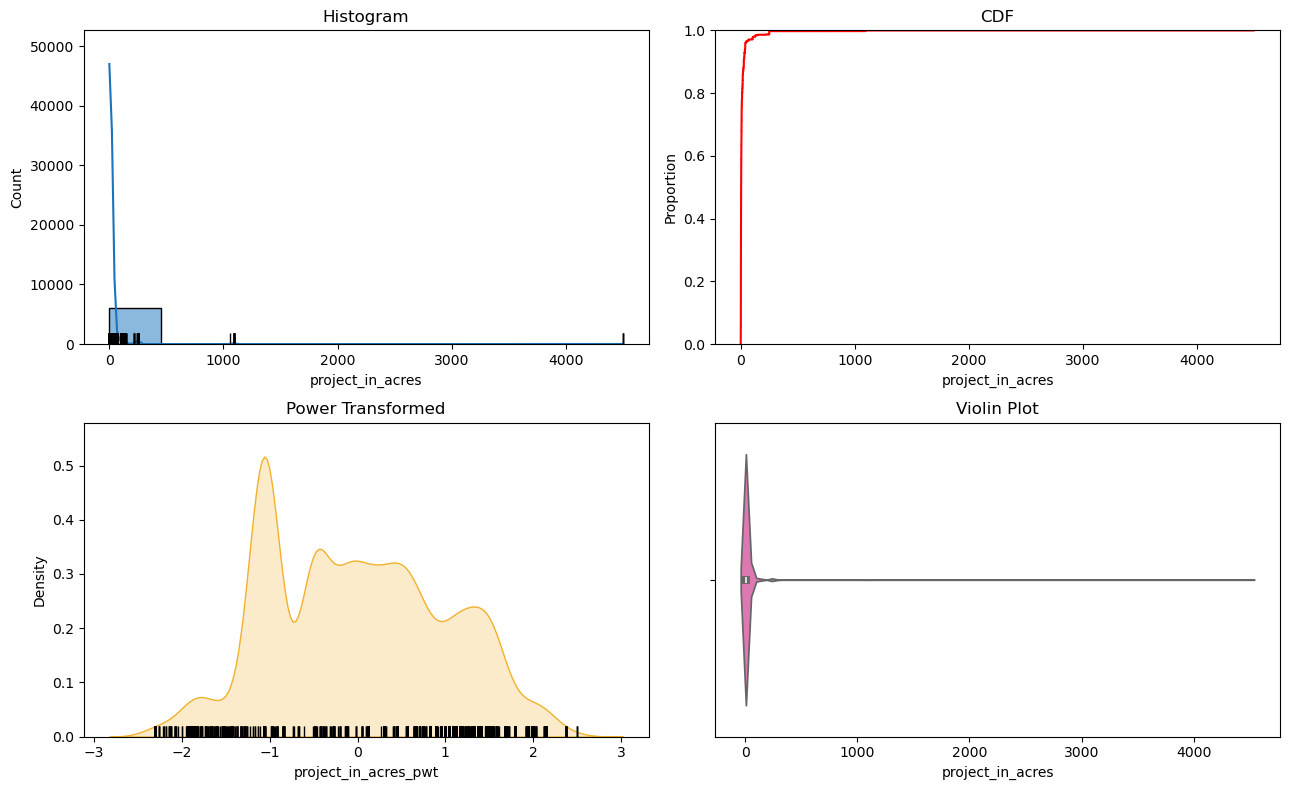

In [33]:
num_univar_plots(df, 'project_in_acres', bins=10)

In [34]:
num_summary(df,'project_in_acres')

--------------------------------------------------
Percentiles:


value
percentile           
0              0.0000
5              0.5807
10             1.0000
25             1.0000
50             3.0000
75             8.4999
90            27.0000
95            40.0000
99           250.0000
100         4500.0000

--------------------------------------------------
Central Tendancy:


value
mean                16.390482
trimmed mean (5%)    6.955971
trimmed mean (10%)   5.665744
median               3.000000

--------------------------------------------------
Measure of Spread:


value
var            13241.817563
std              115.073097
IQR                7.499900
lower_bound      -10.249850
upper_bound       19.749750
mad                2.000000
coef_variance      7.020727

--------------------------------------------------
Skewness and Kurtosis:


value
skewness    30.804245
kurtosis  1143.061587

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 333985360.7981105
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.786
Test Statistic       : 1835.486466712072
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`observation` 
- Skewness: 70.76, highly right-skewed distribution.  
- Kurtosis: 5274.44, sharp peaks and heavy tails due to outliers.  
- Data has extreme outliers, requiring transformation or outlier handling.
- High CV (>0.5) → Data is highly spread out relative to the mean.

## lattitude

In [35]:
# no of unique categories and value_counts
analyze_column(df, 'lattitude', top_n=5,threshold=20)

--------------------------------------------------
Quick Glance of 'lattitude':


0    19.207777
1    19.080605
2    19.248778
3    19.138704
4    19.055308
Name: lattitude, dtype: float64

--------------------------------------------------
Meta-data for 'lattitude':
Data Type      : float64
Cardinality    : 2908
Missing Data   : 464 rows (3.91 %)
Available Data : 11,393 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'lattitude':


count    11393.000000
mean        19.146894
std          0.119007
min         18.795002
25%         19.062055
50%         19.143923
75%         19.210299
max         19.832738
Name: lattitude, dtype: float64

--------------------------------------------------
Top Frequent Values in 'lattitude':


count  percentage  cum_percent
lattitude                                
19.205002    233        2.05         2.05
19.119677    229        2.01         4.06
19.174954    205        1.80         5.86
19.227262    186        1.63         7.49
18.989401    176        1.54         9.03


13 Values in 'lattitude' with cumulative percentage ≤ 20%:
[19.2050017, 19.1196773, 19.1749536837097, 19.2272619069866, 18.9894007, 19.282975, 19.1154908, 19.1940346300819, 19.1630920855215, 19.2101312179652, 19.0459181155422, 19.1373697481266, 19.0036486667054]


`observation` 
- 459 missing values
- 19.14, close to the median, indicating data is symmetrically distributed.
- std-dev 0.189, showing low variability within most of the data.
- 9.209, indicating a small subset of data significantly lower than the mean.
- 19.06, tightly packed with the 75th Percentile (Q3): 19.21, confirming low IQR.
- The data is heavily skewed due to extreme low outliers.

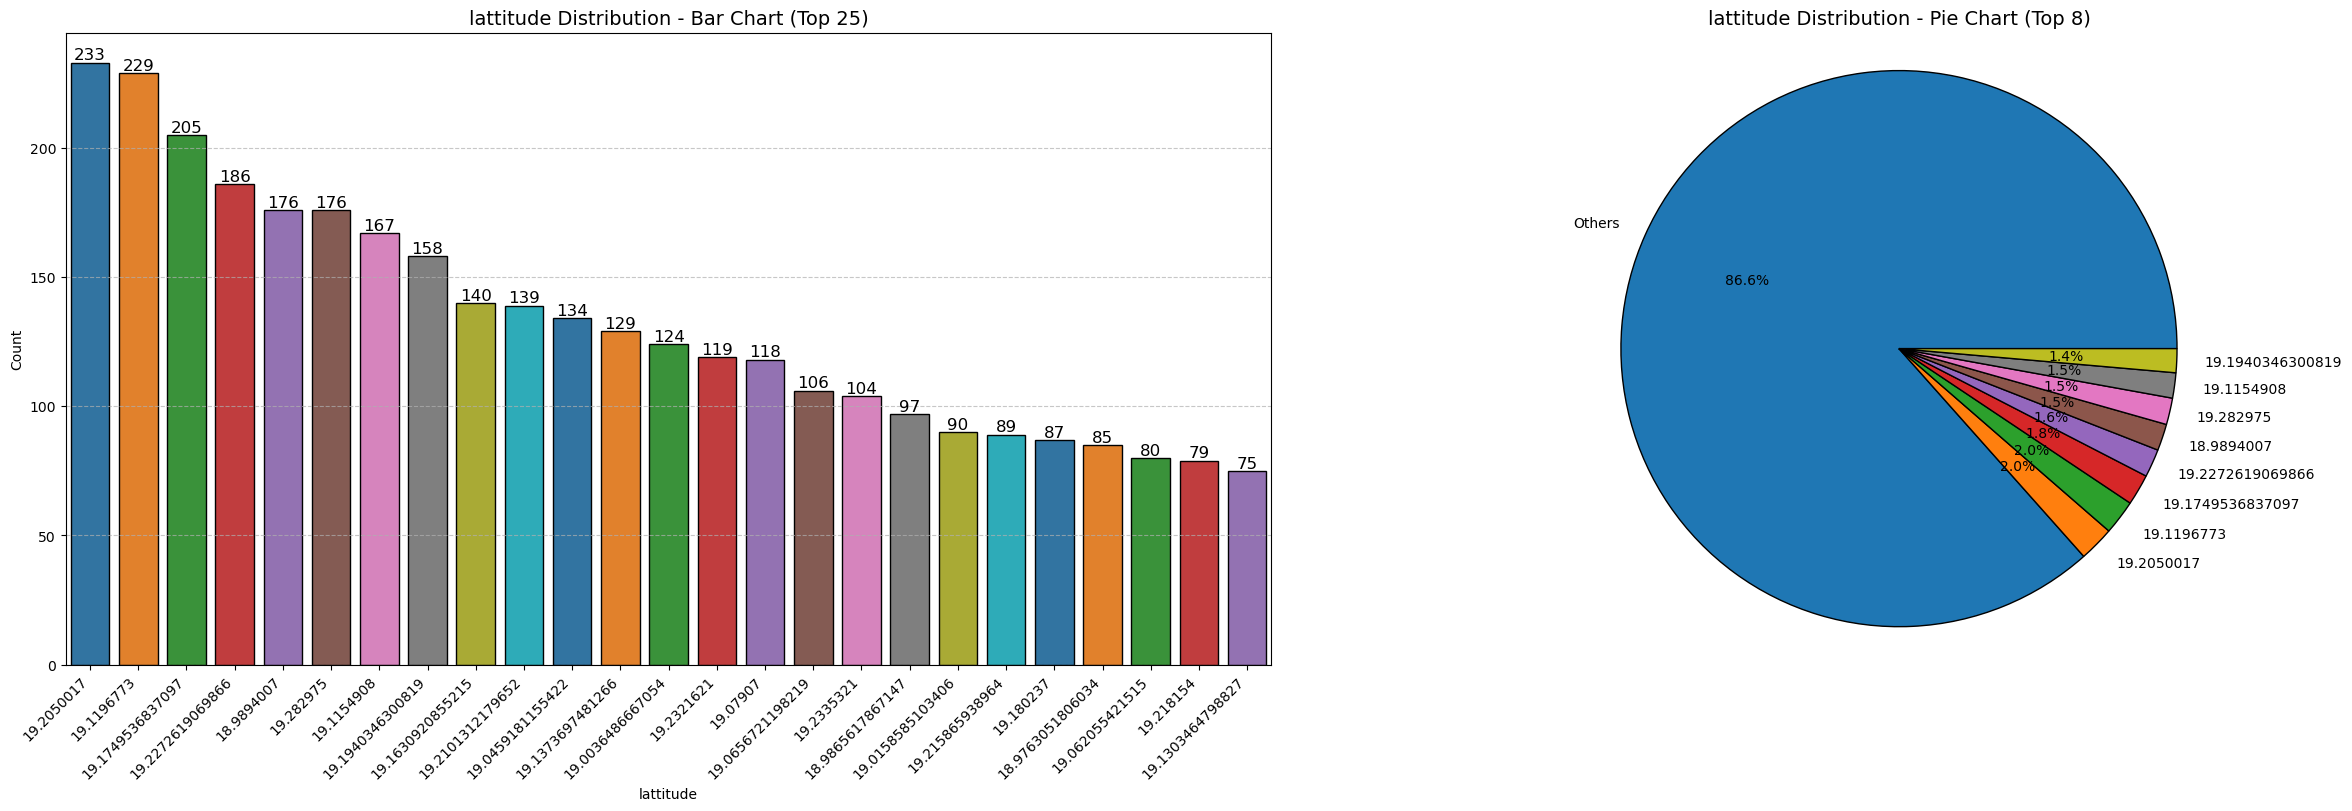

In [36]:
bar_pie_chart_plot(df, 'lattitude', bar_top_n=25, pie_top_n=8)

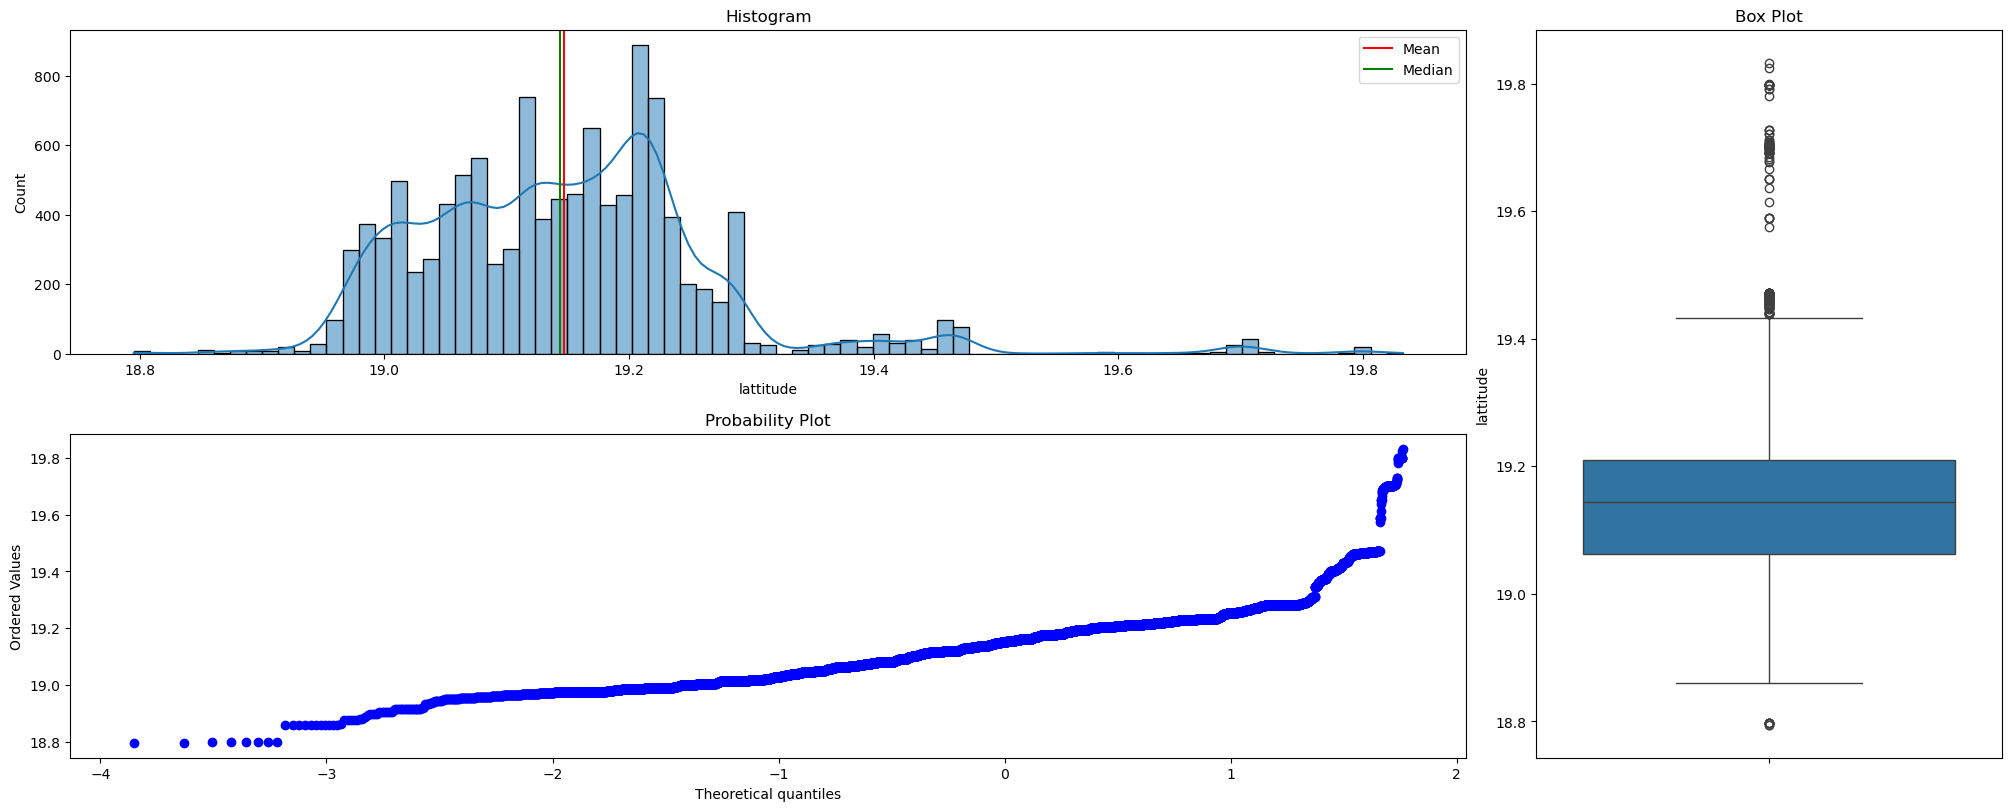

In [37]:
num_three_chart_plot(df, 'lattitude')

`observation`
- The latitude distribution is highly concentrated between 19 and 20.   
- Indicates the dataset is focused on a specific geographical region.
- Values outside the whiskers are considered outliers.
- The latitude data is concentrated within a narrow interquartile range (IQR) between 19–20.
- The median latitude lies close to 19.14

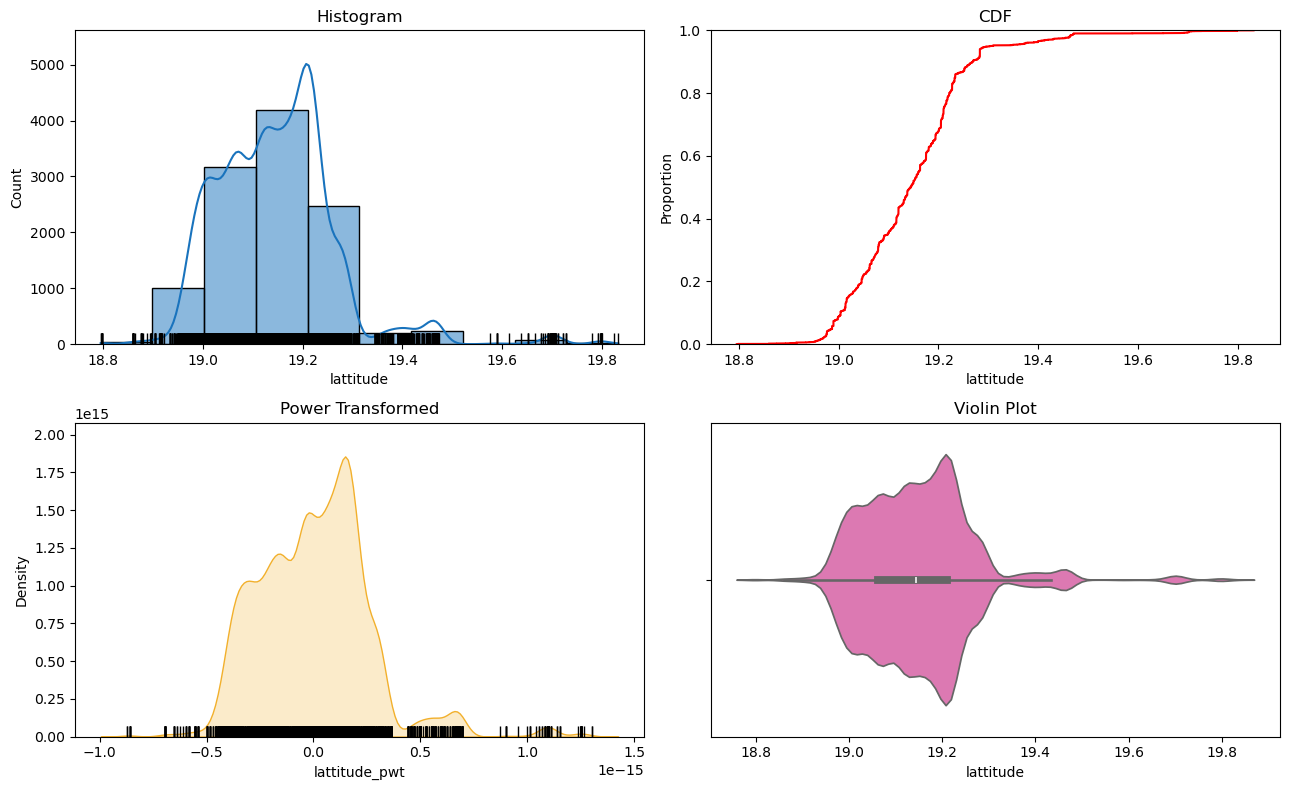

In [38]:
num_univar_plots(df, 'lattitude', bins=10)

In [39]:
num_summary(df,'lattitude')

--------------------------------------------------
Percentiles:


value
percentile           
0           18.795002
5           18.986562
10          19.003649
25          19.062055
50          19.143923
75          19.210299
90          19.269201
95          19.303522
99          19.471987
100         19.832738

--------------------------------------------------
Central Tendancy:


value
mean                19.146894
trimmed mean (5%)   19.138961
trimmed mean (10%)  19.139040
median              19.143923

--------------------------------------------------
Measure of Spread:


value
var             0.014163
std             0.119007
IQR             0.148243
lower_bound    18.839691
upper_bound    19.432664
mad             0.072943
coef_variance   0.006215

--------------------------------------------------
Skewness and Kurtosis:


value
skewness  1.271940
kurtosis  4.393048

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 12222.281997436758
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 112.59277068051597
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`observation` 

- Skewness (-28.51): Extremely negatively skewed, long left tail.
- Kurtosis (1438.94): Highly leptokurtic, sharp peak with heavy tails.
- Most values between 19–20, with few extreme low outliers near 9–10.
- Shows need for outlier treatment or transformation.
- Low CV (0–0.2) → Data is tightly clustered → low spread.  

## longitude

In [40]:
# no of unique categories and value_counts
analyze_column(df, 'longitude', top_n=5,threshold=20)

--------------------------------------------------
Quick Glance of 'longitude':


0    72.967479
1    73.073939
2    72.863793
3    72.859964
4    72.922850
Name: longitude, dtype: float64

--------------------------------------------------
Meta-data for 'longitude':
Data Type      : float64
Cardinality    : 2844
Missing Data   : 464 rows (3.91 %)
Available Data : 11,393 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'longitude':


count    11393.000000
mean        72.905679
std          0.086504
min         72.704548
25%         72.839809
50%         72.872695
75%         72.963466
max         73.337269
Name: longitude, dtype: float64

--------------------------------------------------
Top Frequent Values in 'longitude':


count  percentage  cum_percent
longitude                                
72.869271    285        2.50         2.50
72.905081    229        2.01         4.51
72.943104    205        1.80         6.31
72.863440    186        1.63         7.94
72.873618    176        1.54         9.48


13 Values in 'longitude' with cumulative percentage ≤ 20%:
[72.8692711, 72.9050809, 72.943103519999, 72.8634397272398, 72.873618, 73.1175162, 72.8726952, 72.8257561606587, 72.8398088005091, 72.8305011930765, 72.8975231581492, 72.8257229439874, 72.8175254882335]


`observation` 
- mean close to median indicating data is symmetrically distributed
- std-dev 0.08, showing low variability within the dataset.
- 74.02, close to the mean, suggesting no extreme positive outliers.
- 25th Percentile (Q1): 72.83 and 75th Percentile (Q3): 72.96, with a narrow IQR of approximately 0.13, indicating tightly packed data.
- The outlier at the higher bound (74.02) significantly skews the distribution.

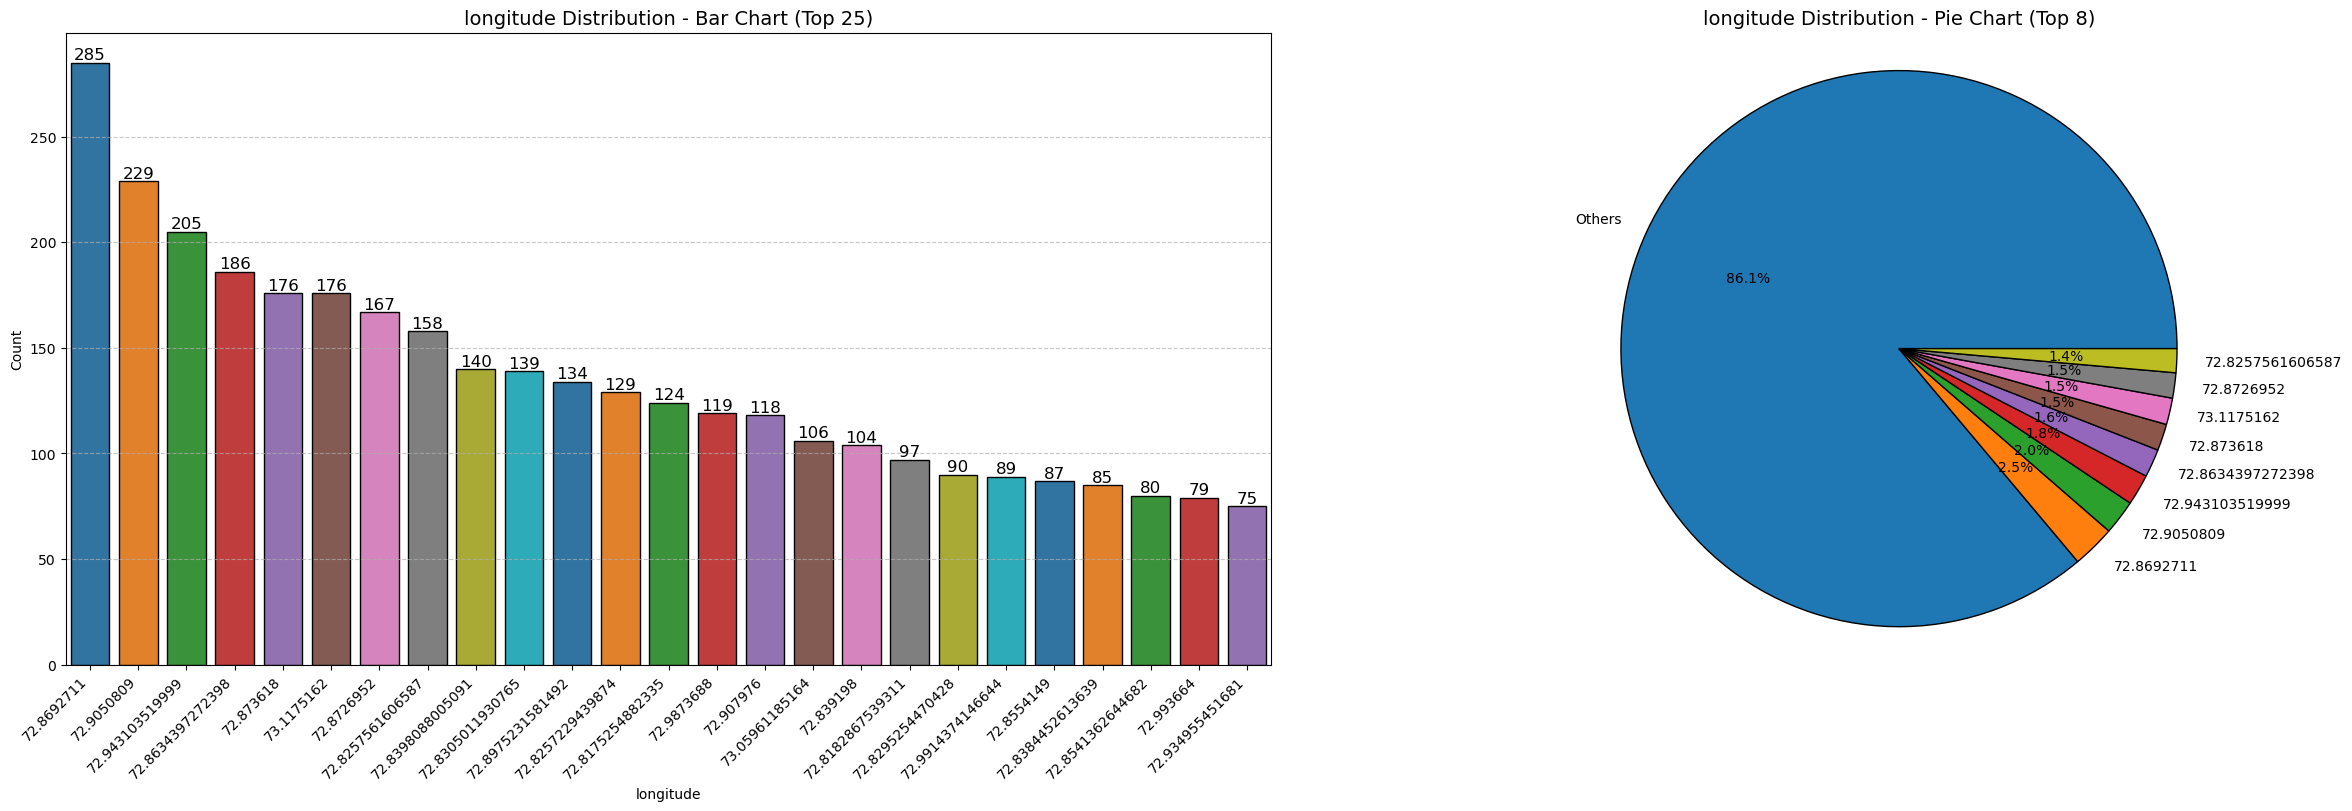

In [41]:
bar_pie_chart_plot(df, 'longitude', bar_top_n=25, pie_top_n=8)

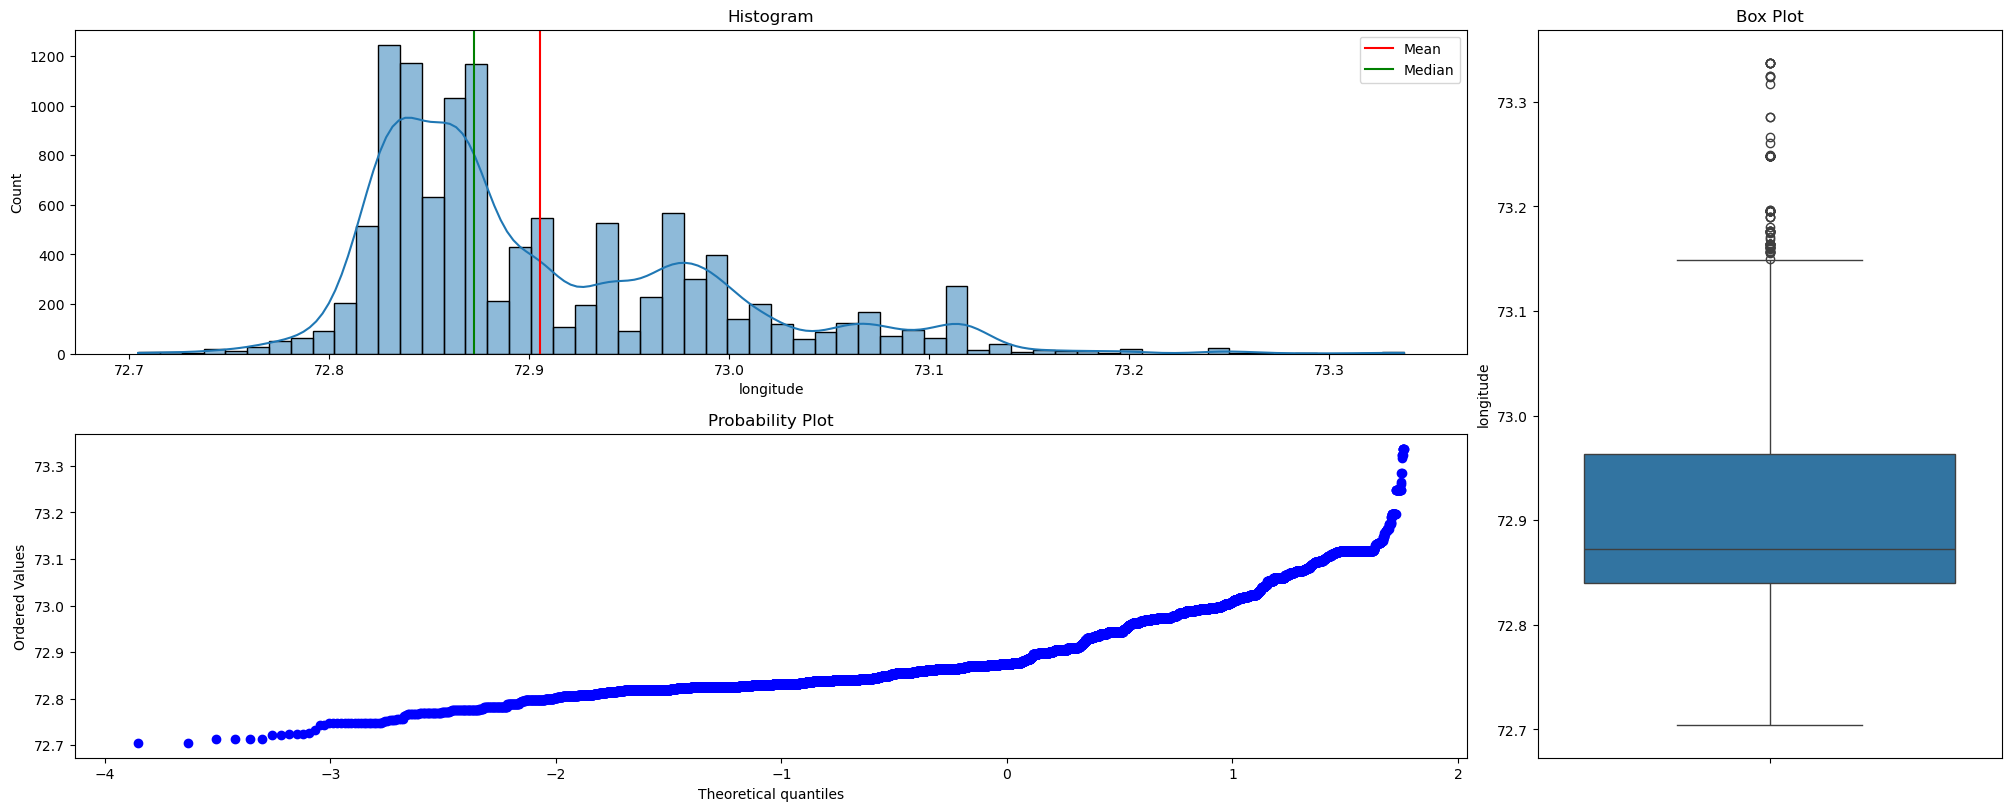

In [42]:
num_three_chart_plot(df, 'longitude')

`observation` 
- Majority of longitude values are concentrated between 72.8 and 73.0.
- Very few outliers exist above 73.2, extending up to ~74.
- Data shows a slight right skew due to high-end outliers.
- Overall distribution is tightly packed with a few mild extreme points.

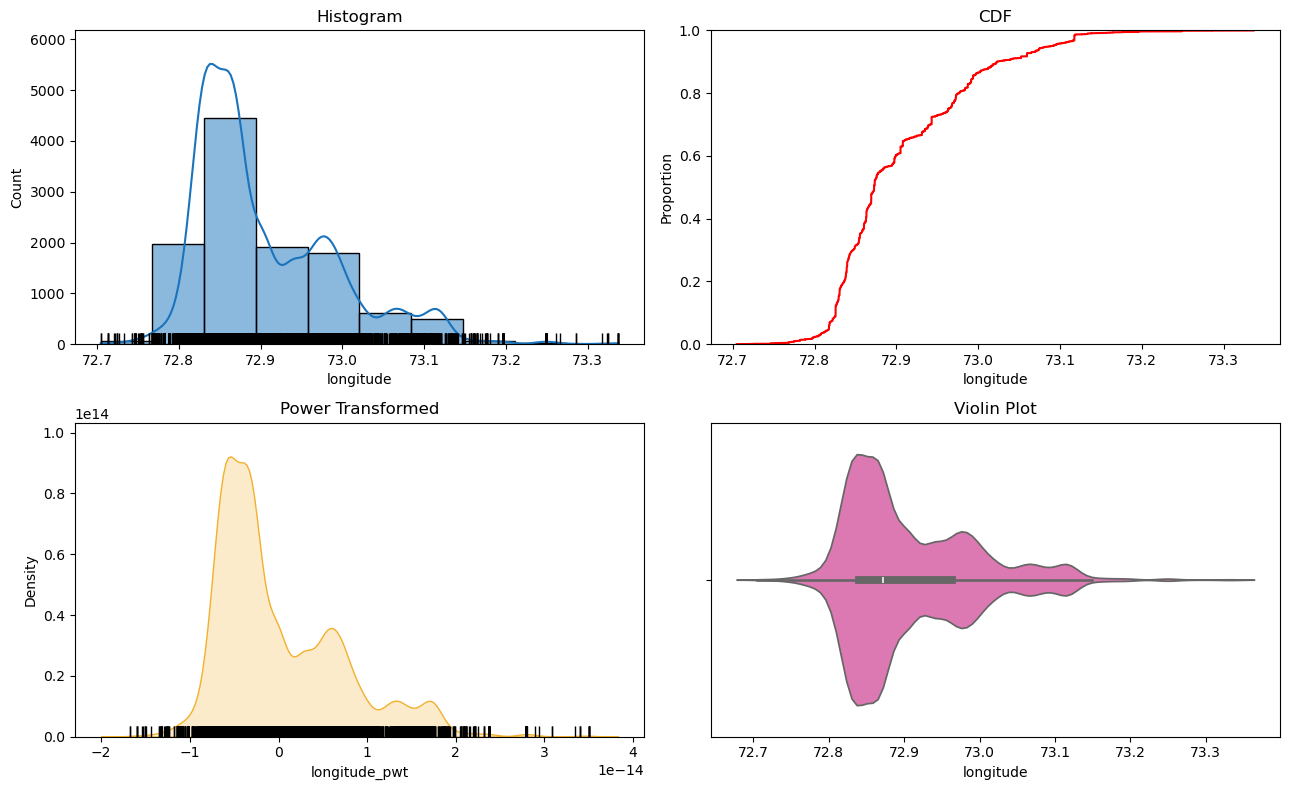

In [43]:
num_univar_plots(df, 'longitude', bins=10)

In [44]:
num_summary(df,'longitude')

--------------------------------------------------
Percentiles:


value
percentile           
0           72.704548
5           72.817525
10          72.825723
25          72.839809
50          72.872695
75          72.963466
90          73.023001
95          73.089570
99          73.136187
100         73.337269

--------------------------------------------------
Central Tendancy:


value
mean                72.905679
trimmed mean (5%)   72.899332
trimmed mean (10%)  72.894167
median              72.872695

--------------------------------------------------
Measure of Spread:


value
var             0.007483
std             0.086504
IQR             0.123657
lower_bound    72.654323
upper_bound    73.148952
mad             0.042860
coef_variance   0.001187

--------------------------------------------------
Skewness and Kurtosis:


value
skewness  1.145459
kurtosis  1.088393

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 3052.0578615614027
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 408.30981506044736
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`Observation`
- Skewness (1.45): Positive, right-skewed.
- Outliers on higher longitude range.
- Kurtosis (5.43): Heavy tails, sharp peak.
- Most data between 72.8–73.0.
- Need for outlier treatment or transform.
- Low CV (0–0.2) → Data is tightly clustered → low spread.  

## flat_on_floor

In [45]:
# no of unique categories and value_counts
analyze_column(df, 'flat_on_floor', top_n=5,threshold=20)

--------------------------------------------------
Quick Glance of 'flat_on_floor':


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: flat_on_floor, dtype: float64

--------------------------------------------------
Meta-data for 'flat_on_floor':
Data Type      : float64
Cardinality    : 71
Missing Data   : 2,287 rows (19.29 %)
Available Data : 9,570 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'flat_on_floor':


count    9570.000000
mean       10.872623
std        10.129539
min        -2.000000
25%         4.000000
50%         8.000000
75%        15.000000
max        75.000000
Name: flat_on_floor, dtype: float64

--------------------------------------------------
Top Frequent Values in 'flat_on_floor':


count  percentage  cum_percent
flat_on_floor                                
3.0              672        7.02         7.02
2.0              669        6.99        14.01


2 Values in 'flat_on_floor' with cumulative percentage ≤ 20%:
[3.0, 2.0]


`observation`
- column for on which floor flats are on 
- 2288 missing values
- min is -2 and max is 75(below ground there is -1 and -2 and ground floor is 0 and so on till 75th floor we have properties)
- mean is 10.87 and median is 8
- 75% properties are on below 15th floor and max is 75
- std dev is 10.12; high variability
- IQR is approx. 4–15.

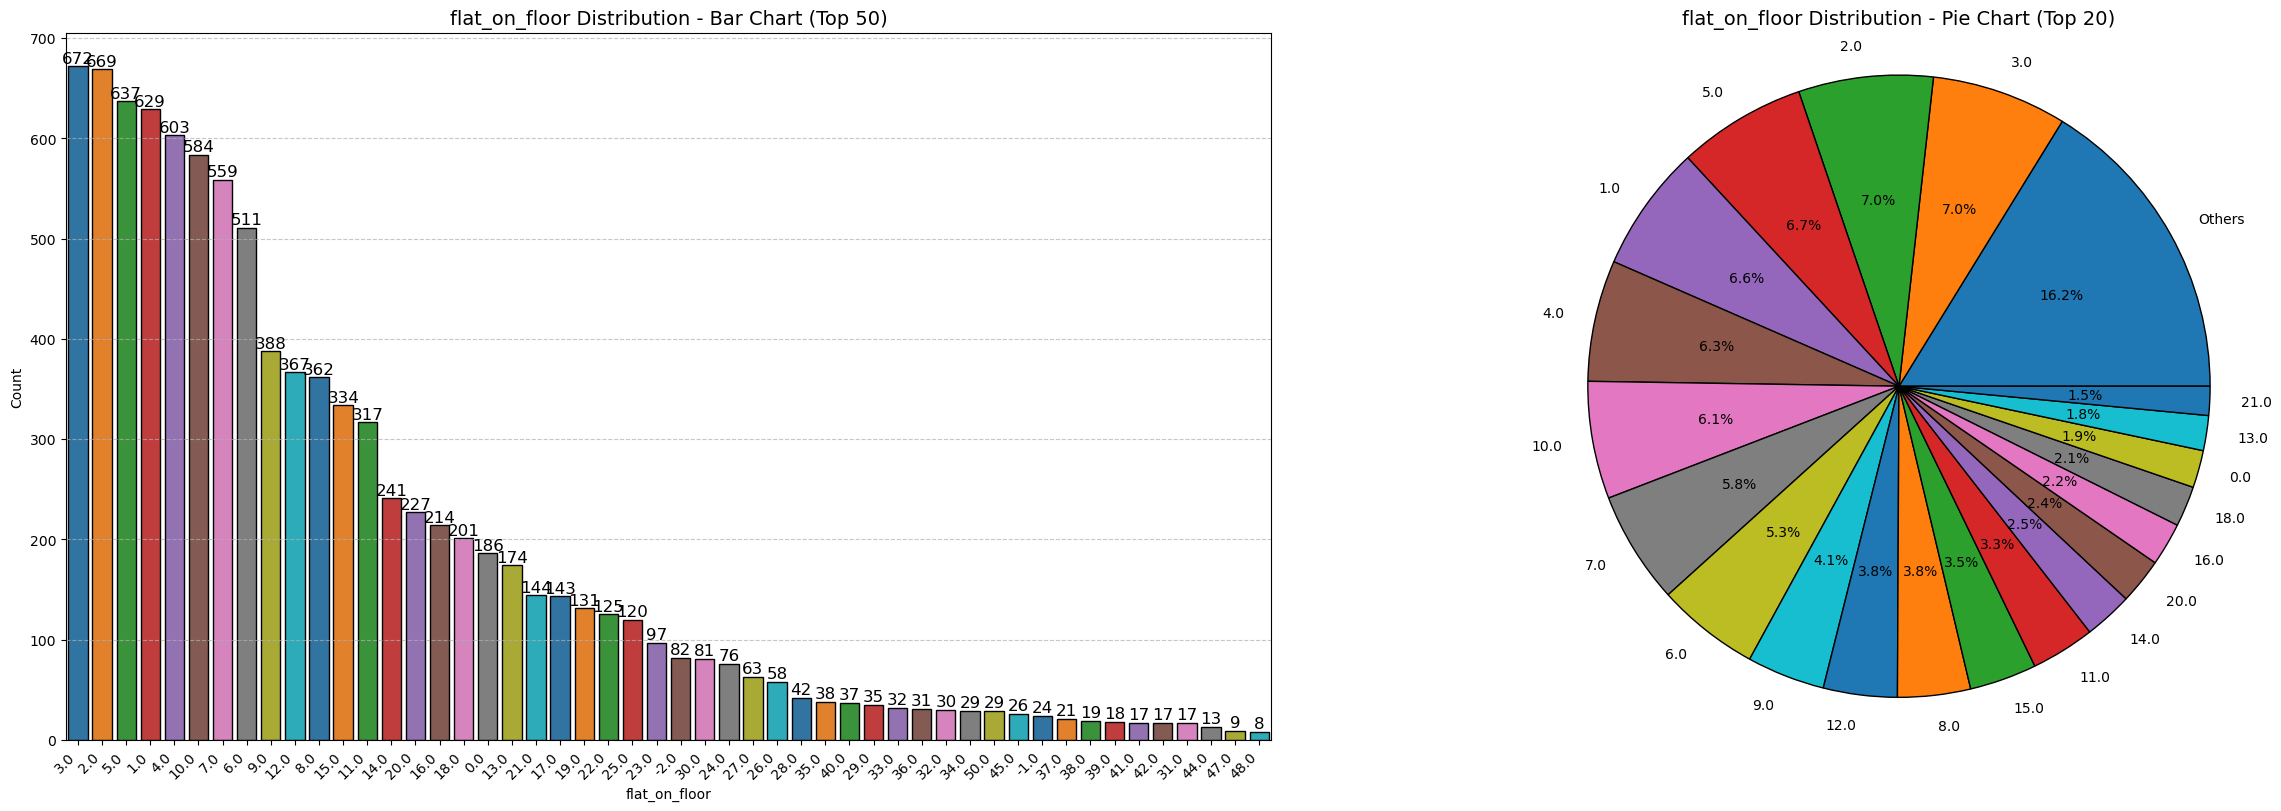

In [46]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'flat_on_floor', bar_top_n=50, pie_top_n=20)

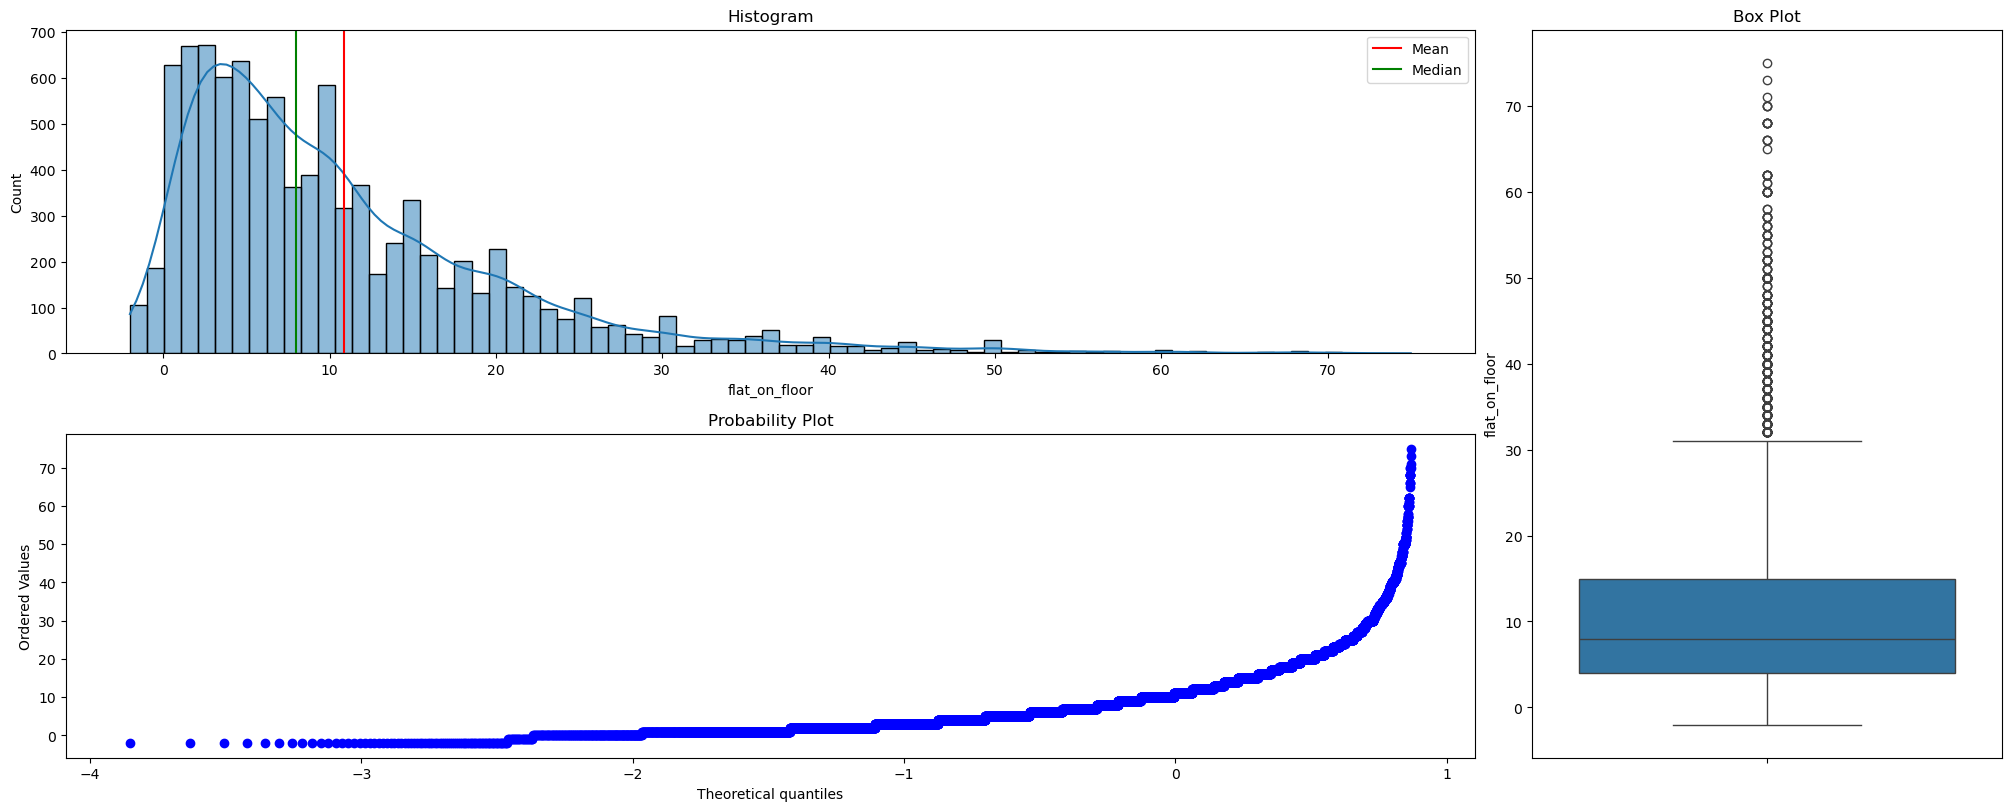

In [47]:
num_three_chart_plot(df, 'flat_on_floor')

`observation`
- Most flats are on lower floors (0–10).
- Distribution is right-skewed; fewer flats on higher floors.
- Sharp peak around floors 2–4.
- Outliers on higher floors (above \~30).
- Most flats within floor range 0–20.

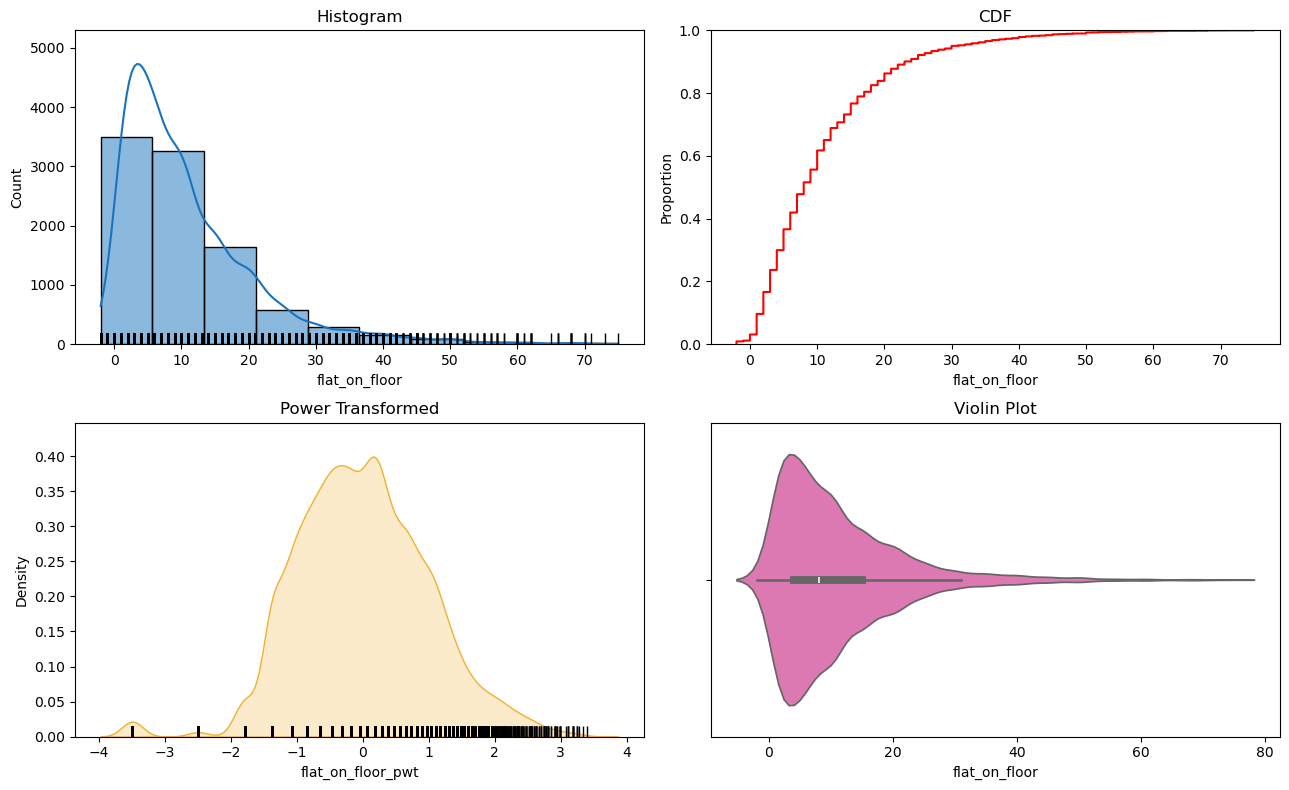

In [48]:
num_univar_plots(df, 'flat_on_floor', bins=10)

In [49]:
 num_summary(df,'flat_on_floor')

--------------------------------------------------
Percentiles:


value
percentile       
0            -2.0
5             1.0
10            2.0
25            4.0
50            8.0
75           15.0
90           23.0
95           30.0
99           49.0
100          75.0

--------------------------------------------------
Central Tendancy:


value
mean                10.872623
trimmed mean (5%)    9.772347
trimmed mean (10%)   9.266719
median               8.000000

--------------------------------------------------
Measure of Spread:


value
var            102.607558
std             10.129539
IQR             11.000000
lower_bound    -12.500000
upper_bound     31.500000
mad              5.000000
coef_variance    0.931656

--------------------------------------------------
Skewness and Kurtosis:


value
skewness  1.858369
kurtosis  4.722802

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 14389.076357535714
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 385.08425526143037
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`observations` 
- Skewness (1.86): The data is moderately right-skewed, indicating a longer tail towards higher floor levels.  
- Kurtosis (4.72): The data has higher peakedness compared to a normal distribution, with significant outliers on higher floors.
- High CV (>0.5) → Data is highly spread out relative to the mean.  

## total_floor

In [50]:
# no of unique categories and value_counts
analyze_column(df, 'total_floor', top_n=5,threshold=20)

--------------------------------------------------
Quick Glance of 'total_floor':


0     NaN
1     NaN
2     NaN
3    23.0
4     NaN
Name: total_floor, dtype: float64

--------------------------------------------------
Meta-data for 'total_floor':
Data Type      : float64
Cardinality    : 85
Missing Data   : 2,054 rows (17.32 %)
Available Data : 9,803 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'total_floor':


count    9803.000000
mean       22.197389
std        16.215548
min         1.000000
25%         8.000000
50%        19.000000
75%        30.000000
max        92.000000
Name: total_floor, dtype: float64

--------------------------------------------------
Top Frequent Values in 'total_floor':


count  percentage  cum_percent
total_floor                                
7.0           1016       10.36        10.36
4.0            550        5.61        15.97


2 Values in 'total_floor' with cumulative percentage ≤ 20%:
[7.0, 4.0]


`observation`
- column for how many floor building has 
- 2055 missing values
- min is 1 and max is 92
- mean is 22.19 and median is 19
- 75% properties are on below 30th floor and max is 92
- std dev is 16.21 - high variability

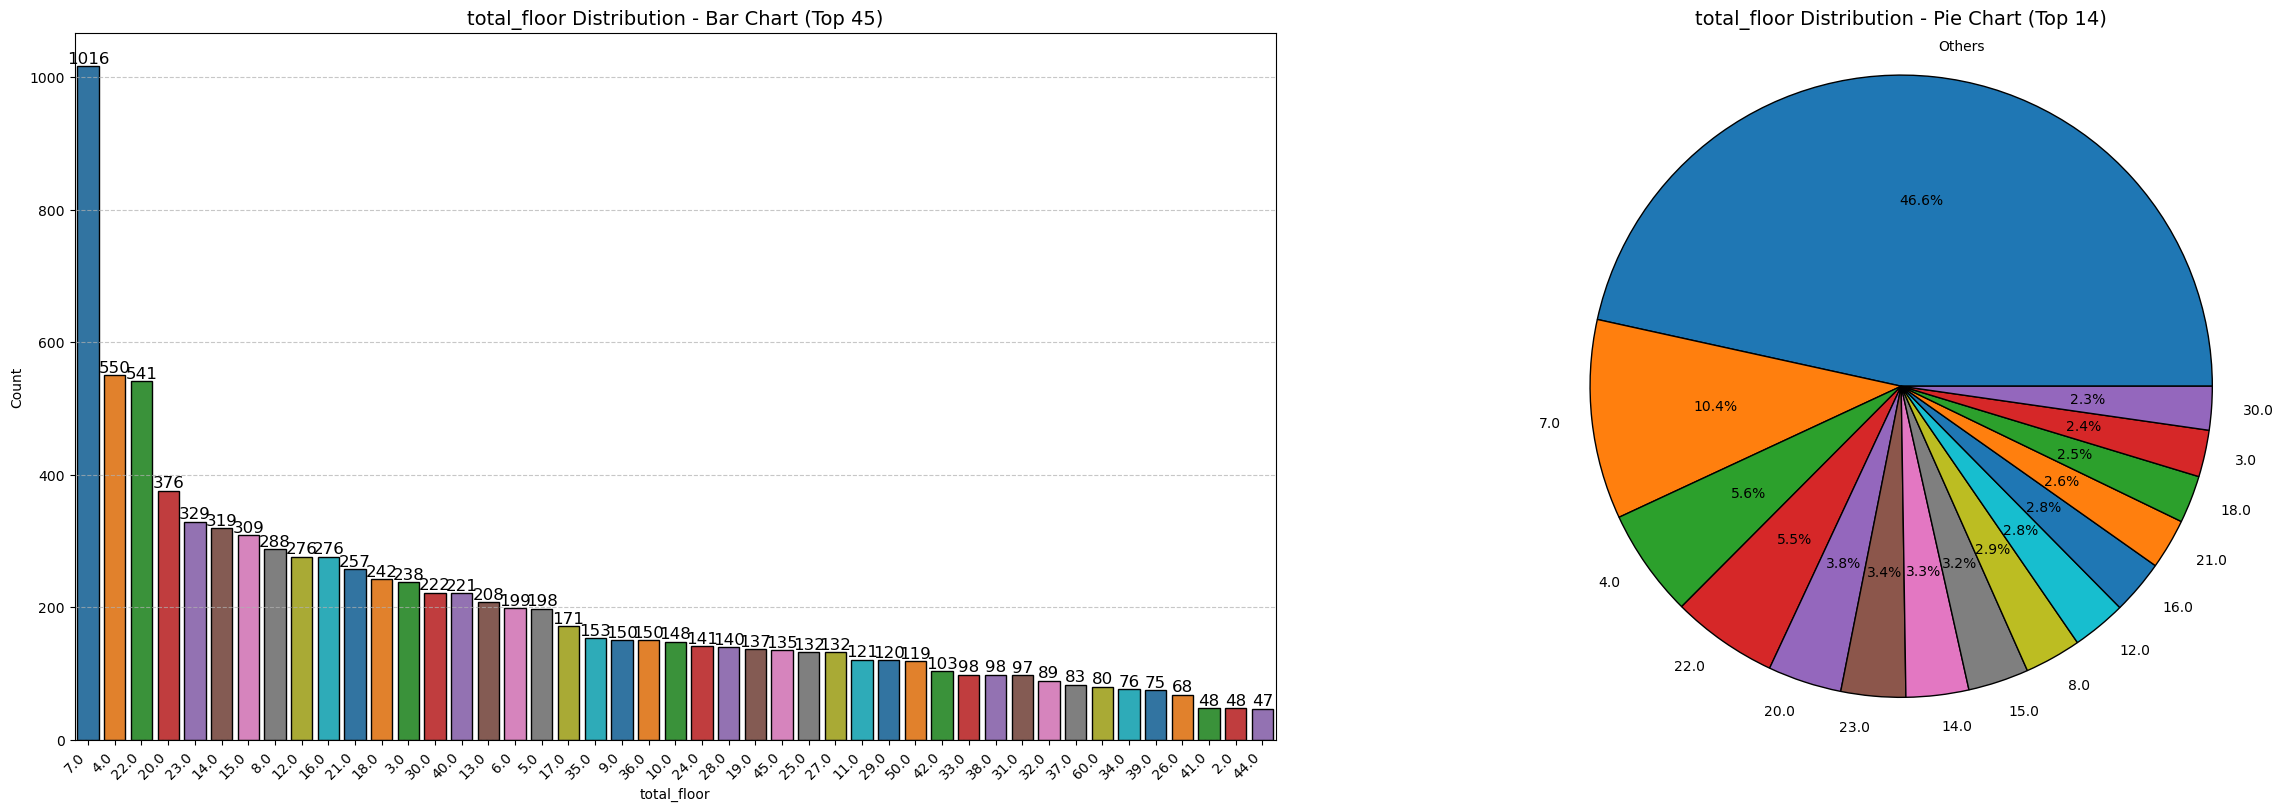

In [51]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'total_floor', bar_top_n=45, pie_top_n=14)

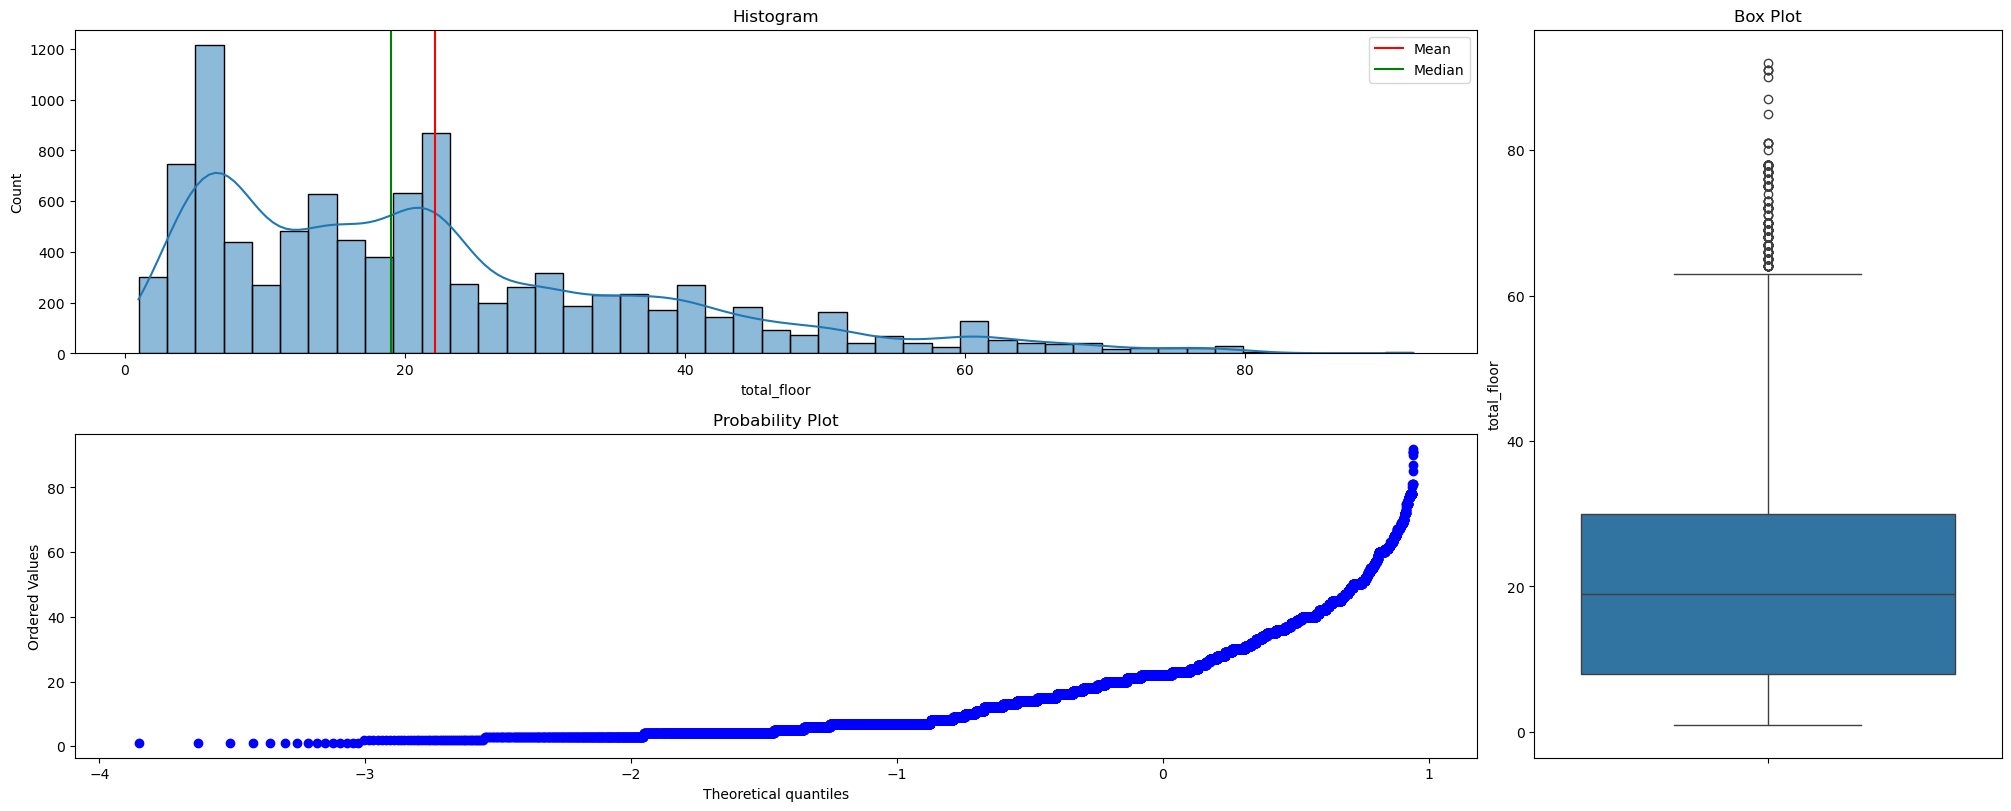

In [52]:
num_three_chart_plot(df, 'total_floor')

`observation` 
- Most projects are concentrated on lower floors (near 1–25).
- The distribution is right-skewed, with fewer projects are of higher floors.
- There is a sharp peak around 7 floor building, indicating most of the buildings are of 7 floor
- The data has outliers for higher floors.
- There are significant outliers above the upper whisker, indicating some flats are of many floors.
- The interquartile range (IQR) is between floor 8 and floor 30.

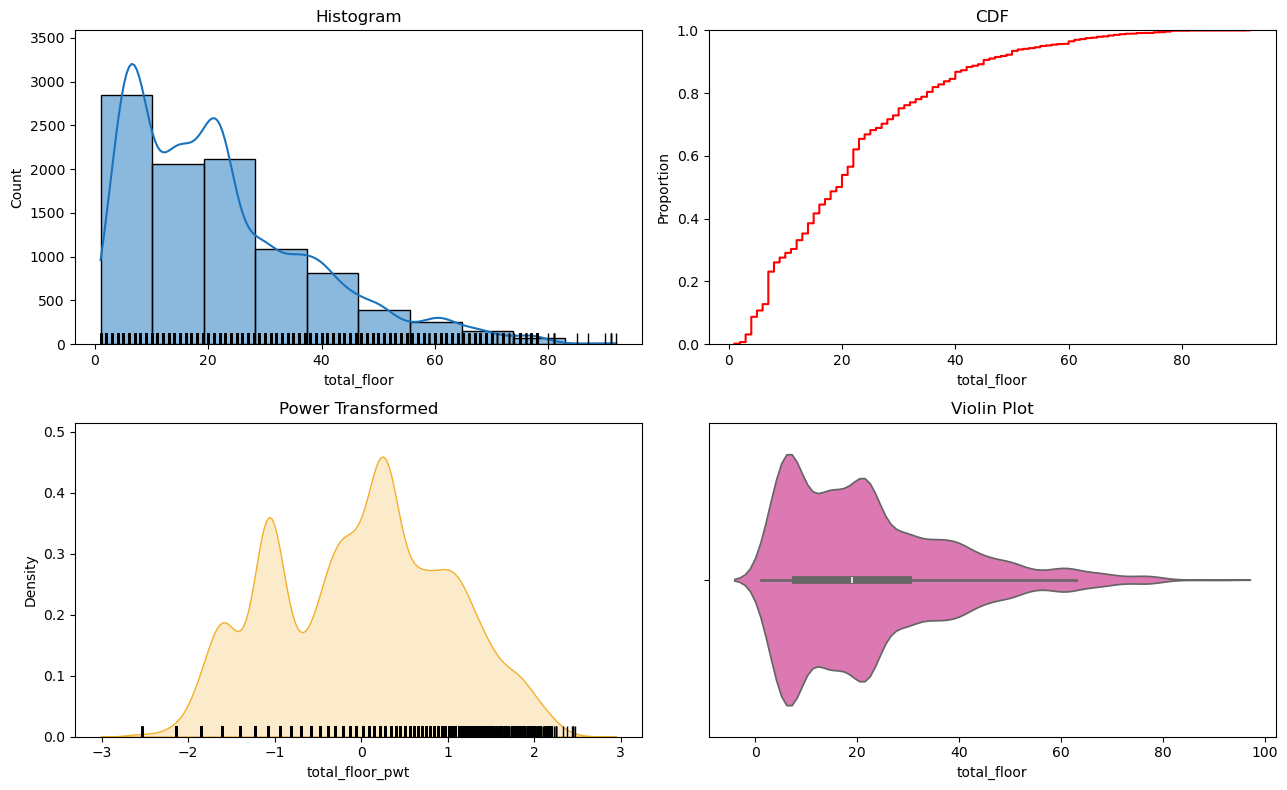

In [53]:
num_univar_plots(df, 'total_floor', bins=10)

In [54]:
num_summary(df,'total_floor')

--------------------------------------------------
Percentiles:


value
percentile       
0             1.0
5             4.0
10            5.0
25            8.0
50           19.0
75           30.0
90           45.0
95           55.0
99           72.0
100          92.0

--------------------------------------------------
Central Tendancy:


value
mean                22.197389
trimmed mean (5%)   20.843817
trimmed mean (10%)  20.089124
median              19.000000

--------------------------------------------------
Measure of Spread:


value
var            262.943996
std             16.215548
IQR             22.000000
lower_bound    -25.000000
upper_bound     63.000000
mad             11.000000
coef_variance    0.730516

--------------------------------------------------
Skewness and Kurtosis:


value
skewness  1.115976
kurtosis  0.932826

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 2388.7557750754154
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 259.40600844648
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`observations`
- Skewness: 1.11:  
  - The data is moderately positively skewed, indicating that more projects are concentrated at lower floor levels, with a few extreme values on higher floors causing a longer right tail.  
- Kurtosis: 0.93  
  - The data is platykurtic (kurtosis < 3), with lighter tails and fewer extreme outliers.
- High CV (>0.5) → Data is highly spread out relative to the mean.  

## area

In [55]:
# no of unique categories and value_counts
analyze_column(df, 'area', top_n=5,threshold=20)

--------------------------------------------------
Quick Glance of 'area':


0     635.0
1    1905.0
2     623.0
3     702.0
4     608.0
Name: area, dtype: float64

--------------------------------------------------
Meta-data for 'area':
Data Type      : float64
Cardinality    : 1517
Missing Data   : 5 rows (0.04 %)
Available Data : 11,852 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'area':


count    11852.000000
mean       872.251097
std        572.523406
min        180.000000
25%        540.000000
50%        730.000000
75%       1034.000000
max      12000.000000
Name: area, dtype: float64

--------------------------------------------------
Top Frequent Values in 'area':


count  percentage  cum_percent
area                                 
650.0    225        1.90         1.90
750.0    207        1.75         3.65
450.0    186        1.57         5.22
700.0    174        1.47         6.69
400.0    144        1.21         7.90


18 Values in 'area' with cumulative percentage ≤ 20%:
[650.0, 750.0, 450.0, 700.0, 400.0, 600.0, 800.0, 850.0, 550.0, 1100.0, 500.0, 1200.0, 900.0, 1000.0, 430.0, 1050.0, 950.0, 680.0]


`observation` 
- 5 missing values
- min area is 180 and max is 12000
- Mean (872.21) > Median (730) → Right-skewed distribution.
- 75% properties have area less than 1034 and max area is 12000, possibility of outliers.
- Standard deviation is 572.47; high variability. 

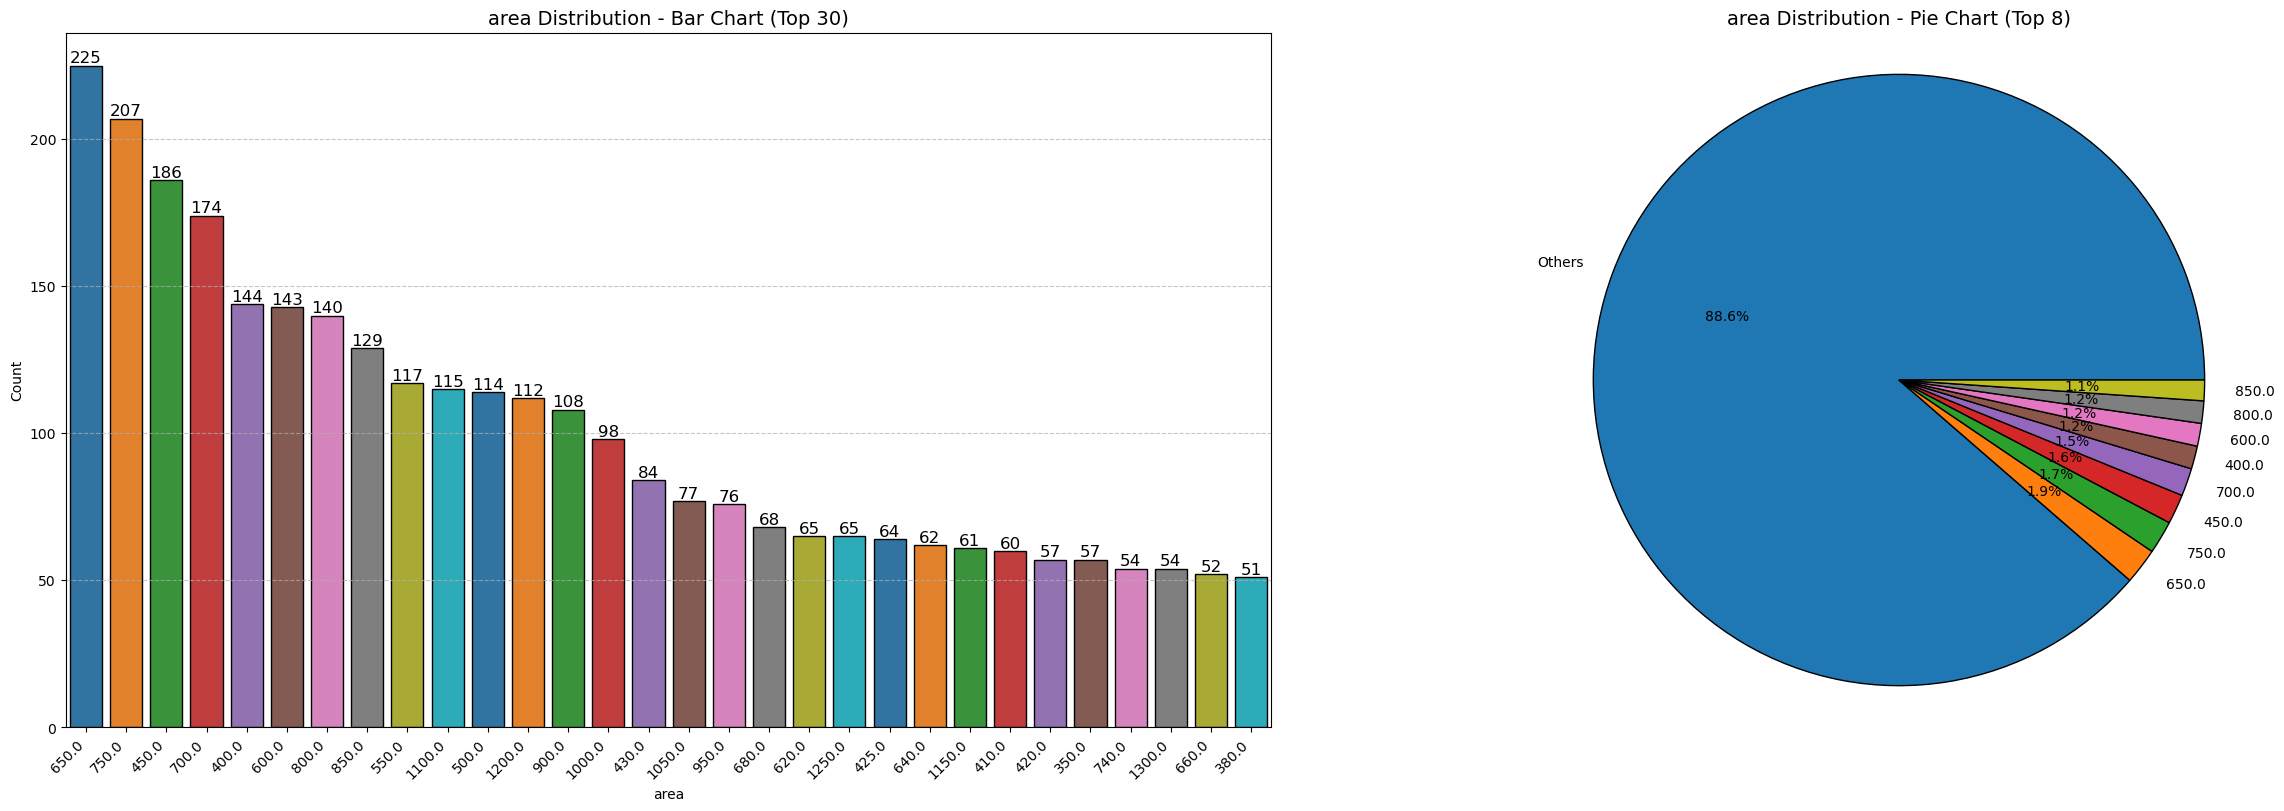

In [56]:
bar_pie_chart_plot(df, 'area', bar_top_n=30, pie_top_n=8)

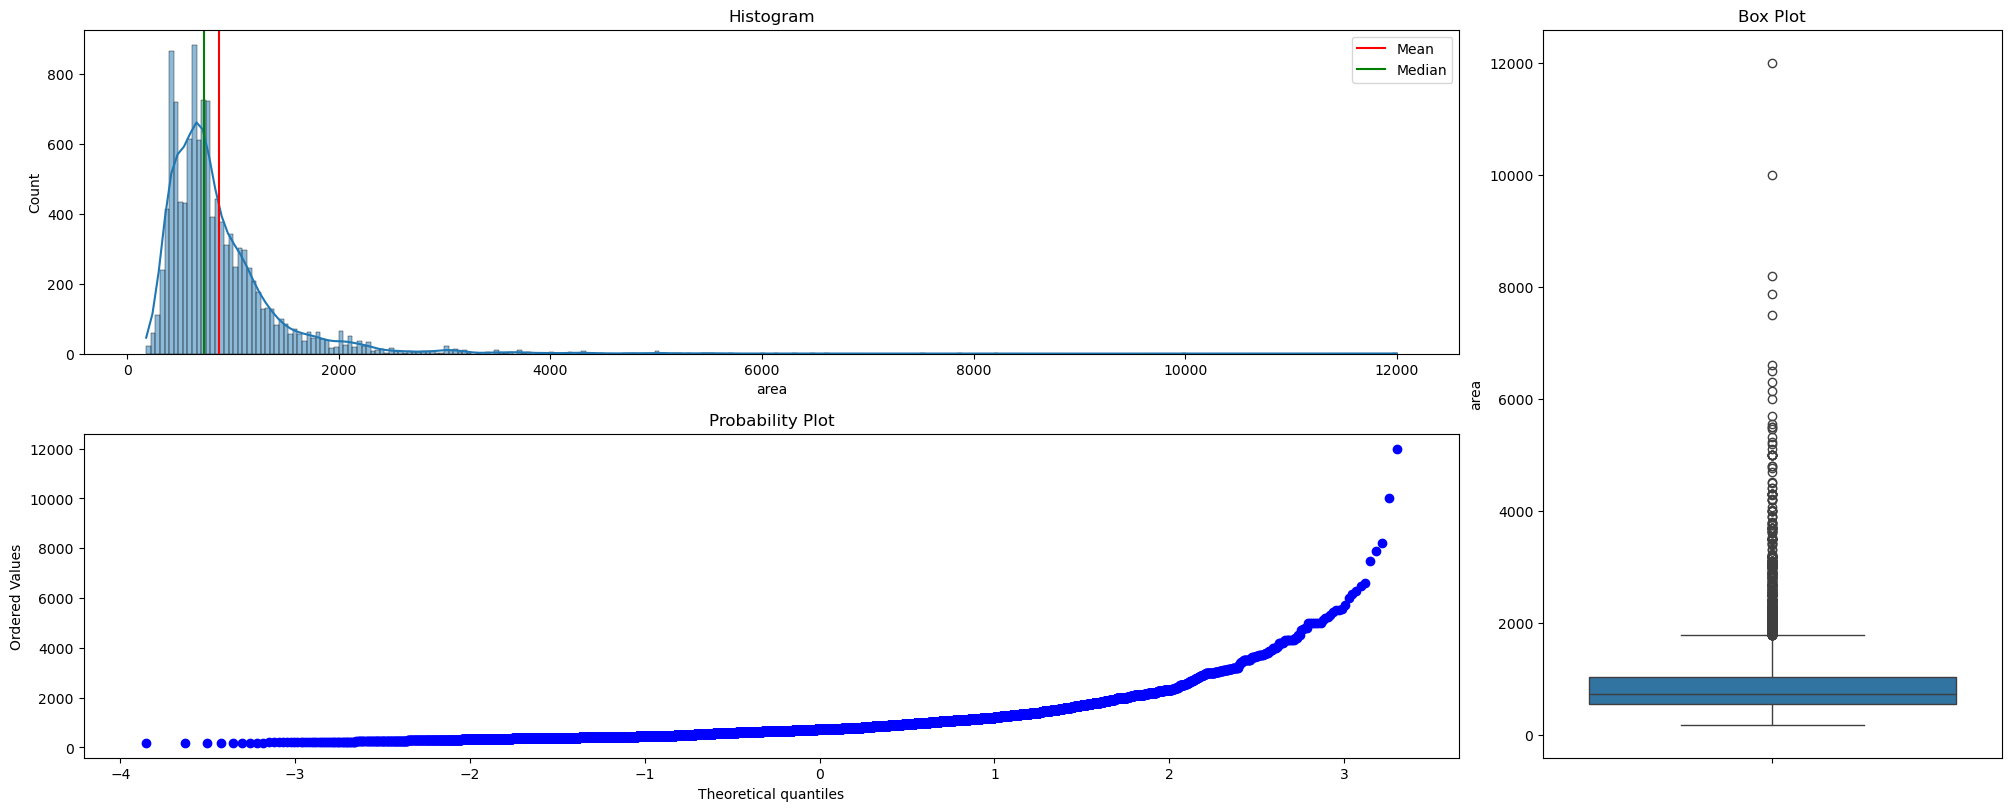

In [57]:
num_three_chart_plot(df, 'area')

`observation` 
- The distribution is right-skewed, with most properties having higher area.
- the IOR(blue box) lies between area 540 to 1034
- Most data points are concentrated in the lower area range 400 to 1200.

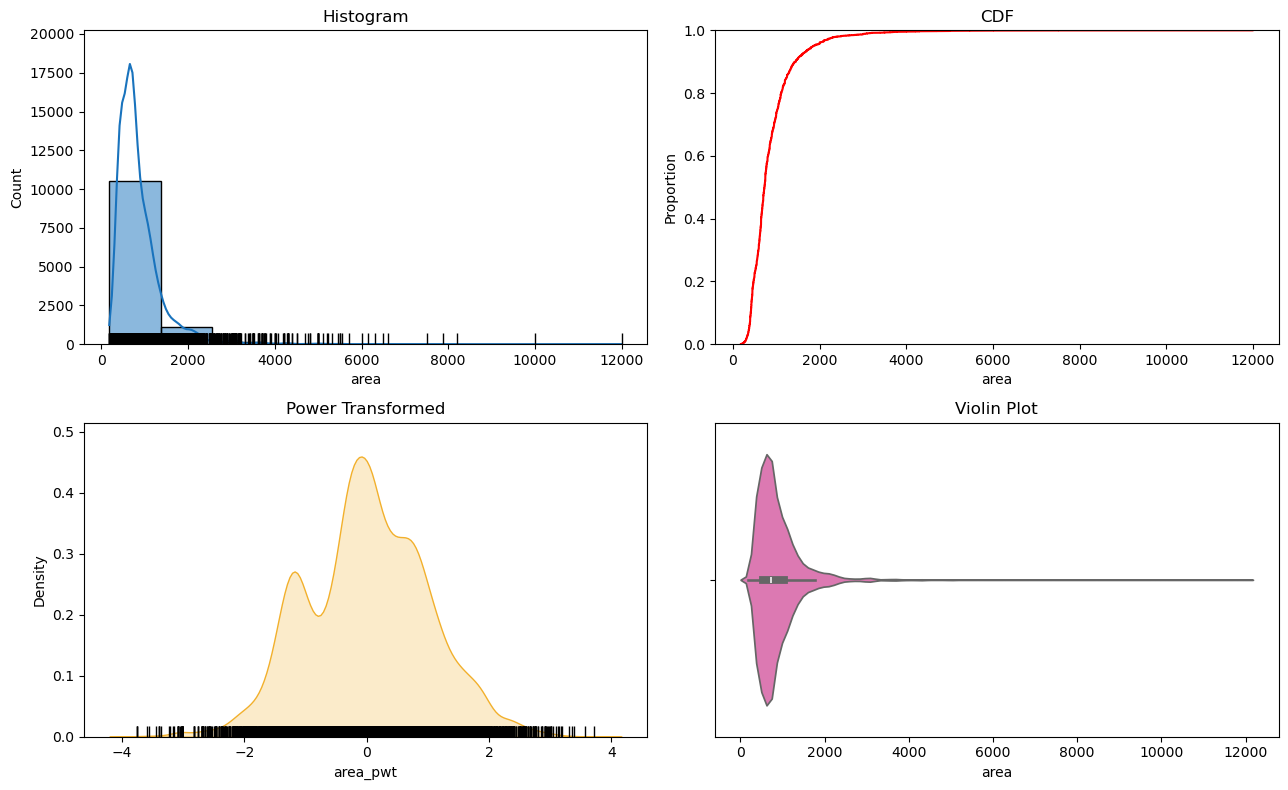

In [58]:
num_univar_plots(df, 'area', bins=10)

In [59]:
num_summary(df,'area')

--------------------------------------------------
Percentiles:


value
percentile          
0             180.00
5             375.00
10            414.00
25            540.00
50            730.00
75           1034.00
90           1445.90
95           1850.00
99           3093.88
100         12000.00

--------------------------------------------------
Central Tendancy:


value
mean                872.251097
trimmed mean (5%)   803.725722
trimmed mean (10%)  777.797195
median              730.000000

--------------------------------------------------
Measure of Spread:


value
var            327783.049931
std               572.523406
IQR               494.000000
lower_bound      -201.000000
upper_bound      1775.000000
mad               240.000000
coef_variance       0.656375

--------------------------------------------------
Skewness and Kurtosis:


value
skewness   4.080851
kurtosis  35.865212

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 667558.3201818736
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 684.0059995252122
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`observation` 
- Skewness (4.08) → Strong right skew; extreme high values present.
- Kurtosis (35.86) → Very high; data is highly leptokurtic with heavy tails and many outliers.
- Next steps → Use transformation (e.g., log or Box-Cox) and handle outliers.
- High CV (>0.5) → Data is highly spread out relative to the mean.  

## bed 

In [60]:
# no of unique categories and value_counts
analyze_column(df, 'bed', top_n=5,threshold=20)

--------------------------------------------------
Quick Glance of 'bed':


0    2.0
1    3.0
2    2.0
3    2.0
4    1.0
Name: bed, dtype: float64

--------------------------------------------------
Meta-data for 'bed':
Data Type      : float64
Cardinality    : 9
Missing Data   : 0 rows (0.00 %)
Available Data : 11,857 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'bed':


count    11857.000000
mean         2.161086
std          0.977148
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bed, dtype: float64

--------------------------------------------------
Top Frequent Values in 'bed':


Empty DataFrame
Columns: [count, percentage, cum_percent]
Index: []


0 Values in 'bed' with cumulative percentage ≤ 20%:
[]


`observation`
- Most values are between 1 and 3 beds
- std 0.98, indicating variability in the number of beds.
- no missing values
- 95% of the properties have 1, 2, 3 or 4 bedrooms.

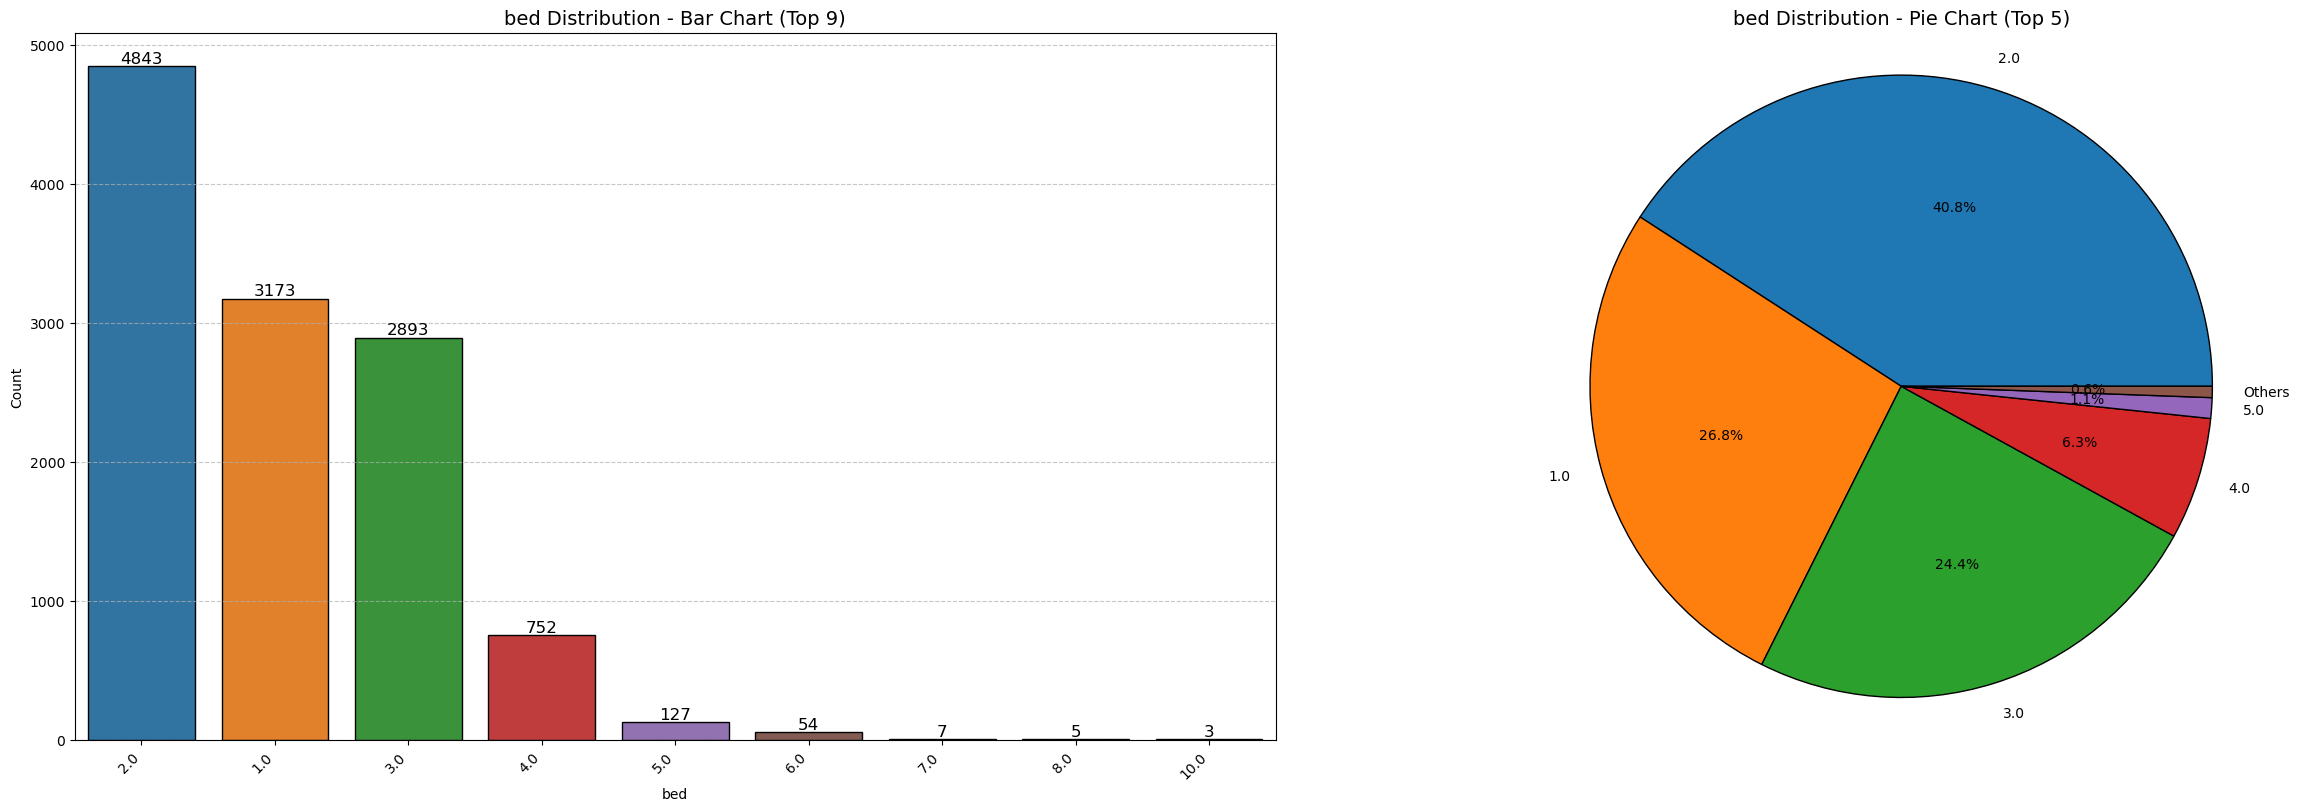

In [61]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'bed', bar_top_n=9, pie_top_n=5)

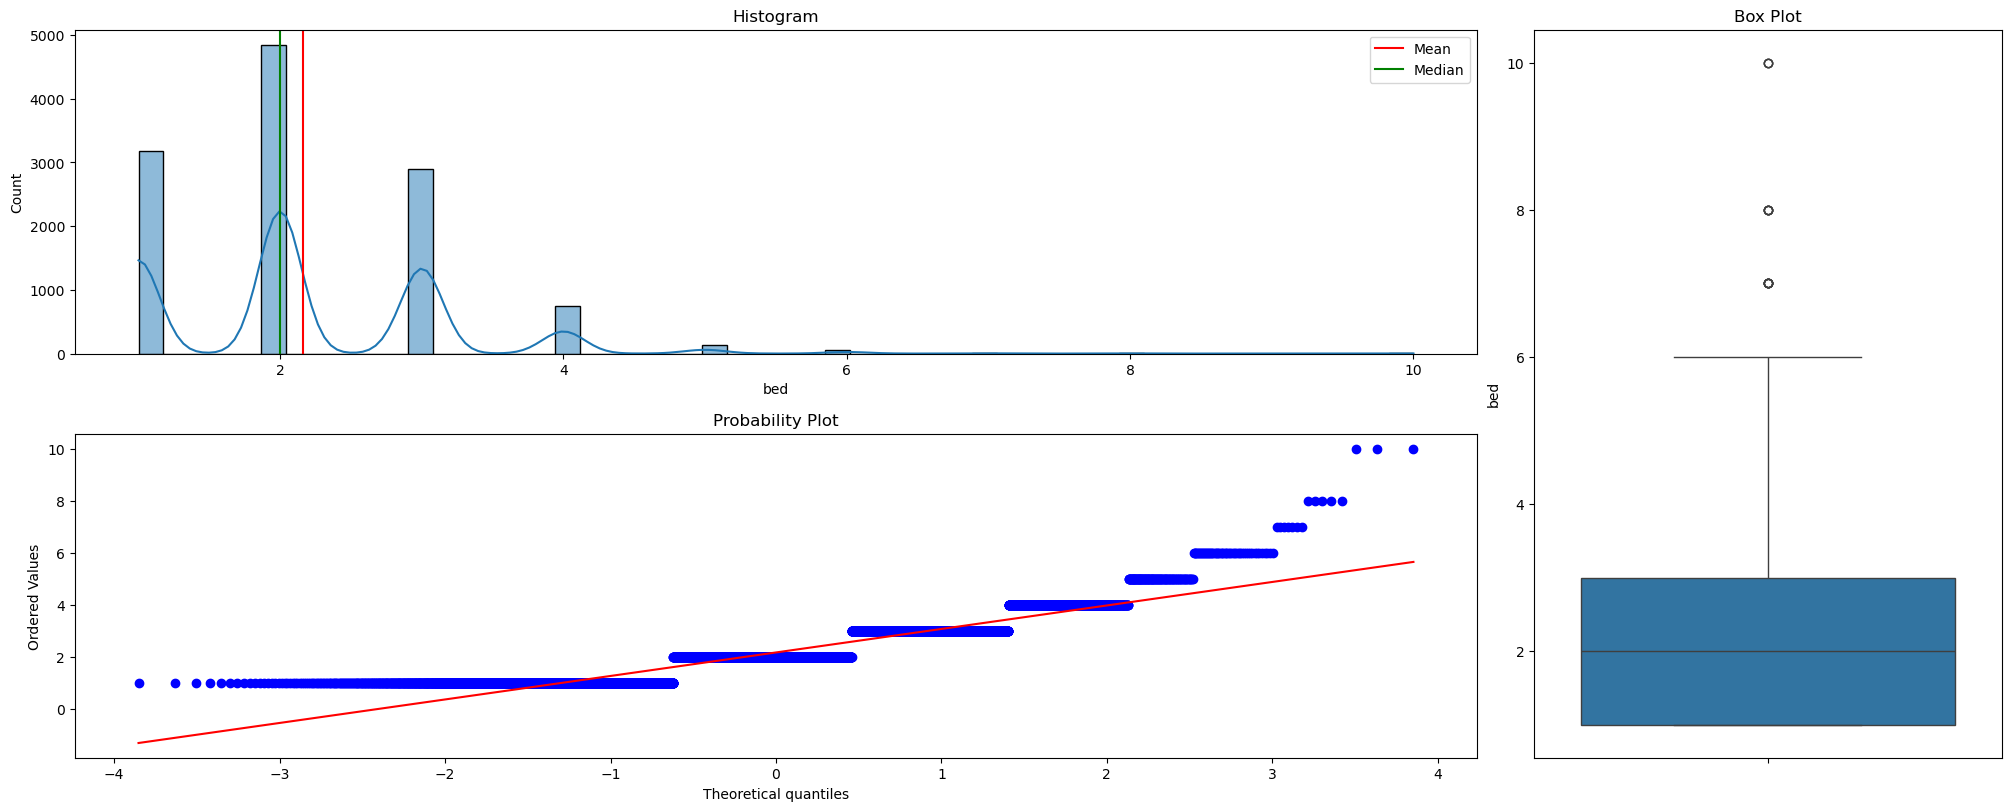

In [62]:
num_three_chart_plot(df, 'bed')

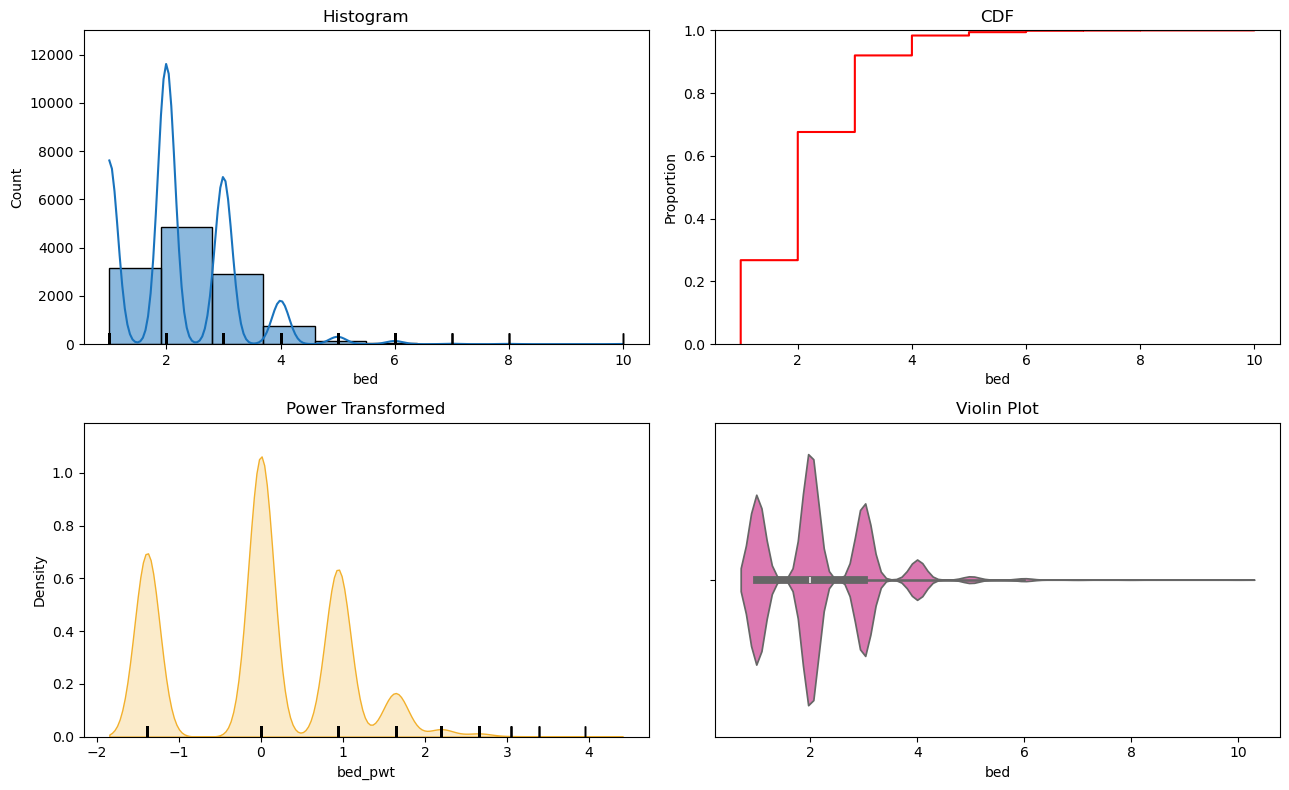

In [63]:
num_univar_plots(df, 'bed', bins=10)

In [64]:
num_summary(df,'bed')

--------------------------------------------------
Percentiles:


value
percentile       
0             1.0
5             1.0
10            1.0
25            1.0
50            2.0
75            3.0
90            3.0
95            4.0
99            5.0
100          10.0

--------------------------------------------------
Central Tendancy:


value
mean                2.161086
trimmed mean (5%)   2.095943
trimmed mean (10%)  2.070412
median              2.000000

--------------------------------------------------
Measure of Spread:


value
var            0.954818
std            0.977148
IQR            2.000000
lower_bound   -2.000000
upper_bound    6.000000
mad            1.000000
coef_variance  0.452156

--------------------------------------------------
Skewness and Kurtosis:


value
skewness  0.957687
kurtosis  2.252850

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 4316.194623378581
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 606.4644305065285
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`obserbvation`
- Skewness (0.95) → Right-skewed distribution.
- Kurtosis (2.25) → Slightly platykurtic (less peaked than normal).
- Moderate CV (0.2–0.5) → Data is moderately spread out.  

## bath

In [65]:
# no of unique categories and value_counts
analyze_column(df, 'bath', top_n=5,threshold=20)

--------------------------------------------------
Quick Glance of 'bath':


0    2.0
1    3.0
2    2.0
3    2.0
4    2.0
Name: bath, dtype: float64

--------------------------------------------------
Meta-data for 'bath':
Data Type      : float64
Cardinality    : 10
Missing Data   : 30 rows (0.25 %)
Available Data : 11,827 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'bath':


count    11827.000000
mean         2.315380
std          0.962674
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bath, dtype: float64

--------------------------------------------------
Top Frequent Values in 'bath':


Empty DataFrame
Columns: [count, percentage, cum_percent]
Index: []


0 Values in 'bath' with cumulative percentage ≤ 20%:
[]


`observation`
- Mean (2.31) ≈ Median (2)
- Std (0.96) → Moderate spread in values.
- Min (1), Max (10) → Values range from 1 to 10.
- IQR → 50% of values lie between 2 and 3 baths.
- 30 missing values
- below 90% properties have 1,2,3 and 99% of the properties have 1,2,3,4 and 5 bathrooms

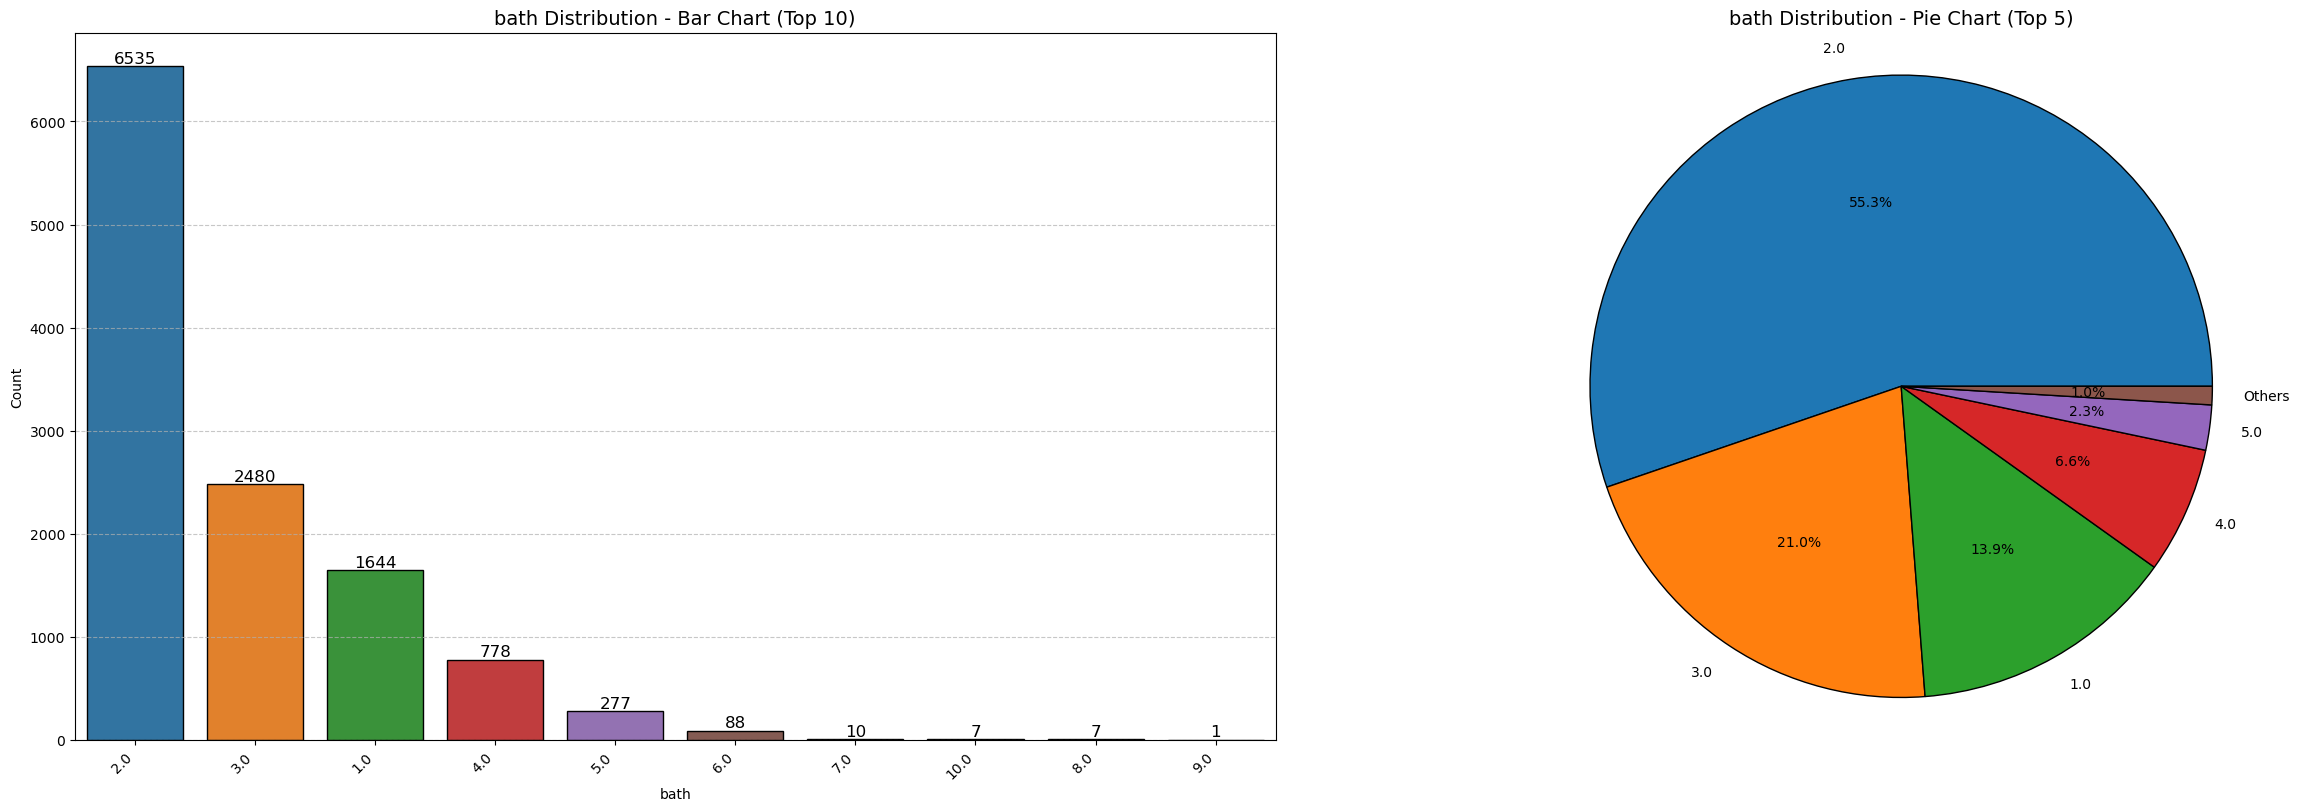

In [66]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'bath', bar_top_n=10, pie_top_n=5)

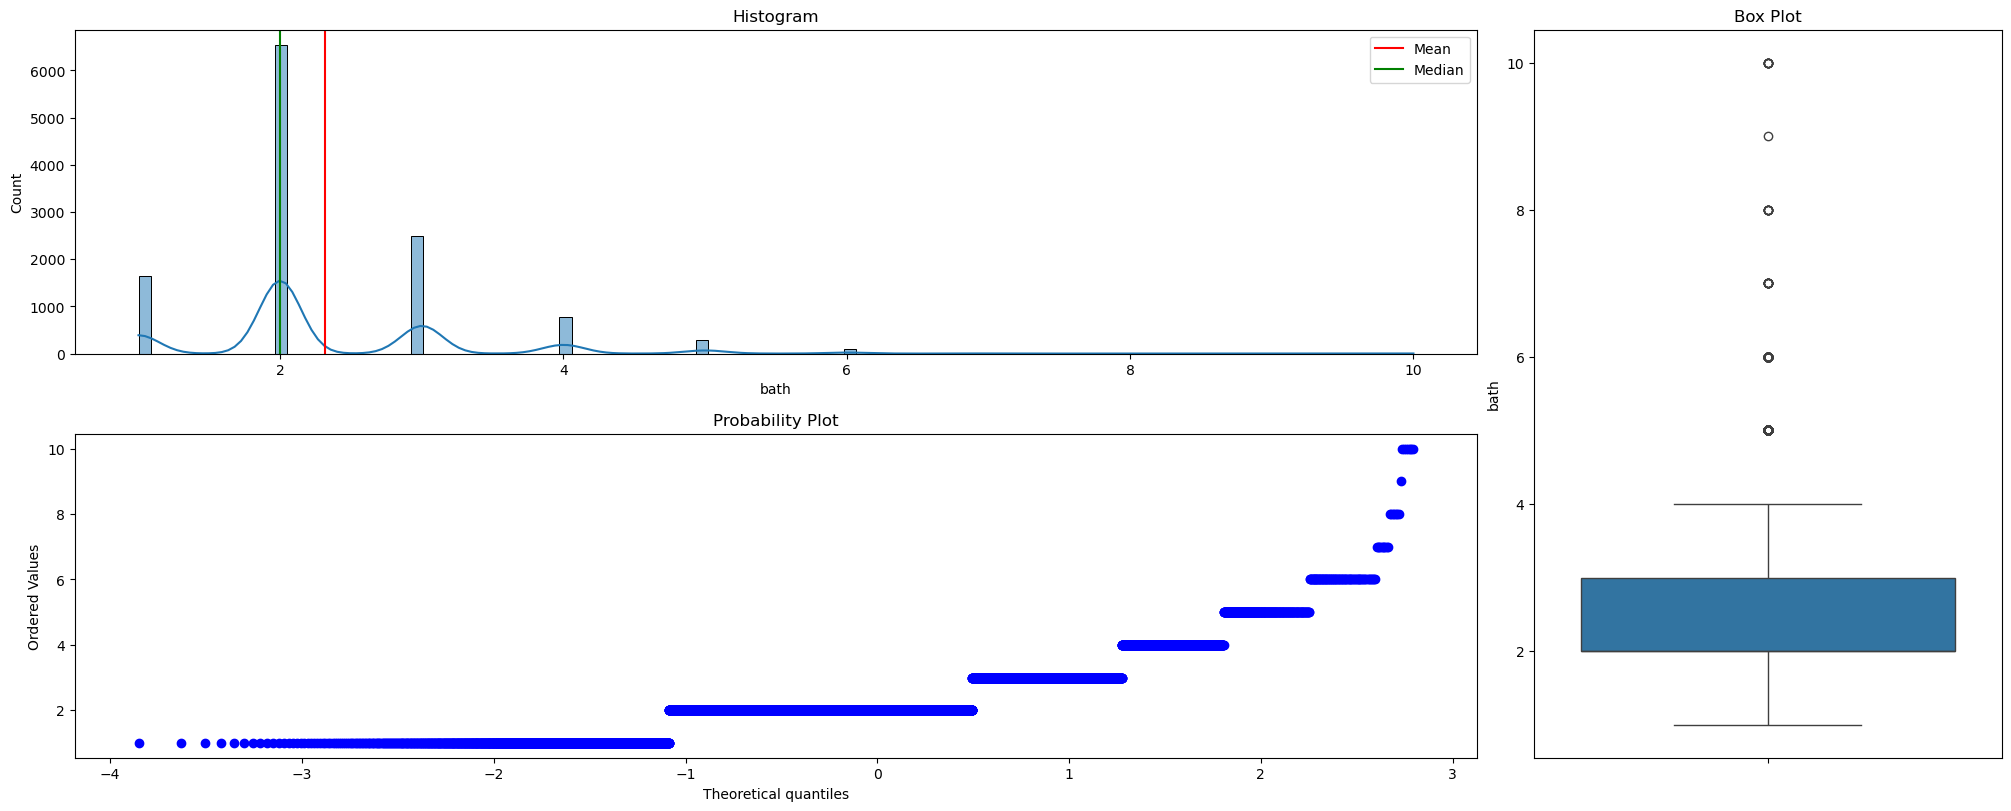

In [67]:
num_three_chart_plot(df, 'bath')

`observation`
- Histogram: Right-skewed, peaks at 2 and 3 baths, outliers inflate the mean.

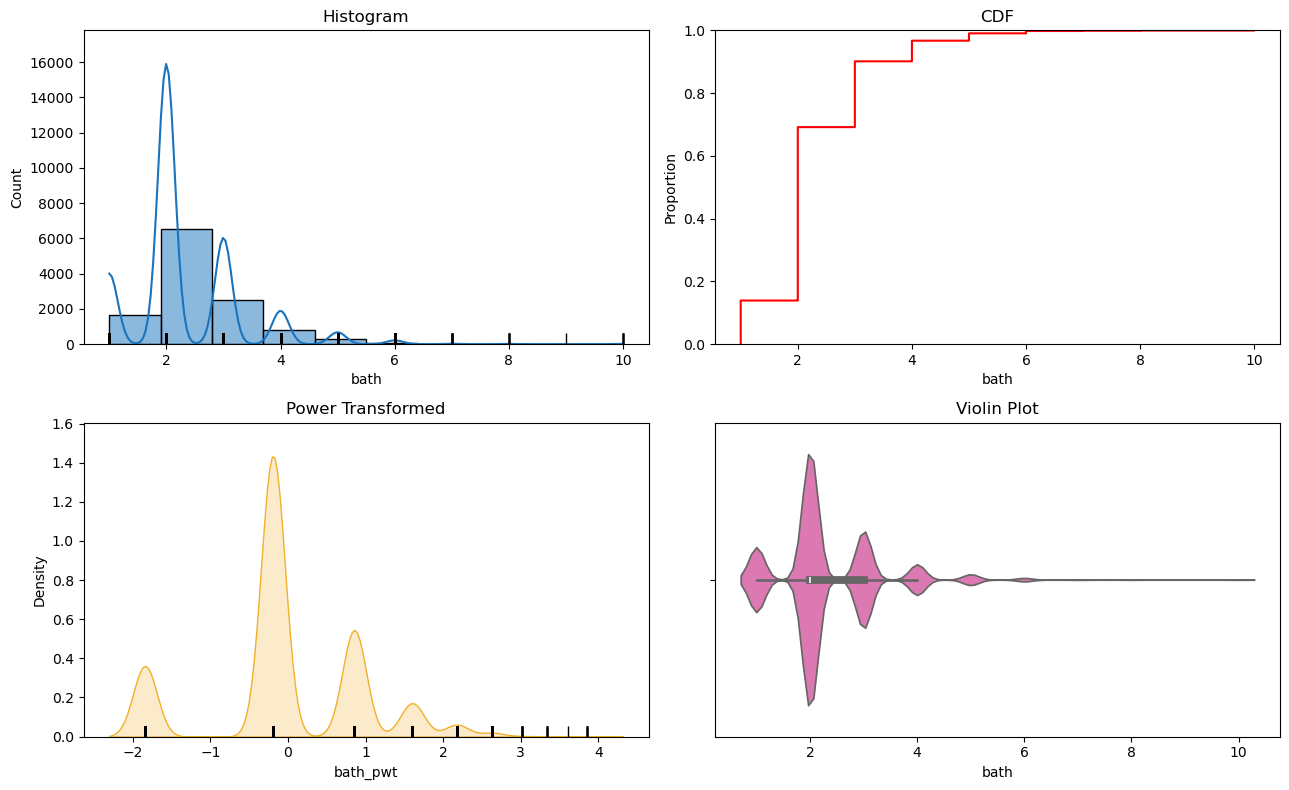

In [68]:
num_univar_plots(df, 'bath', bins=10)

In [69]:
num_summary(df,'bath')

--------------------------------------------------
Percentiles:


value
percentile       
0             1.0
5             1.0
10            1.0
25            2.0
50            2.0
75            3.0
90            3.0
95            4.0
99            5.0
100          10.0

--------------------------------------------------
Central Tendancy:


value
mean                2.315380
trimmed mean (5%)   2.242461
trimmed mean (10%)  2.211772
median              2.000000

--------------------------------------------------
Measure of Spread:


value
var            0.926740
std            0.962674
IQR            1.000000
lower_bound    0.500000
upper_bound    4.500000
mad            0.000000
coef_variance  0.415773

--------------------------------------------------
Skewness and Kurtosis:


value
skewness  1.528108
kurtosis  4.972297

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 16772.598299162324
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 927.3979852394732
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`observation`
- Skewness (1.53): Right-skewed distribution.
- Kurtosis (4.98): Leptokurtic distribution,Higher peak and heavier tails than normal.
- IQR (1.0): Most values between 2 and 3 baths.
- 75th percentile (3.0): 75% have ≤3 baths.
- Moderate CV (0.2–0.5) → Data is moderately spread out.    

## balcony

In [70]:
# no of unique categories and value_counts
analyze_column(df, 'balcony', top_n=5,threshold=20)

--------------------------------------------------
Quick Glance of 'balcony':


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: balcony, dtype: float64

--------------------------------------------------
Meta-data for 'balcony':
Data Type      : float64
Cardinality    : 8
Missing Data   : 5,801 rows (48.92 %)
Available Data : 6,056 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'balcony':


count    6056.000000
mean        1.845773
std         1.049238
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         8.000000
Name: balcony, dtype: float64

--------------------------------------------------
Top Frequent Values in 'balcony':


Empty DataFrame
Columns: [count, percentage, cum_percent]
Index: []


0 Values in 'balcony' with cumulative percentage ≤ 20%:
[]


`observation`
- Missing Values (5803) → High missing percentage.
- Std (1.05) → Moderate variability.
- 25% (1), 75% (3) → 50% of values between 1 and 3.
- Min (1), Max (8) → Range from 1 to 8, indicating potential upper outliers.
- 90% of the properties have 1,2,3 balconies.
- 50% properties have 1 balcony

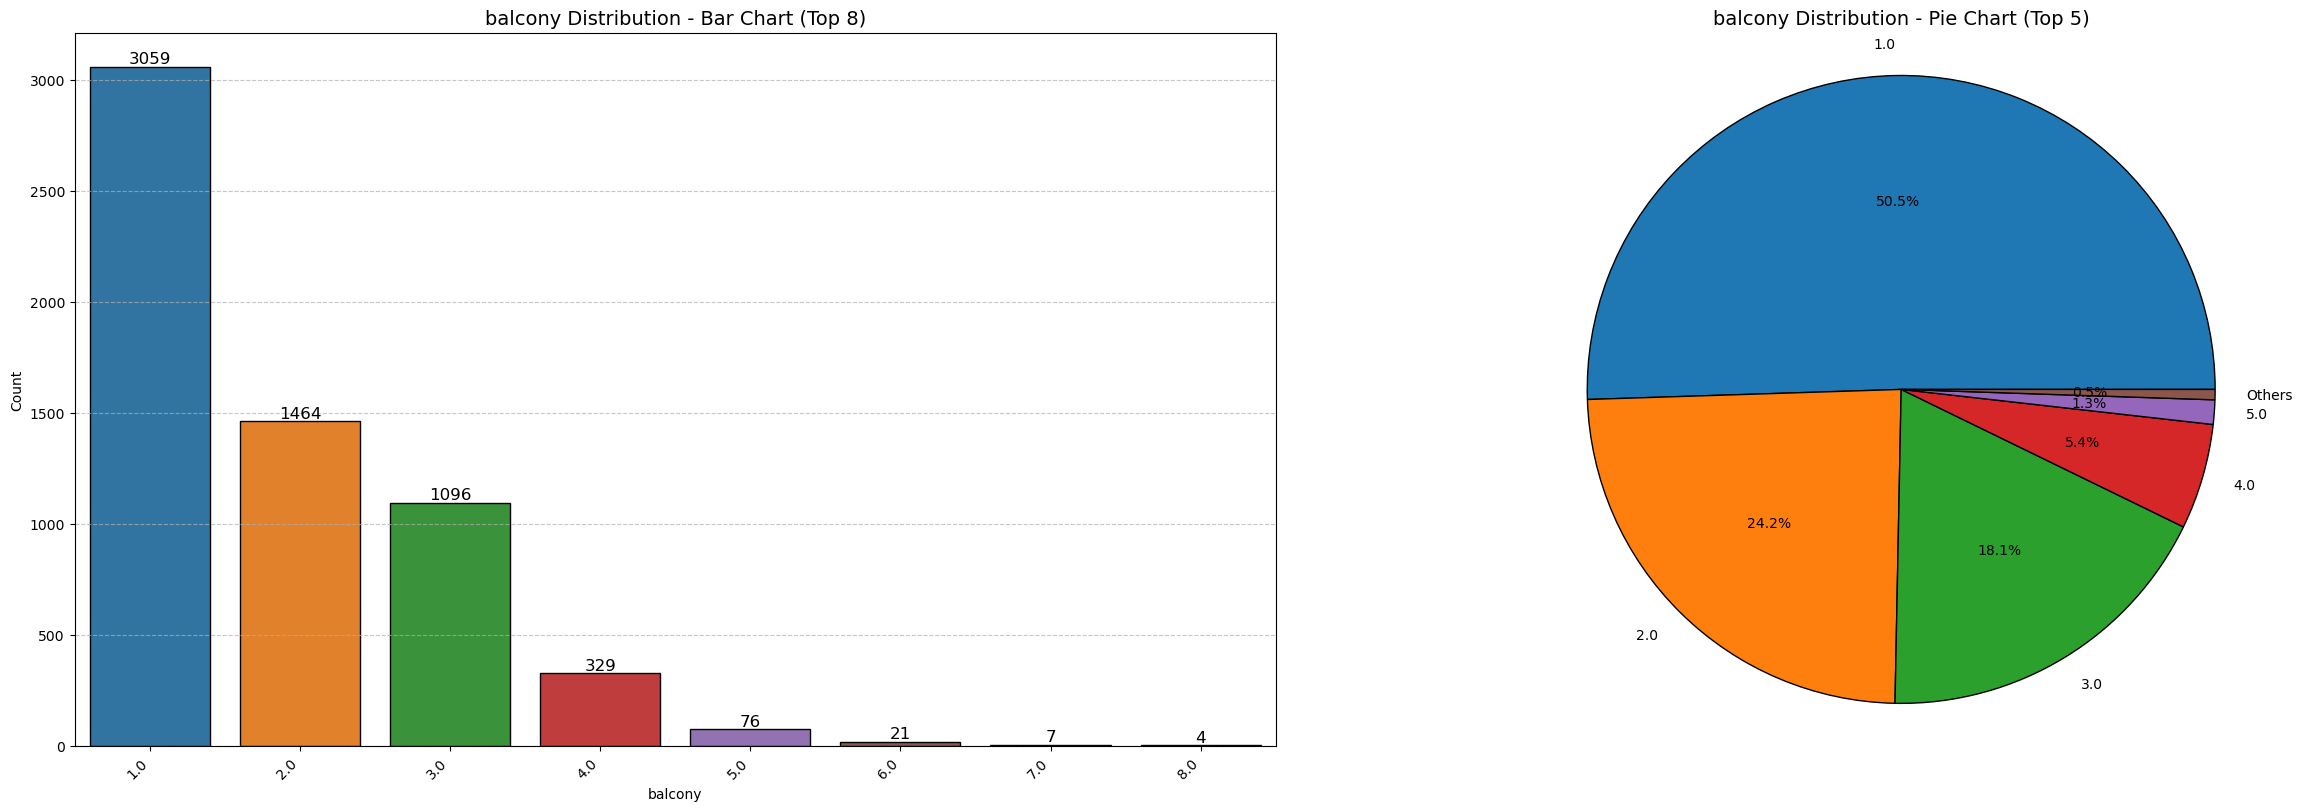

In [71]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'balcony', bar_top_n=8, pie_top_n=5)

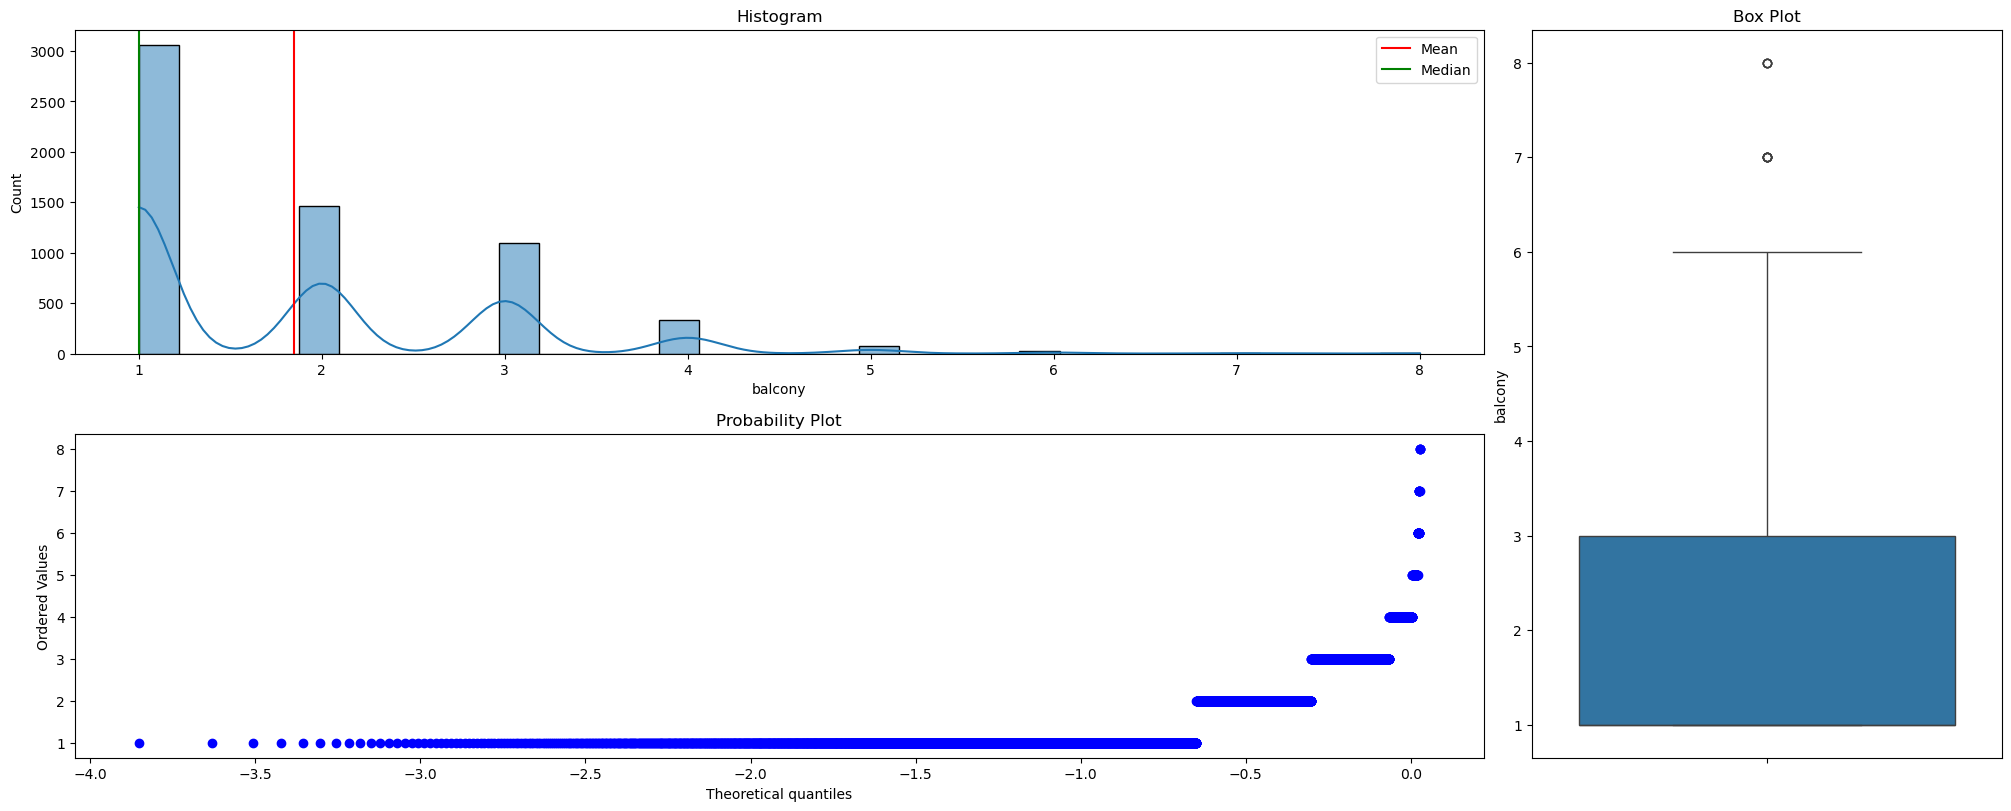

In [72]:
num_three_chart_plot(df, 'balcony')

`observation`
- The histogram shows that the majority of values are concentrated at 1 and 2 balconies.
- The data is highly right-skewed, with few observations for values above 4 balconies.
- The box plot shows outliers for values above 6 balconies.
- The probability plot indicates deviations from normality, especially in the upper tail.

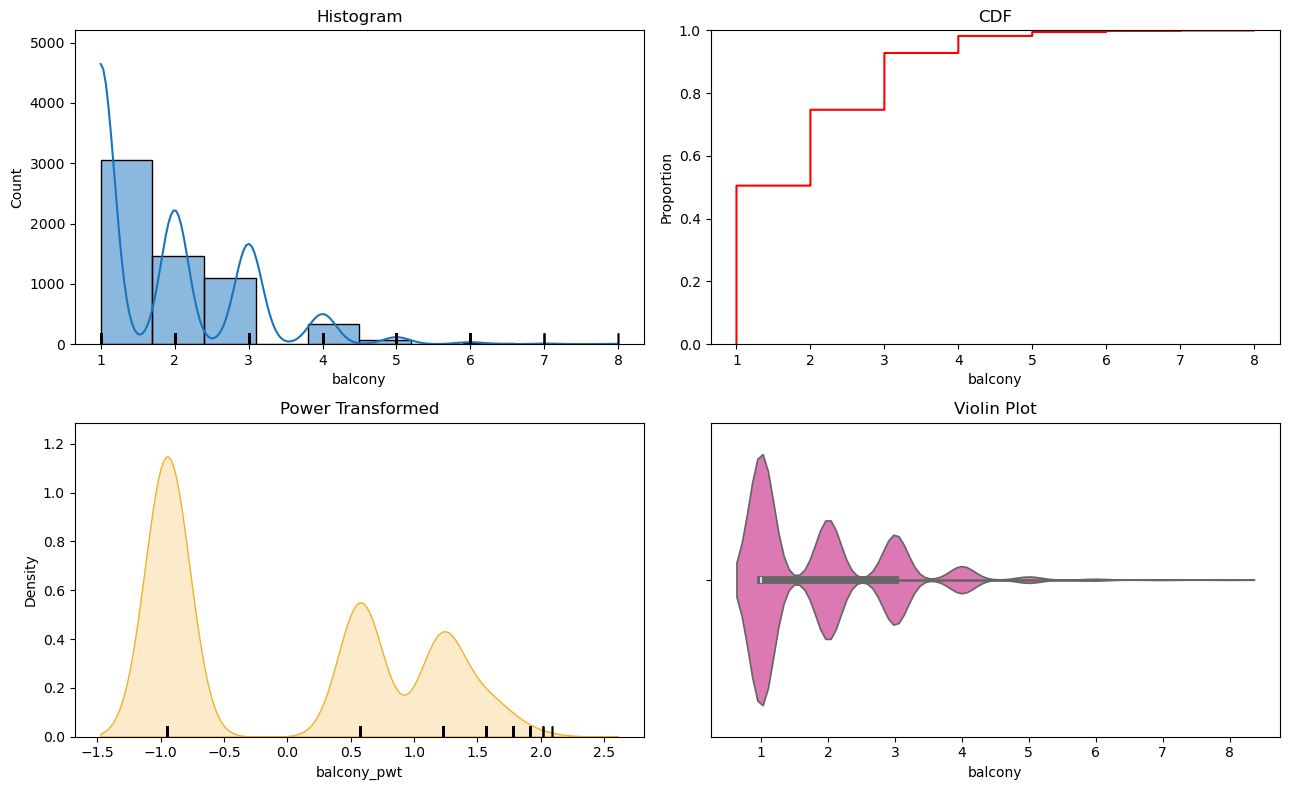

In [73]:
num_univar_plots(df, 'balcony', bins=10)

In [74]:
num_summary(df,'balcony')

--------------------------------------------------
Percentiles:


value
percentile       
0             1.0
5             1.0
10            1.0
25            1.0
50            1.0
75            3.0
90            3.0
95            4.0
99            5.0
100           8.0

--------------------------------------------------
Central Tendancy:


value
mean                1.845773
trimmed mean (5%)   1.744864
trimmed mean (10%)  1.685101
median              1.000000

--------------------------------------------------
Measure of Spread:


value
var            1.100900
std            1.049238
IQR            2.000000
lower_bound   -2.000000
upper_bound    6.000000
mad            0.000000
coef_variance  0.568455

--------------------------------------------------
Skewness and Kurtosis:


value
skewness  1.274400
kurtosis  1.779691

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 2435.450600358352
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.786
Test Statistic       : 518.2272926456844
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`observation`
- The data is positively skewed with a skewness value of 1.27.
- Kurtosis value of 1.78 indicates a relatively flat distributio(platykurtic).
- High CV (>0.5) → Data is highly spread out relative to the mean.  

## lift

In [75]:
# no of unique categories and value_counts
analyze_column(df, 'lift', top_n=5,threshold=20)

--------------------------------------------------
Quick Glance of 'lift':


0    4.0
1    4.0
2    2.0
3    NaN
4    3.0
Name: lift, dtype: float64

--------------------------------------------------
Meta-data for 'lift':
Data Type      : float64
Cardinality    : 10
Missing Data   : 5,419 rows (45.70 %)
Available Data : 6,438 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'lift':


count    6438.000000
mean        3.117428
std         1.715025
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: lift, dtype: float64

--------------------------------------------------
Top Frequent Values in 'lift':


Empty DataFrame
Columns: [count, percentage, cum_percent]
Index: []


0 Values in 'lift' with cumulative percentage ≤ 20%:
[]


`observation`
- Mean (3.12) < Median (3) → Approximately symmetric distribution.
- Std (1.71) → Moderate variability.
- 25% (2), 75% (4) → 50% of values between 2 and 4.
- Min (1), Max (10) → Range from 1 to 10, no extreme outliers.
- 90% properties have lifts between this 1.0, 2.0, 3.0, 4.0, 5.0
- very few properties have more than 4 lifts

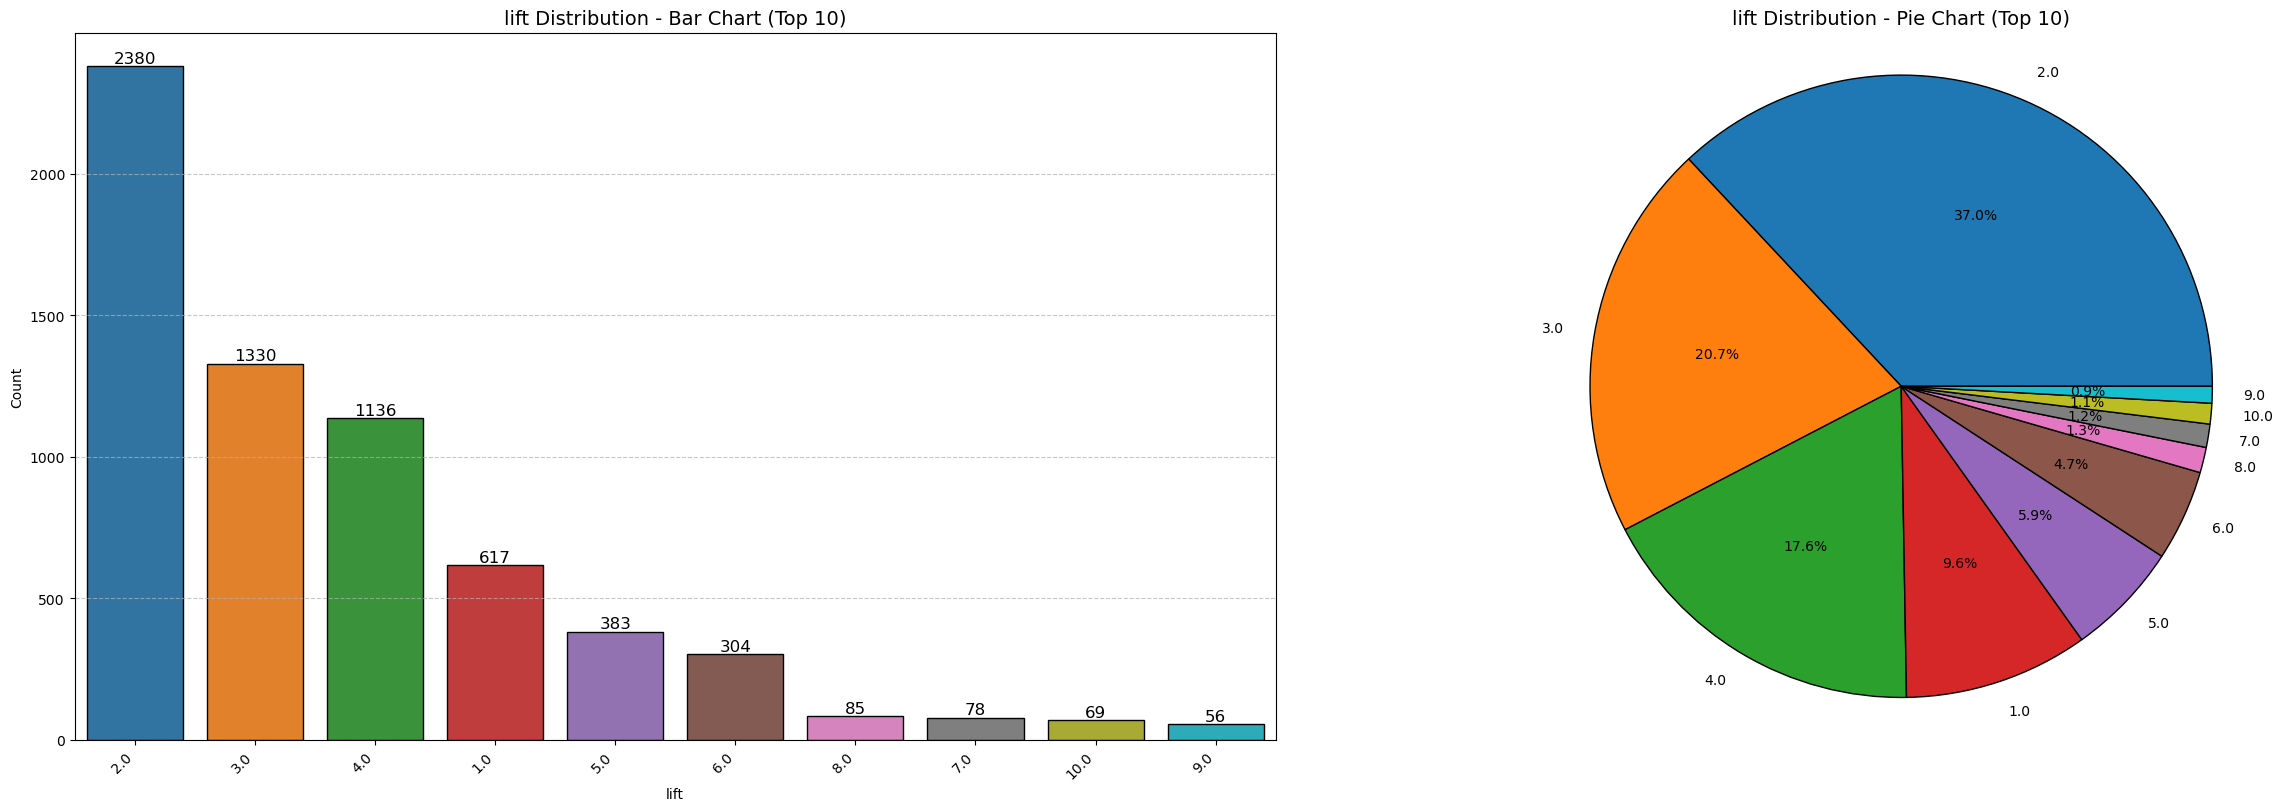

In [76]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'lift', bar_top_n=10, pie_top_n=10) 

`observation`
- 84% properties have less than 4 lifts

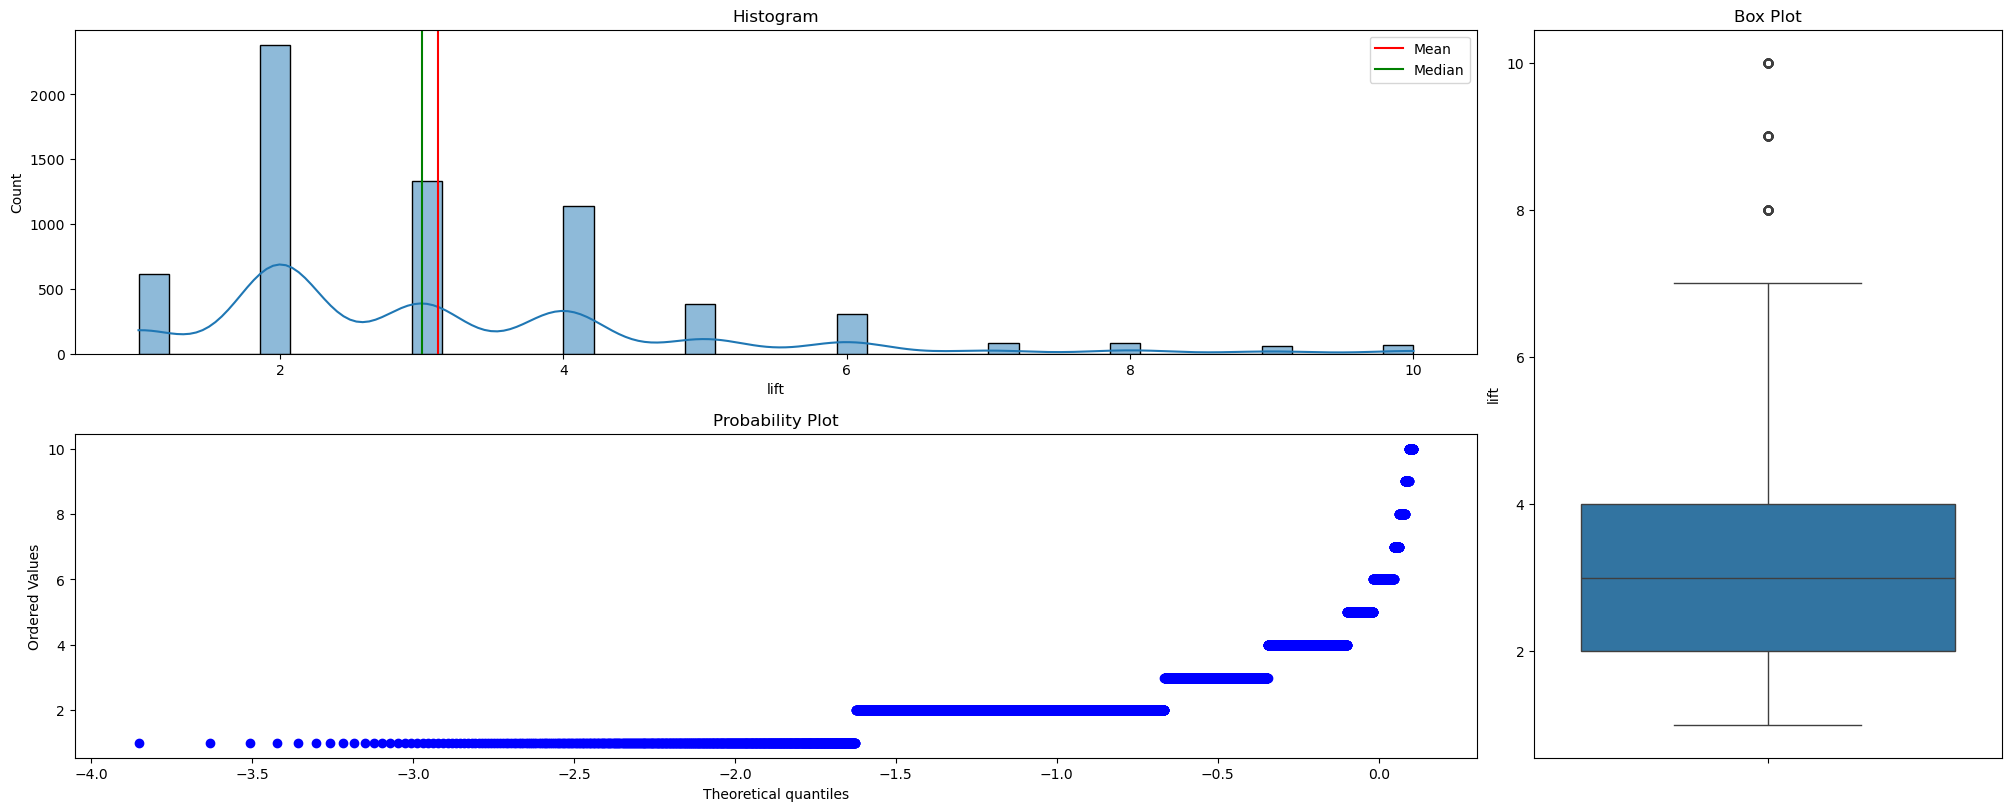

In [77]:
num_three_chart_plot(df, 'lift')

`observation`
- Most data lies between 2 and 4.
- There are a few extreme outliers beyond 6, with the maximum value reaching 10.
- probability plot: The data deviates significantly from a normal distribution, as the points do not follow the straight theoretical line.

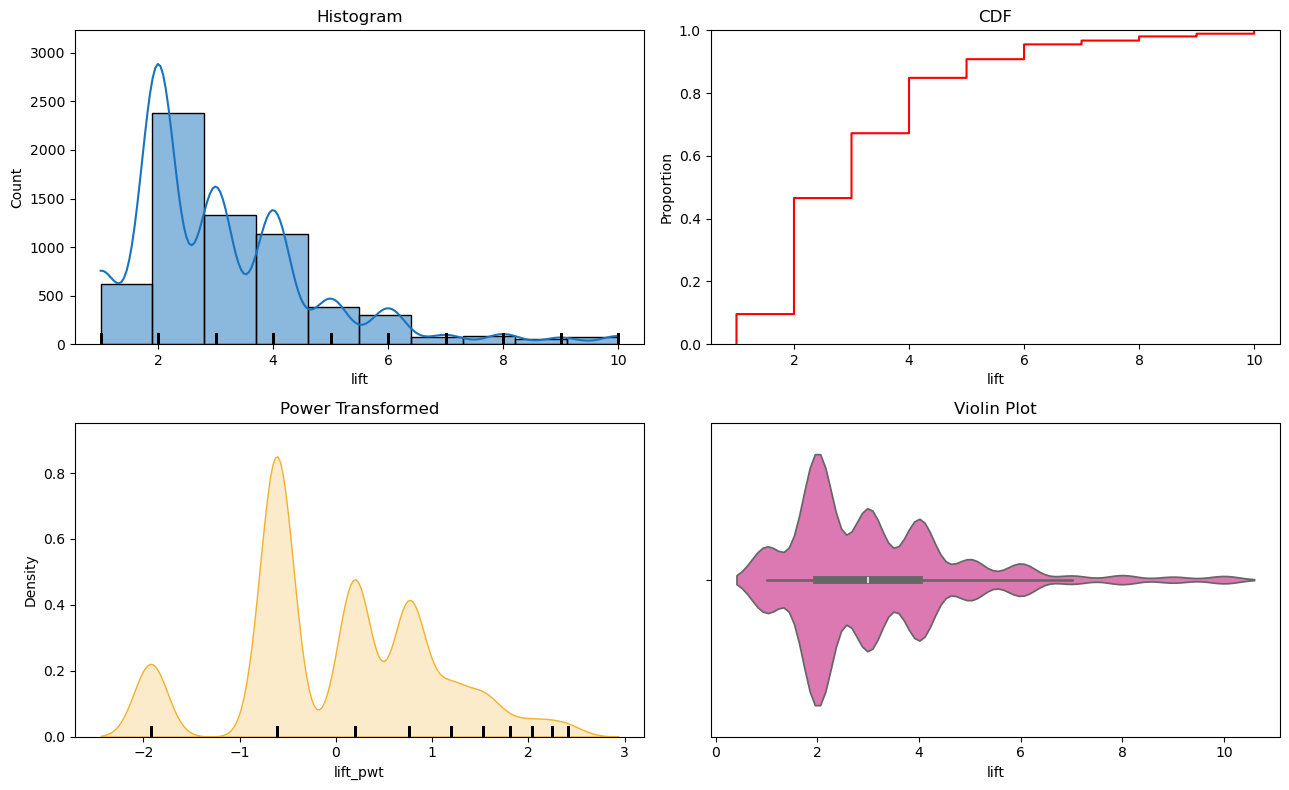

In [78]:
num_univar_plots(df, 'lift', bins=10)

In [79]:
num_summary(df,'lift')

--------------------------------------------------
Percentiles:


value
percentile       
0             1.0
5             1.0
10            2.0
25            2.0
50            3.0
75            4.0
90            5.0
95            6.0
99           10.0
100          10.0

--------------------------------------------------
Central Tendancy:


value
mean                3.117428
trimmed mean (5%)   2.955659
trimmed mean (10%)  2.892469
median              3.000000

--------------------------------------------------
Measure of Spread:


value
var            2.941312
std            1.715025
IQR            2.000000
lower_bound   -1.000000
upper_bound    7.000000
mad            1.000000
coef_variance  0.550141

--------------------------------------------------
Skewness and Kurtosis:


value
skewness  1.533900
kurtosis  2.939338

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 4835.965186276106
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 318.4291429258965
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`observation`
- 5439 missing values 
- Positively skewed (1.53), moderate heavy tails (2.94).
- High CV (>0.5) → Data is highly spread out relative to the mean.  

## parking

In [80]:
# no of unique categories and value_counts
analyze_column(df, 'parking', top_n=5,threshold=100)

--------------------------------------------------
Quick Glance of 'parking':


0    1.0
1    1.0
2    1.0
3    NaN
4    1.0
Name: parking, dtype: float64

--------------------------------------------------
Meta-data for 'parking':
Data Type      : float64
Cardinality    : 10
Missing Data   : 6,208 rows (52.36 %)
Available Data : 5,649 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'parking':


count    5649.000000
mean        1.391220
std         0.720674
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: parking, dtype: float64

--------------------------------------------------
Top Frequent Values in 'parking':


count  percentage  cum_percent
parking                                
1.0       3952       69.96        69.96
2.0       1346       23.83        93.79
3.0        242        4.28        98.07
4.0         82        1.45        99.52
5.0         16        0.28        99.80


10 Values in 'parking' with cumulative percentage ≤ 100%:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 10.0, 9.0, 12.0, 8.0]


`observation`
- 6211 missing values
- Mean (1.39) > Median (1) → Skewed distribution, more values near 1.
- Std (0.72) → Moderate spread in values.
- Min (1), Max (12) → Values range from 1 to 12.
- Most common value: Likely 1, as indicated by 25th and 50th percentiles.
- Potential outliers: Values close to 12 may be outliers.

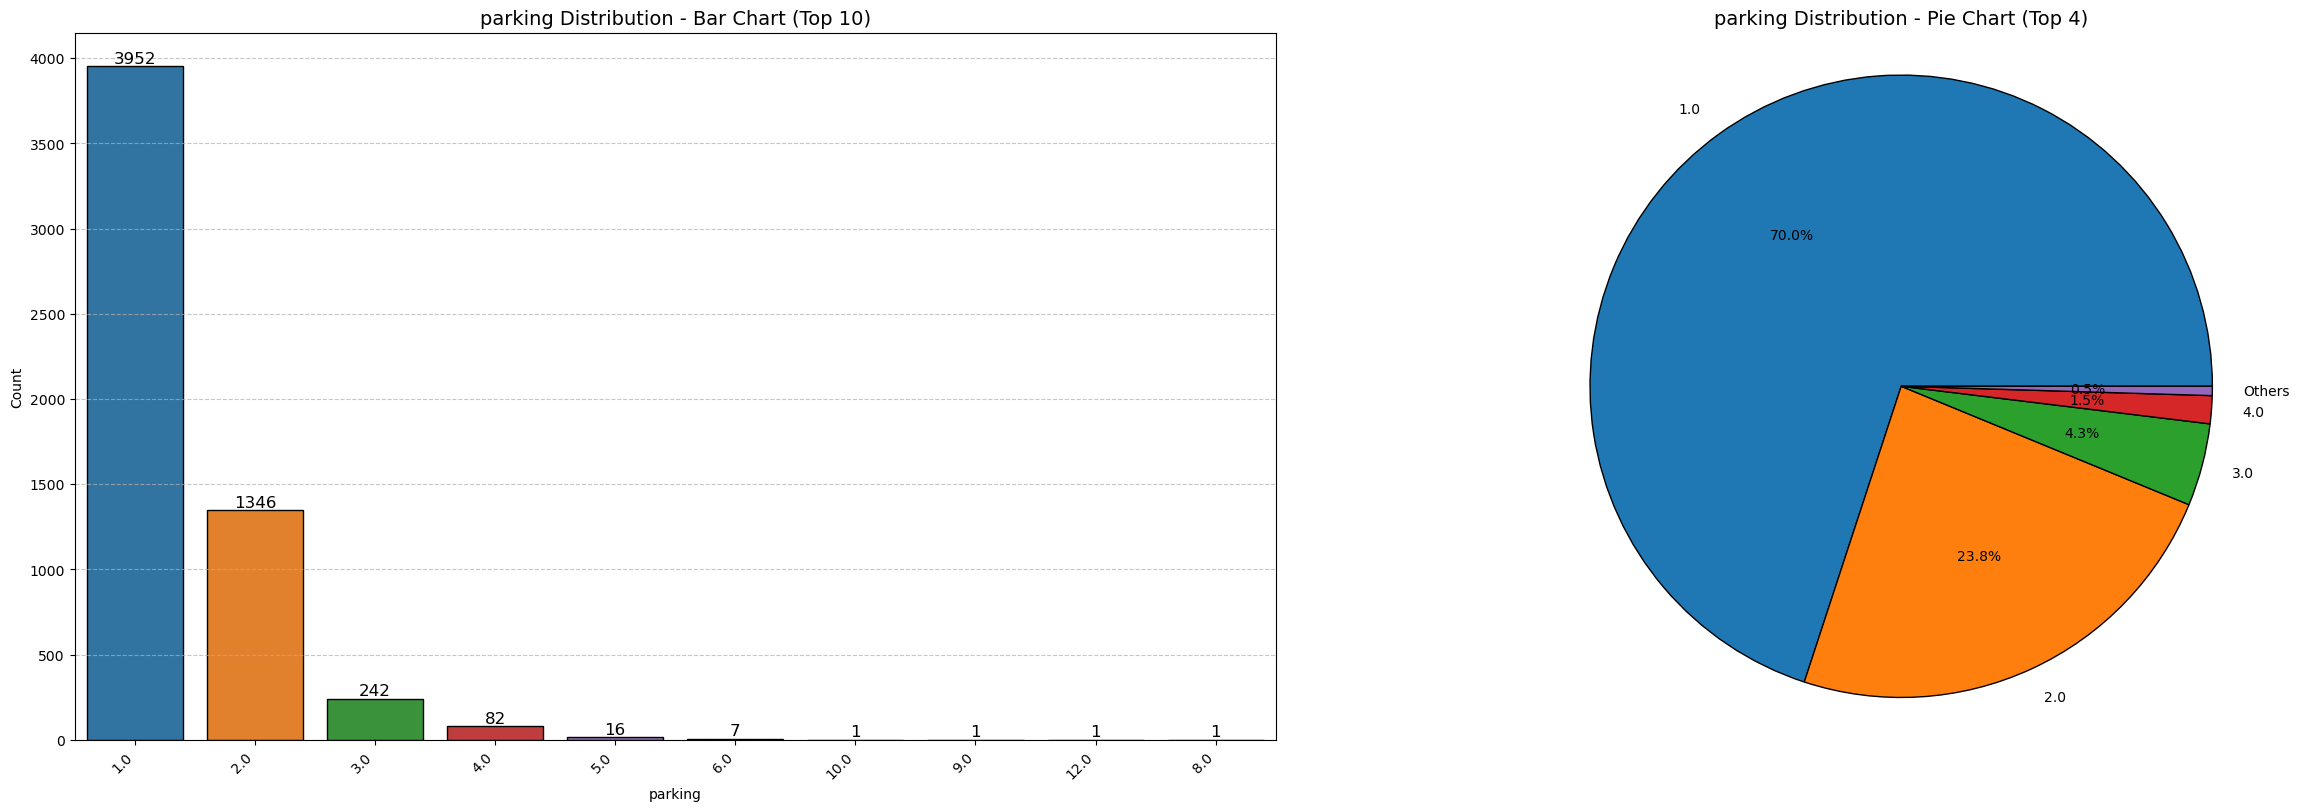

In [81]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'parking', bar_top_n=10, pie_top_n=4)

`observation`
- 70% of properties have only 1 parking followed by 23.8% properties have 2 parking
- feature engineering of the categories which has value_counts less than 7

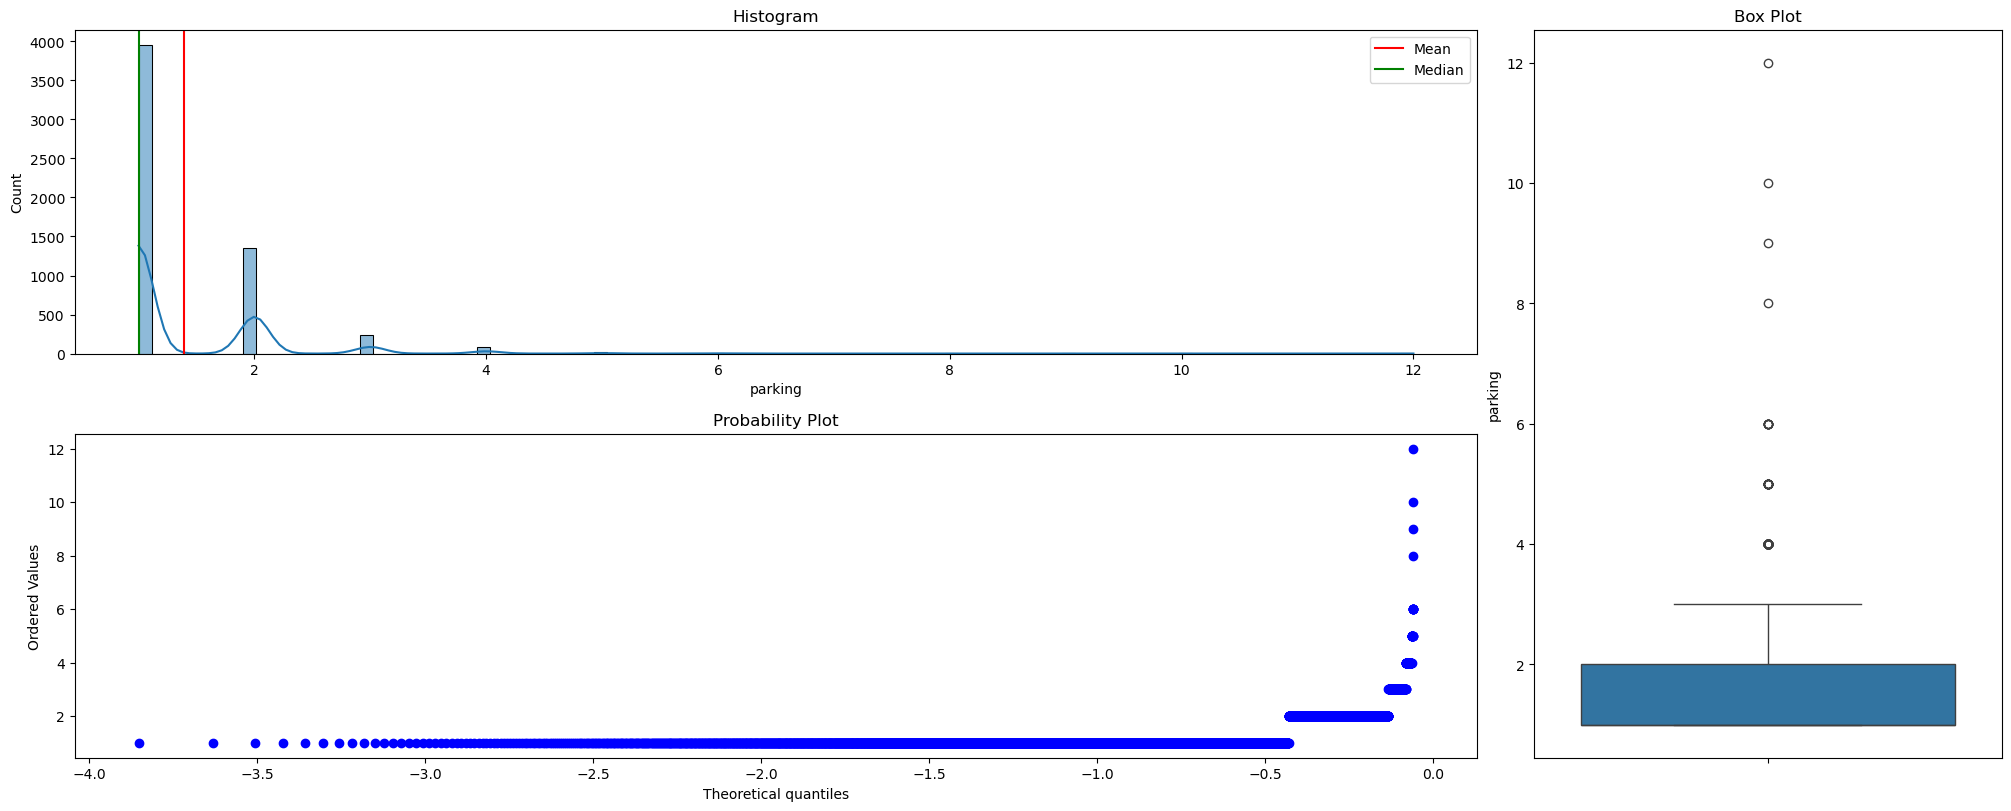

In [82]:
num_three_chart_plot(df, 'parking')

`observation`
- Outliers present, especially for values ≥ 4.
- Most values are concentrated at the lower end.
- 90% of values fall between 1 and 2.

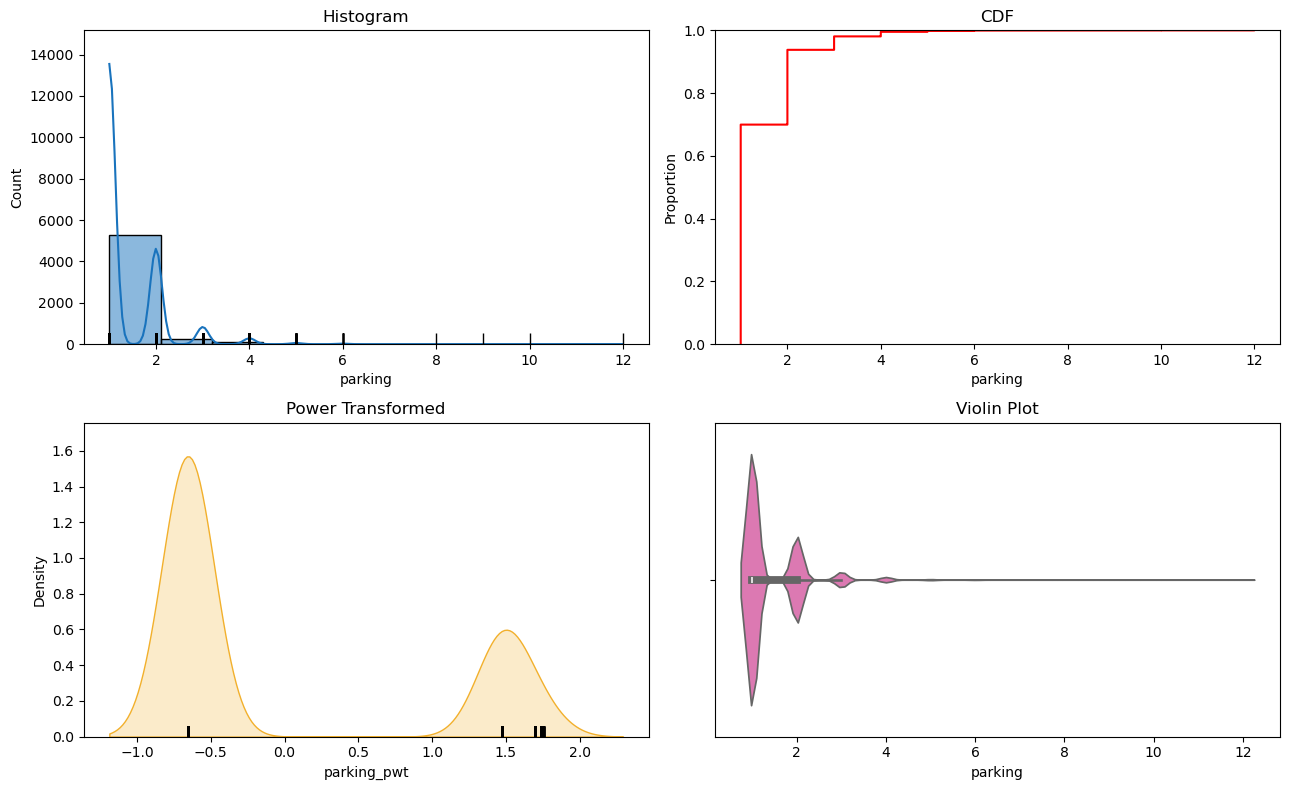

In [83]:
num_univar_plots(df, 'parking', bins=10)

In [84]:
num_summary(df,'parking')

--------------------------------------------------
Percentiles:


value
percentile       
0             1.0
5             1.0
10            1.0
25            1.0
50            1.0
75            2.0
90            2.0
95            3.0
99            4.0
100          12.0

--------------------------------------------------
Central Tendancy:


value
mean                1.391220
trimmed mean (5%)   1.291839
trimmed mean (10%)  1.250608
median              1.000000

--------------------------------------------------
Measure of Spread:


value
var            0.519370
std            0.720674
IQR            1.000000
lower_bound   -0.500000
upper_bound    3.500000
mad            0.000000
coef_variance  0.518016

--------------------------------------------------
Skewness and Kurtosis:


value
skewness   3.089482
kurtosis  19.987263

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 102835.54652167625
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.786
Test Statistic       : 914.030827958416
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`observation`
- Skewness (3.09) → Strong right skew, confirming a heavy tail on the right.
- Kurtosis (19.98) → Highly peaked distribution, indicating extreme values i.e leptokurtic distribution.
- High CV (>0.5) → Data is highly spread out relative to the mean.  

## costpersqft

In [85]:
# no of unique categories and value_counts
analyze_column(df, 'costpersqft', top_n=5,threshold=20)

--------------------------------------------------
Quick Glance of 'costpersqft':


0    28346.0
1    12441.0
2    28892.0
3    23500.0
4    20724.0
Name: costpersqft, dtype: float64

--------------------------------------------------
Meta-data for 'costpersqft':
Data Type      : float64
Cardinality    : 7473
Missing Data   : 6 rows (0.05 %)
Available Data : 11,851 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'costpersqft':


count     11851.000000
mean      27718.066886
std       15823.093316
min         289.000000
25%       16923.000000
50%       25578.000000
75%       34284.500000
max      138889.000000
Name: costpersqft, dtype: float64

--------------------------------------------------
Top Frequent Values in 'costpersqft':


count  percentage  cum_percent
costpersqft                                
25000.0         64        0.54         0.54
20000.0         59        0.50         1.04
30000.0         46        0.39         1.43
33333.0         36        0.30         1.73
35000.0         35        0.30         2.03


230 Values in 'costpersqft' with cumulative percentage ≤ 20%:
[25000.0, 20000.0, 30000.0, 33333.0, 35000.0, 26667.0, 10000.0, 50000.0, 28000.0, 27778.0, 31250.0, 16667.0, 40000.0, 57673.0, 27000.0, 24000.0, 13333.0, 8000.0, 14000.0, 16000.0, 18000.0, 23333.0, 12500.0, 23077.0, 15000.0, 62500.0, 22500.0, 14286.0, 32000.0, 37500.0, 42000.0, 27273.0, 21429.0, 24444.0, 22222.0, 15385.0, 32051.0, 18750.0, 28571.0, 75000.0, 22000.0, 29167.0, 26000.0, 26316.0, 29412.0, 12000.0, 45000.0, 5000.0, 6667.0, 22727.0, 28889.0, 9000.0, 66667.0, 41667.0, 18182.0, 27500.0, 16981.0, 7500.0, 17500.0, 60000.0, 43750.0, 38462.0, 35714.0, 36000.0, 4000.0, 18333.0, 17857.0, 8333.0, 23000.0, 29000.0, 25714.0, 32500.0, 31667.0, 42857.0, 33750.0, 29231.0, 27143.0, 22917.0, 17000.0, 9333.0, 80000.0, 25455.0, 24286.0, 23673.0, 26900.0, 25641.0, 15750.0, 23256.0, 65000.0, 55000.0, 8182.0, 19231.0, 17143.0, 12857.0, 24390.0, 31818.0, 26744.0, 21667.0, 14615.0, 30682.0, 17692.0, 30556.0, 25430.0, 30769.0, 34286.0, 

`observation`
- range of the sqft ranges from 289.00 sqft to 138889 sqft
- 6 missing values
- Mean (27716) > Median (25,579) → Right-skewed distribution.
- Std (15822) → High variability in cost per sqft.
- there is much difference between the 75% and max costpersqft,possible outliers

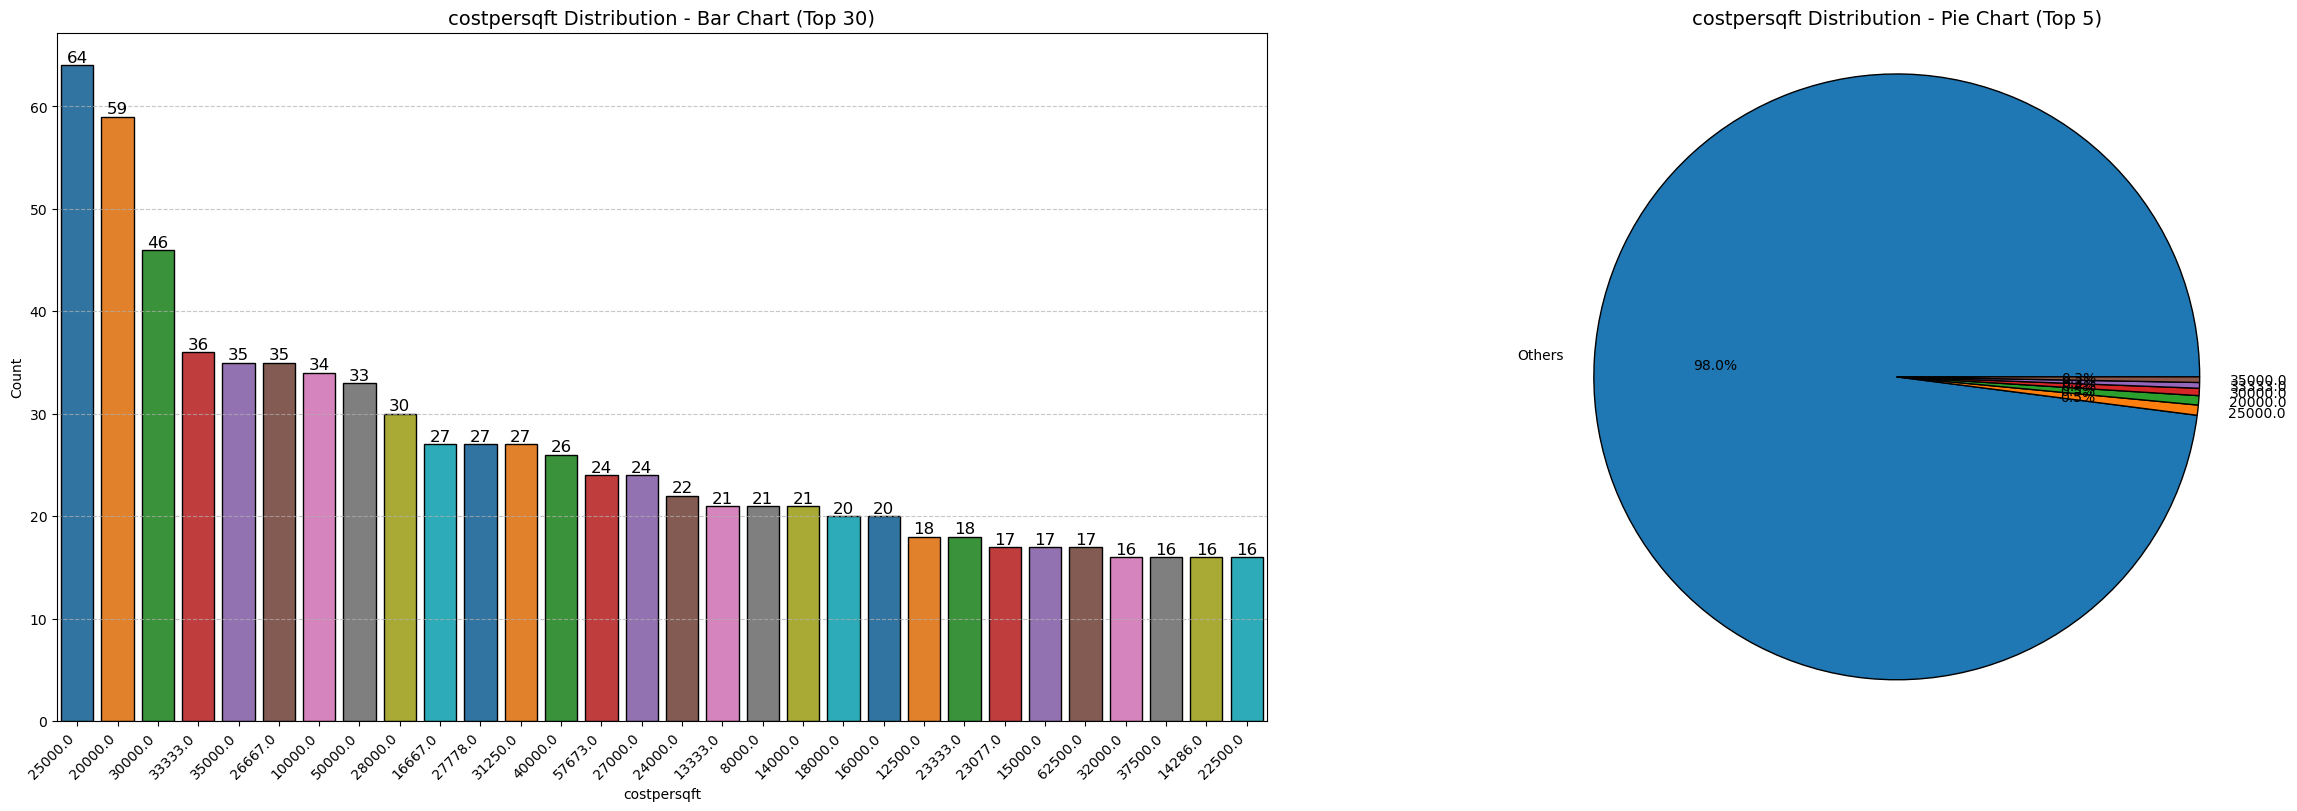

In [86]:
bar_pie_chart_plot(df, 'costpersqft', bar_top_n=30, pie_top_n=5)

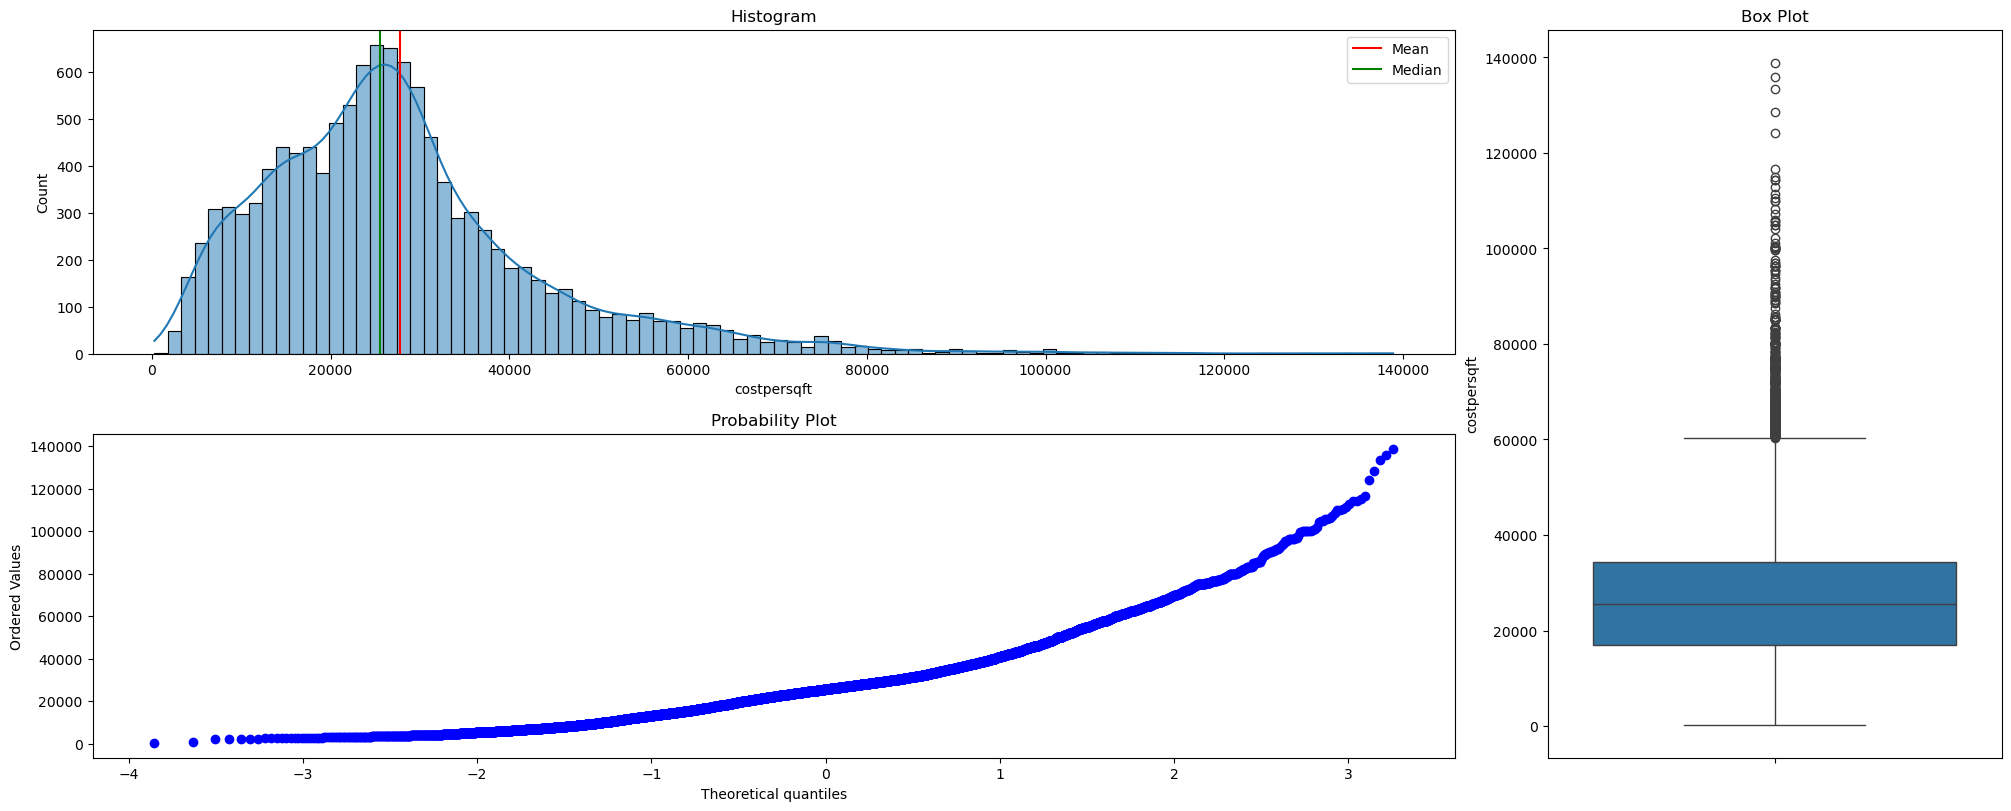

In [87]:
num_three_chart_plot(df, 'costpersqft')

`observation`
- Highly right-skewed distribution (long tail), most data in the lower range.
- Significant outliers present (seen in box plot).
- Mean > Median, confirming skewness.
- QQ plot shows deviation from normality.
- Most data falls within a narrow range, as shown by the small box and whiskers.

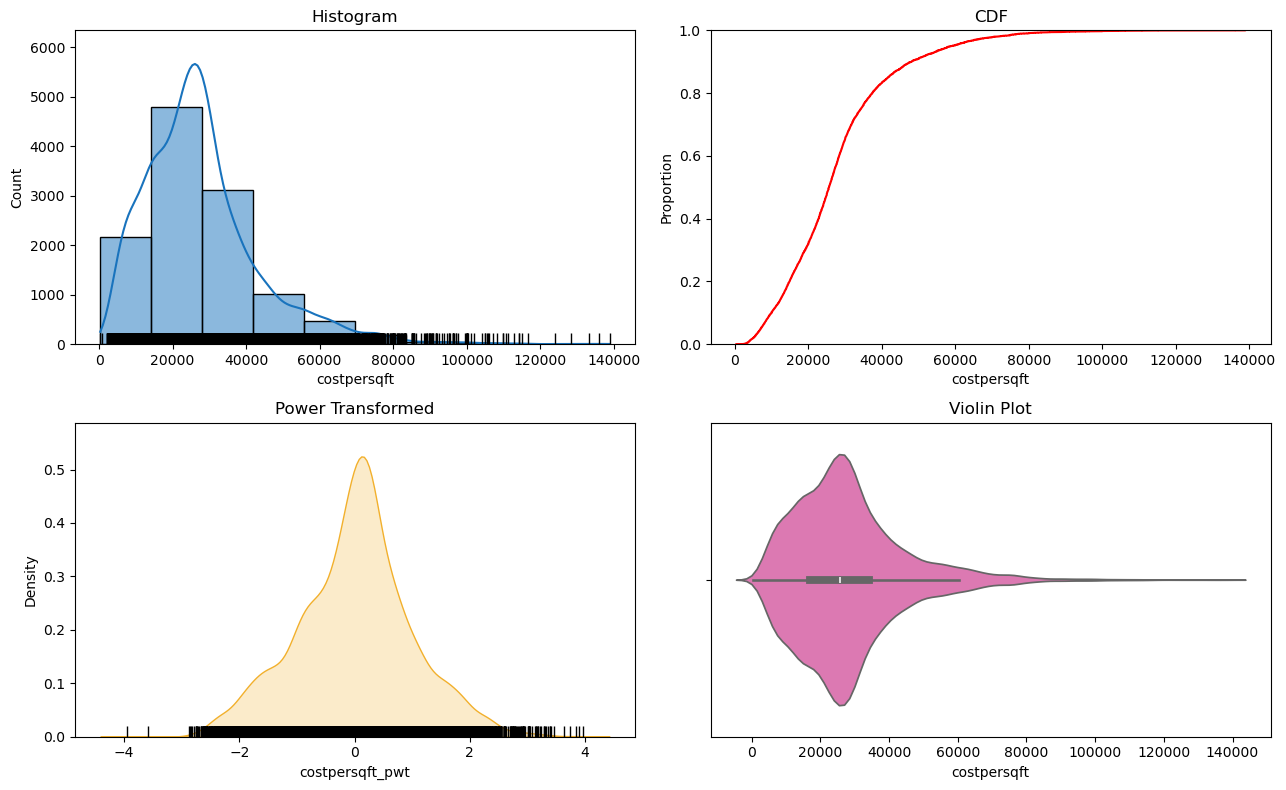

In [88]:
num_univar_plots(df, 'costpersqft', bins=10)

In [89]:
num_summary(df,'costpersqft')

--------------------------------------------------
Percentiles:


value
percentile          
0              289.0
5             7009.5
10            9956.0
25           16923.0
50           25578.0
75           34284.5
90           48000.0
95           58910.0
99           78891.0
100         138889.0

--------------------------------------------------
Central Tendancy:


value
mean                27718.066886
trimmed mean (5%)   26511.152591
trimmed mean (10%)  25974.632257
median              25578.000000

--------------------------------------------------
Measure of Spread:


value
var            2.503703e+08
std            1.582309e+04
IQR            1.736150e+04
lower_bound   -9.119250e+03
upper_bound    6.032675e+04
mad            8.666000e+03
coef_variance  5.708585e-01

--------------------------------------------------
Skewness and Kurtosis:


value
skewness  1.365741
kurtosis  3.255866

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 8911.721539779875
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 208.6997929338213
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`observation`
- Few outliers affect the distribution.  
- Positive skewness 1.36 means a right-skewed distribution.  
- kurtosis 3.25 is leptokurtic, means heavy tails and many outliers. 
- High CV (>0.5) → Data is highly spread out relative to the mean.  

## emi

In [90]:
# no of unique categories and value_counts
analyze_column(df, 'emi', top_n=5,threshold=20)

--------------------------------------------------
Quick Glance of 'emi':


0    0.81
1    1.07
2    0.81
3    0.74
4    0.57
Name: emi, dtype: float64

--------------------------------------------------
Meta-data for 'emi':
Data Type      : float64
Cardinality    : 587
Missing Data   : 2 rows (0.02 %)
Available Data : 11,855 / 11,857 rows
--------------------------------------------------
Descriptive Statistics for 'emi':


count    11855.000000
mean         1.307408
std          1.882684
min          0.007450
25%          0.430000
50%          0.800000
75%          1.440000
max         33.830000
Name: emi, dtype: float64

--------------------------------------------------
Top Frequent Values in 'emi':


count  percentage  cum_percent
emi                                 
0.41    172        1.45         1.45
0.50    169        1.43         2.88
0.56    164        1.38         4.26
0.32    163        1.37         5.63
0.90    162        1.37         7.00


15 Values in 'emi' with cumulative percentage ≤ 20%:
[0.41, 0.5, 0.56, 0.32, 0.9, 0.45, 0.54, 0.63, 0.81, 0.43, 1.13, 0.68, 0.34, 0.79, 0.27]


`observation` 
- EMI values for flat purchases, measured in lakhs.
- 2 missing values
- EMIs range from ₹745 (min) to ₹36.08 lakh (max).
- Mean EMI is ₹1.31 lakh; median is ₹0.80 lakh.
- 75% of borrowers have an EMI of ₹1.44 lakh or less.
- High standard deviation (₹1.91 lakh) indicates wide variation.
- Data is right-skewed, with some very high EMIs.

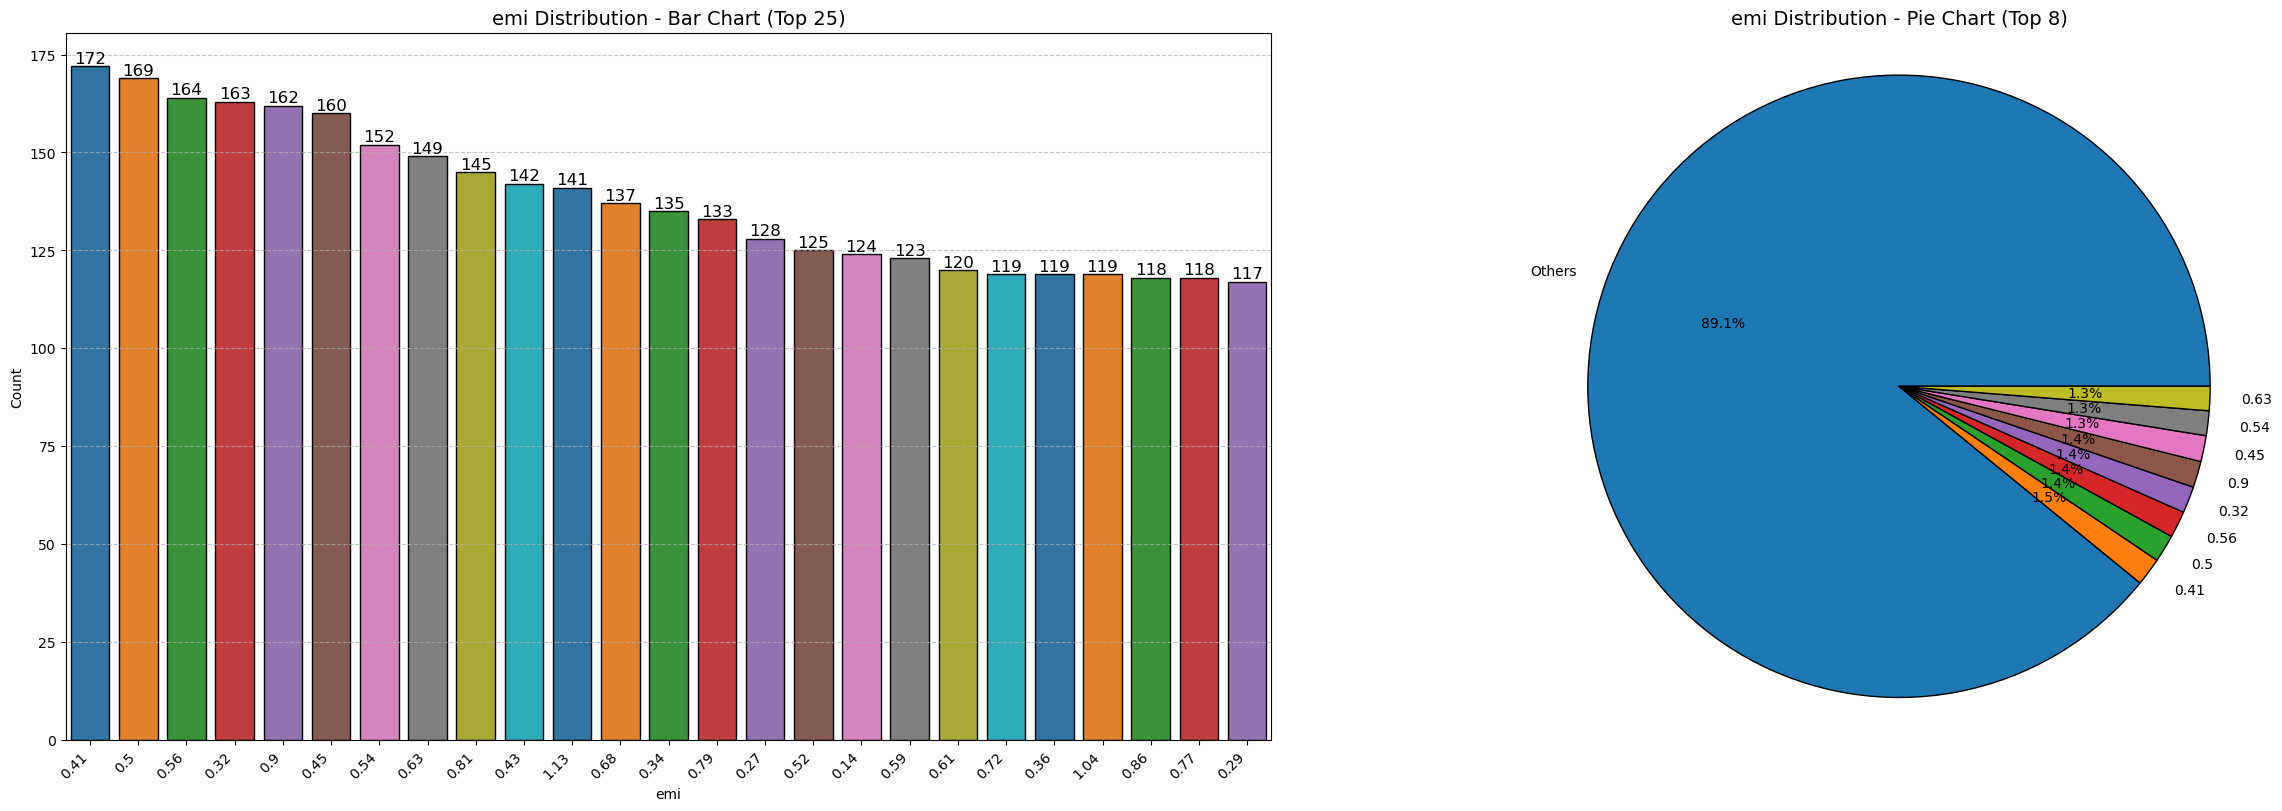

In [91]:
bar_pie_chart_plot(df, 'emi', bar_top_n=25, pie_top_n=8)

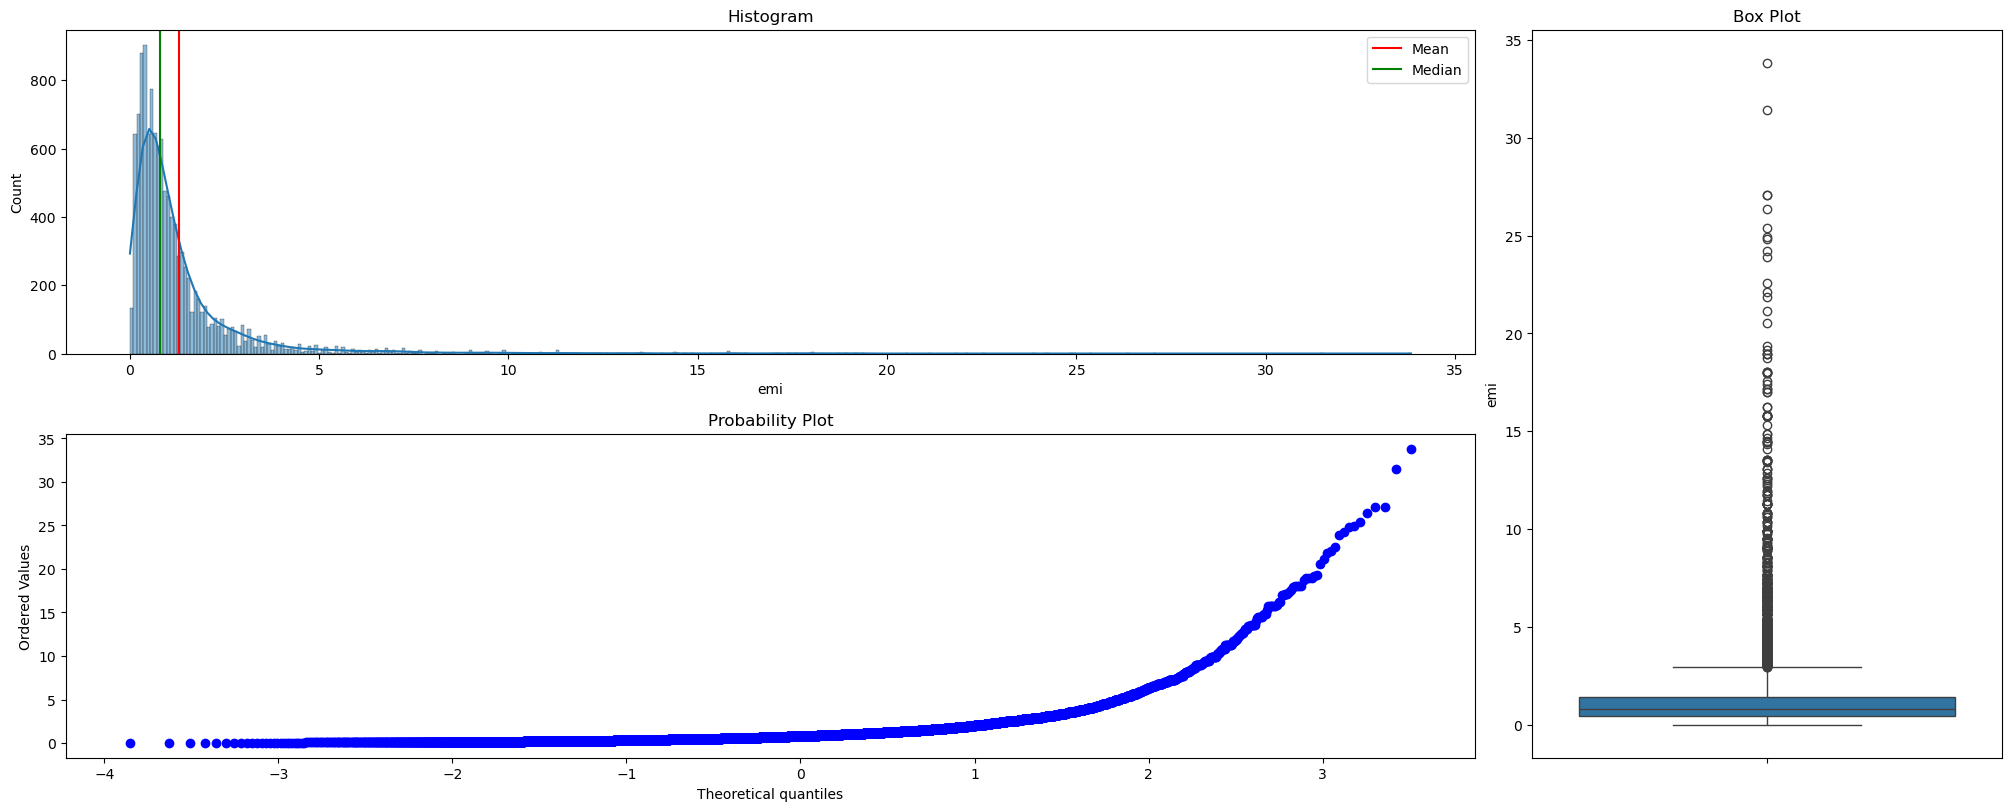

In [92]:
num_three_chart_plot(df, 'emi')

`observation`
- Most borrowers pay lower EMIs, likely below ₹2 lakh.
- The tail includes outliers, such as the maximum EMI of ₹36.08 lakh.
- A log transformation or outlier handling might be useful for further analysis.
- significant right skewness in the data.
- outliers are beyond the upper whisker, including extreme values like ₹36.08 lakh.
- The box (IQR) is narrow, indicating that the middle 50% of data points (25th to 75th percentile) are tightly packed between ₹0.43 lakh and ₹1.44 lakh.
- median EMI (₹0.80 lakh) lies closer to the lower quartile, reflecting the skewed distribution.

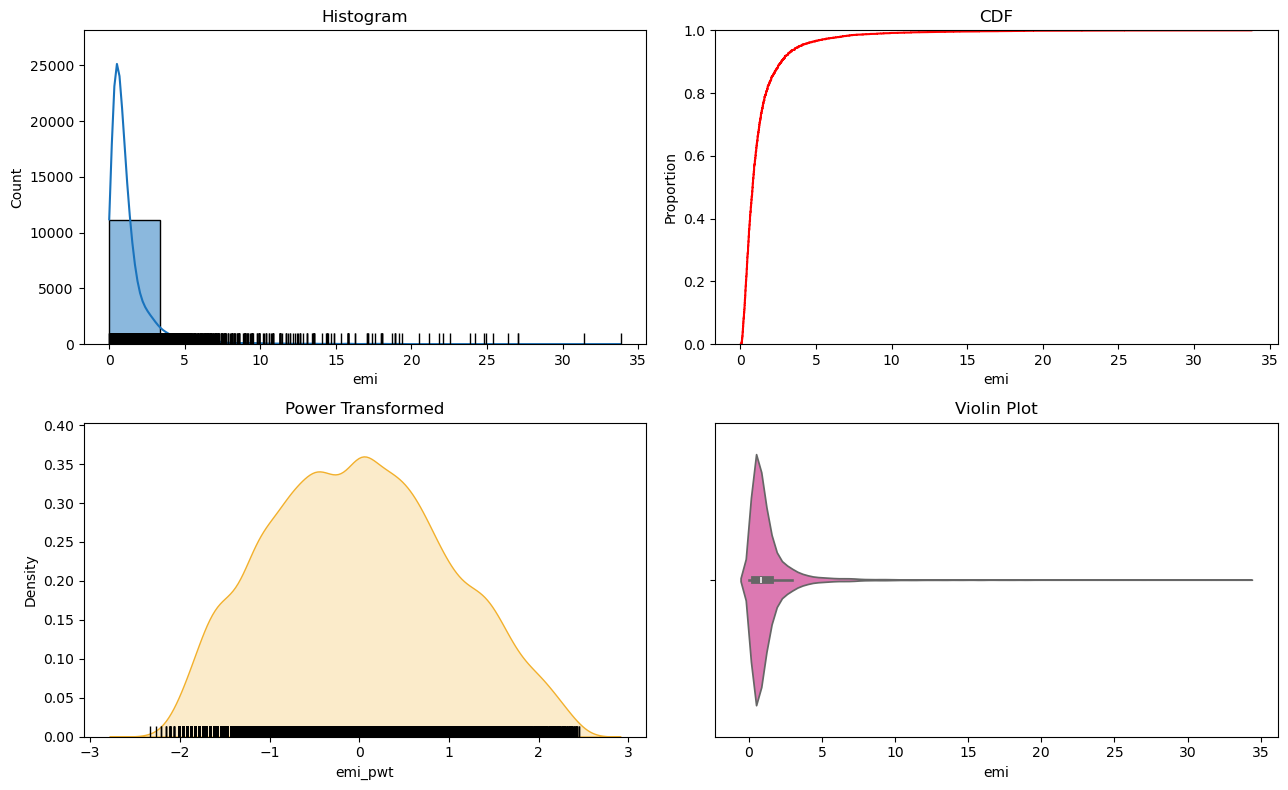

In [93]:
num_univar_plots(df, 'emi', bins=10)

In [94]:
num_summary(df,'emi')

--------------------------------------------------
Percentiles:


value
percentile          
0            0.00745
5            0.16000
10           0.24000
25           0.43000
50           0.80000
75           1.44000
90           2.71000
95           3.93300
99           9.32220
100         33.83000

--------------------------------------------------
Central Tendancy:


value
mean                1.307408
trimmed mean (5%)   1.031416
trimmed mean (10%)  0.947502
median              0.800000

--------------------------------------------------
Measure of Spread:


value
var            3.544499
std            1.882684
IQR            1.010000
lower_bound   -1.085000
upper_bound    2.955000
mad            0.440000
coef_variance  1.440013

--------------------------------------------------
Skewness and Kurtosis:


value
skewness   5.961962
kurtosis  55.283546

--------------------------------------------------
Hypothesis Testing for Normality:
Jarque-Bera Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 1578582.8141565789
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
--------------------------------------------------
Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 1423.422518390722
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


`observation` 
- Skewness (6.19): Highly right-skewed distribution with a long tail of high EMI values.
- Kurtosis (60.85): Leptokurtic distribution with a sharp peak and heavy tails, indicating many outliers.
- High CV (>0.5) → Data is highly spread out relative to the mean.  

## Distance columns

In [95]:
# Basic summary
distance_cols = [
    'education_mean_km', 'education_min_km', 'education_within_2km',
    'transport_mean_km', 'transport_min_km', 'transport_within_2km',
    'shopping_centre_mean_km', 'shopping_centre_min_km', 'shopping_centre_within_2km',
    'commercial_hub_mean_km', 'commercial_hub_min_km', 'commercial_hub_within_2km',
    'hospital_mean_km', 'hospital_min_km', 'hospital_within_2km',
    'tourist_mean_km', 'tourist_min_km', 'tourist_within_2km',
    'overall_min_mean_km', 'overall_avg_mean_km',
    'overall_min_min_km', 'overall_avg_min_km', 'total_within_2km'
]

In [96]:
# Split into categories
mean_cols = [col for col in distance_cols if 'mean_km' in col and 'overall' not in col] 
min_cols  = [col for col in distance_cols if 'min_km' in col and 'overall' not in col]
within_cols = [col for col in distance_cols if 'within_2km' in col or col == 'total_within_2km']
overall_cols = ['overall_min_mean_km', 'overall_avg_mean_km', 'overall_min_min_km', 'overall_avg_min_km']

print("Mean columns:", mean_cols)
print("Min columns:", min_cols)
print("Within 2km columns:", within_cols)
print('overall_cols:', overall_cols)

Mean columns: ['education_mean_km', 'transport_mean_km', 'shopping_centre_mean_km', 'commercial_hub_mean_km', 'hospital_mean_km', 'tourist_mean_km']
Min columns: ['education_min_km', 'transport_min_km', 'shopping_centre_min_km', 'commercial_hub_min_km', 'hospital_min_km', 'tourist_min_km']
Within 2km columns: ['education_within_2km', 'transport_within_2km', 'shopping_centre_within_2km', 'commercial_hub_within_2km', 'hospital_within_2km', 'tourist_within_2km', 'total_within_2km']
overall_cols: ['overall_min_mean_km', 'overall_avg_mean_km', 'overall_min_min_km', 'overall_avg_min_km']


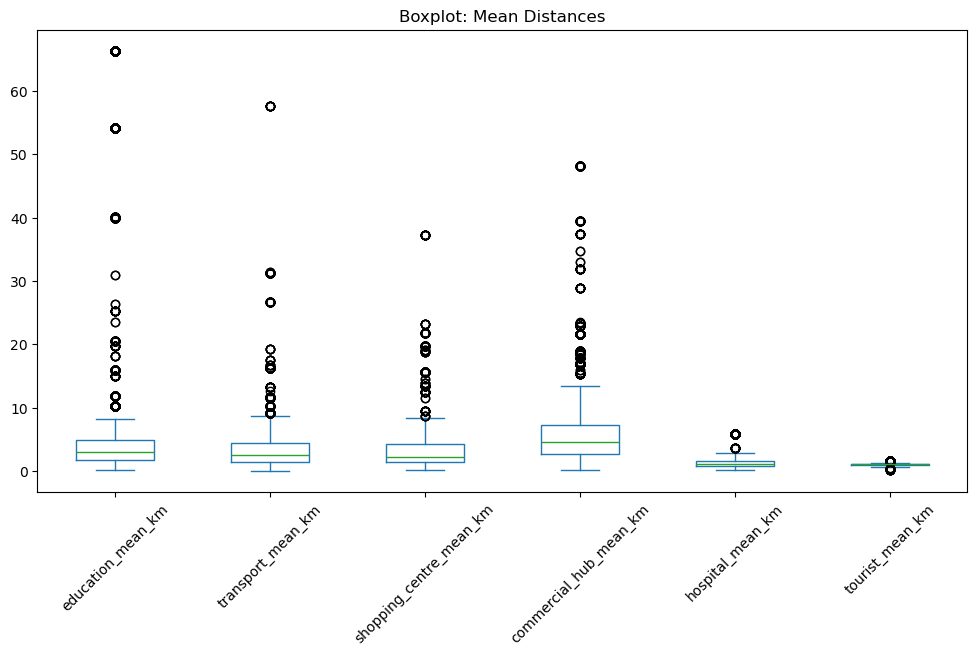

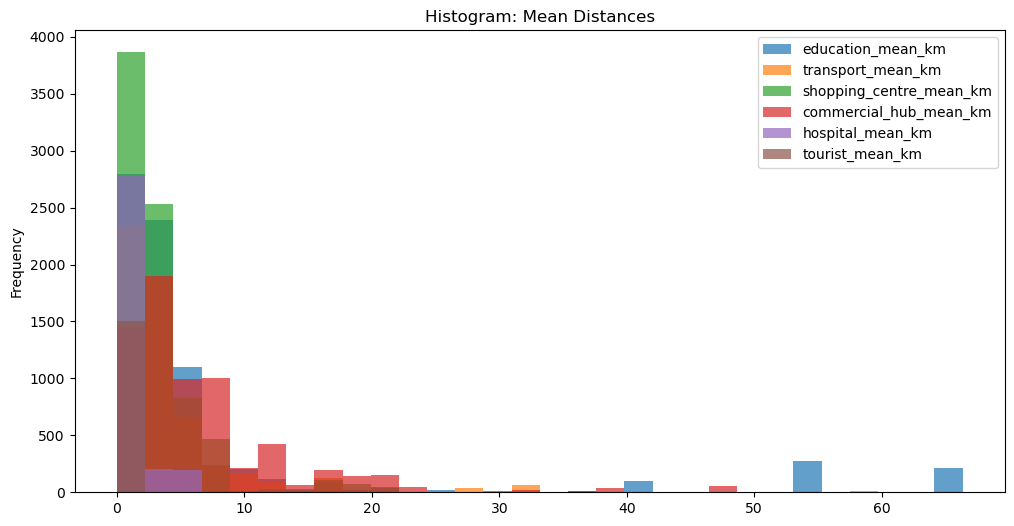

In [97]:
# 1) Summary
df[distance_cols].describe().transpose()

# 2) Check negatives
(df[distance_cols] < 0).sum()

df[mean_cols].plot(kind='box', figsize=(12, 6))
plt.title('Boxplot: Mean Distances')
plt.xticks(rotation=45)
plt.show()


# Or histogram for one group
df[mean_cols].plot(kind='hist', bins=30, alpha=0.7, figsize=(12, 6))
plt.title('Histogram: Mean Distances')
plt.show()


`observation`
- Schools more than 30 km away from a property in Mumbai, Palghar, Navi Mumbai, or Thane is not realistic.
- Outlier values will be imputed instead of dropping rows, using city and location columns for reference.

In [98]:
#print(df['id']) where df['education_mean_km']

df['education_mean_km'].isna().sum()

4242

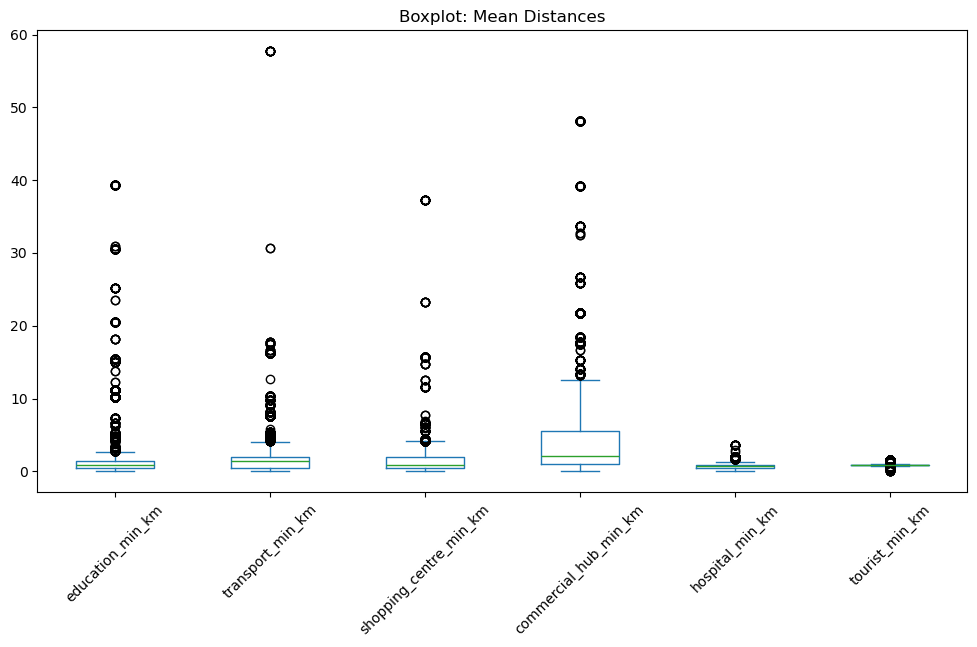

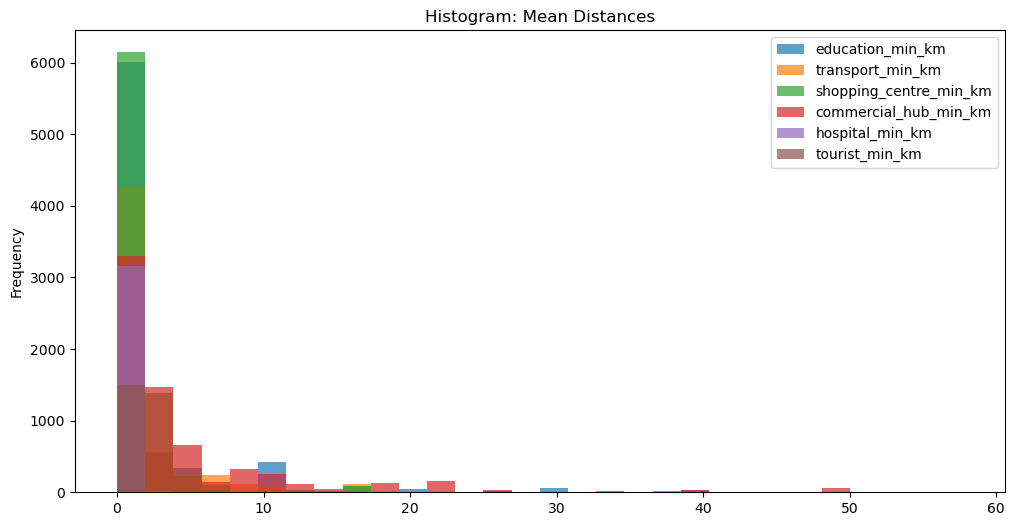

In [99]:
df[min_cols].plot(kind='box', figsize=(12, 6))
plt.title('Boxplot: Mean Distances')
plt.xticks(rotation=45)
plt.show()


# Or histogram for one group
df[min_cols].plot(kind='hist', bins=30, alpha=0.7, figsize=(12, 6))
plt.title('Histogram: Mean Distances')
plt.show()


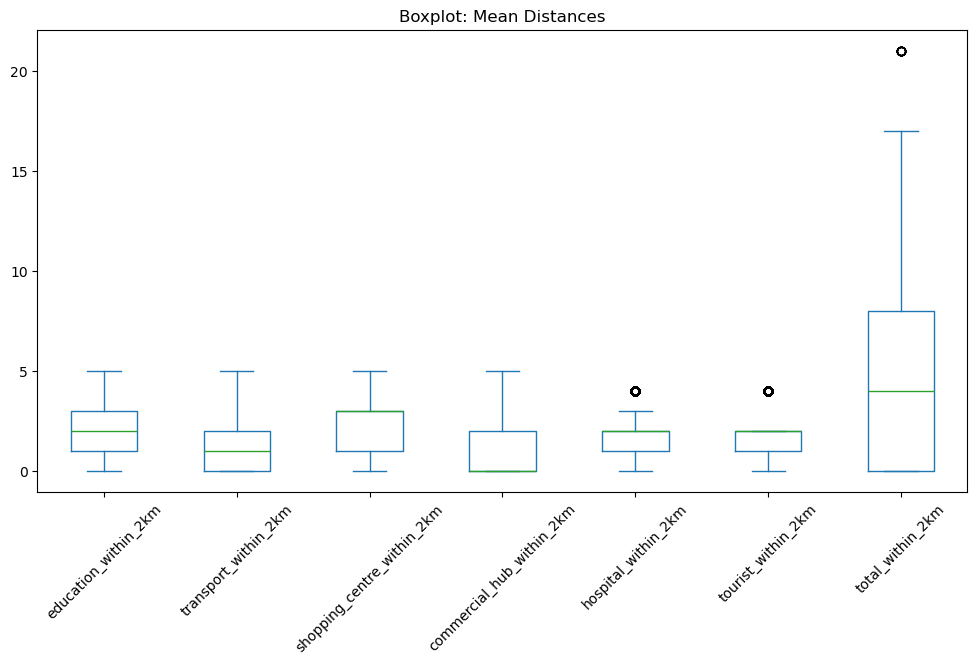

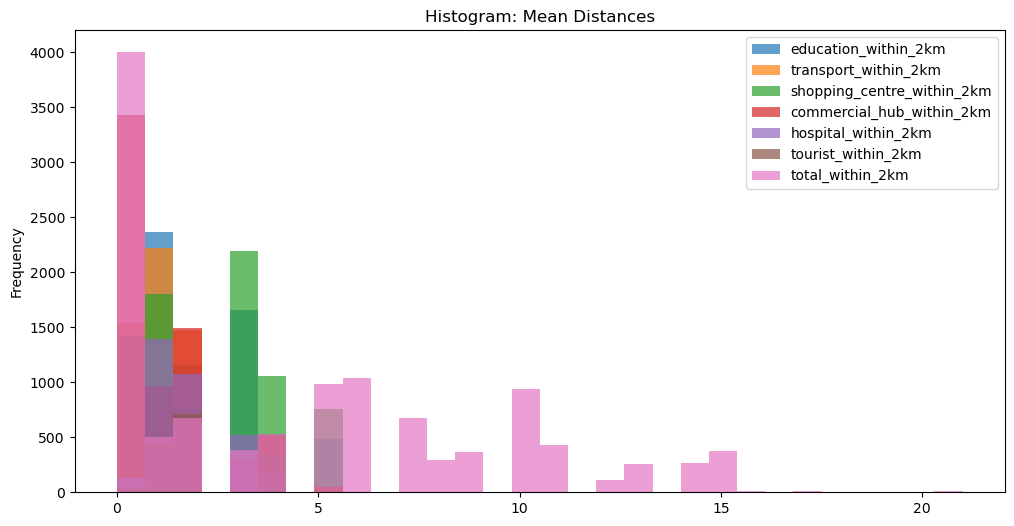

In [100]:
df[within_cols].plot(kind='box', figsize=(12, 6))
plt.title('Boxplot: Mean Distances')
plt.xticks(rotation=45)
plt.show()


# Or histogram for one group
df[within_cols].plot(kind='hist', bins=30, alpha=0.7, figsize=(12, 6))
plt.title('Histogram: Mean Distances')
plt.show()


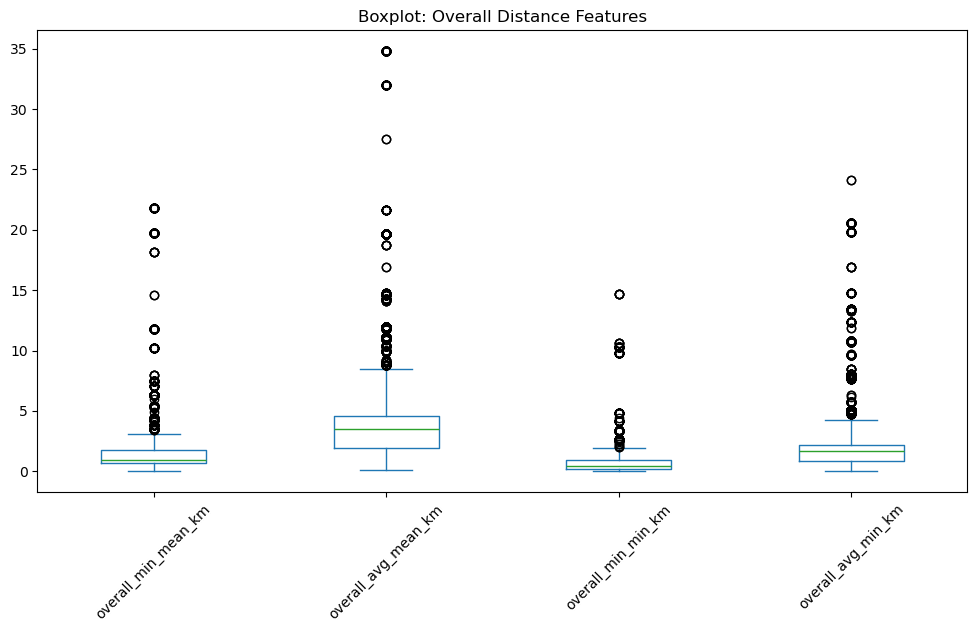

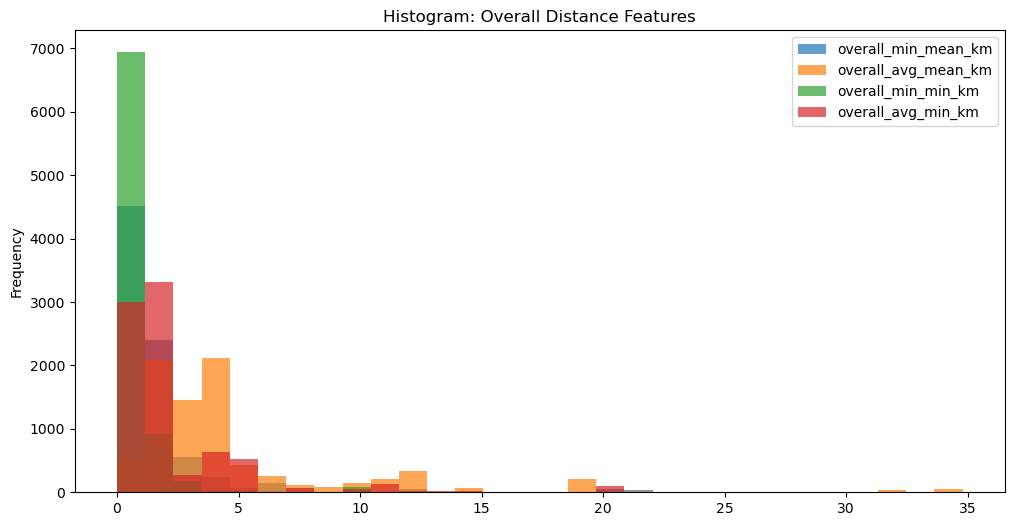

In [101]:
# Boxplot
df[overall_cols].plot(kind='box', figsize=(12, 6))
plt.title('Boxplot: Overall Distance Features')
plt.xticks(rotation=45)
plt.show()

# Histogram
df[overall_cols].plot(kind='hist', bins=30, alpha=0.7, figsize=(12, 6))
plt.title('Histogram: Overall Distance Features')
plt.show()



--- Summary Statistics for Distance Columns ---
                          count      mean        std       min       25%  \
education_mean_km        7615.0  7.778245  14.584922  0.100000  1.740000   
education_min_km         7615.0  2.384399   4.978229  0.100000  0.500000   
transport_mean_km        5624.0  3.872515   5.207154  0.000100  1.400000   
transport_min_km         5624.0  2.245767   3.827838  0.000100  0.400000   
shopping_centre_mean_km  7994.0  3.361921   3.605331  0.100000  1.400000   
shopping_centre_min_km   7994.0  1.473787   2.604857  0.000100  0.400000   
commercial_hub_mean_km   6736.0  6.854038   7.154563  0.100000  2.740000   
commercial_hub_min_km    6736.0  4.604604   6.947253  0.000100  1.000000   
hospital_mean_km         3186.0  1.409351   1.294693  0.166667  0.700000   
hospital_min_km          3186.0  0.765072   0.502975  0.000100  0.500000   
tourist_mean_km          1500.0  1.036600   0.285812  0.100000  0.900000   
tourist_min_km           1500.0  0.9418

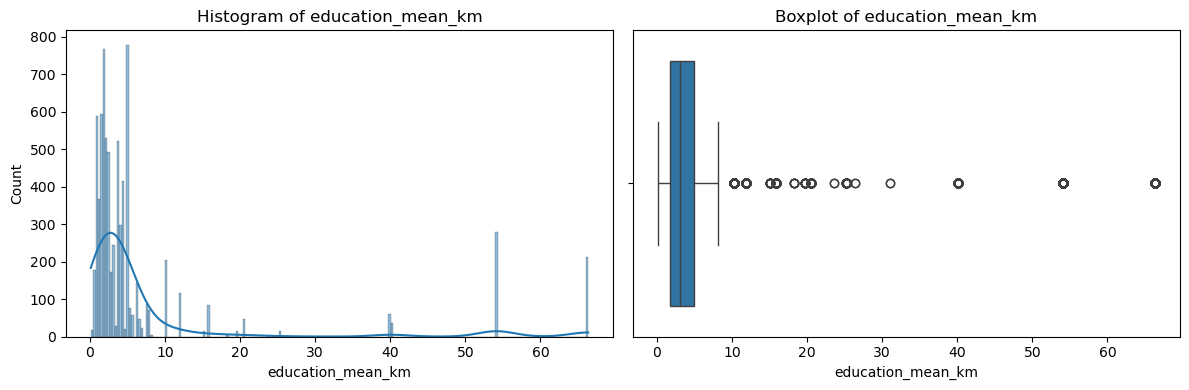

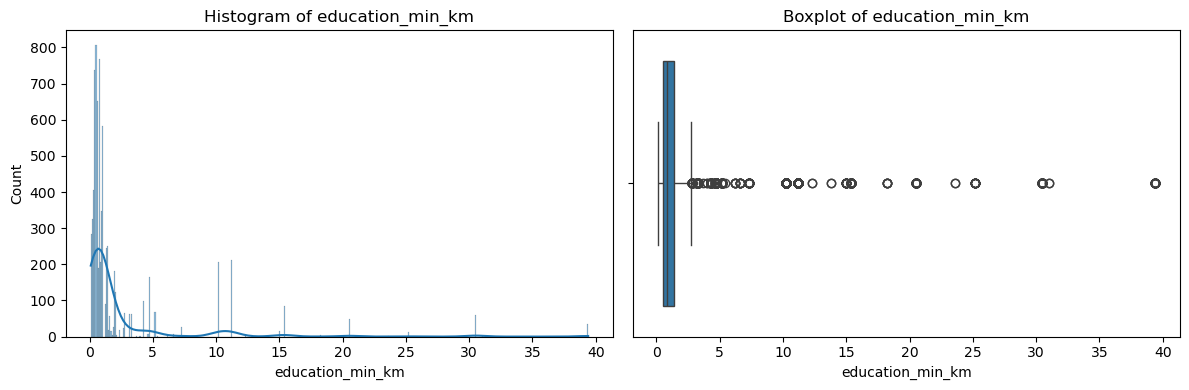

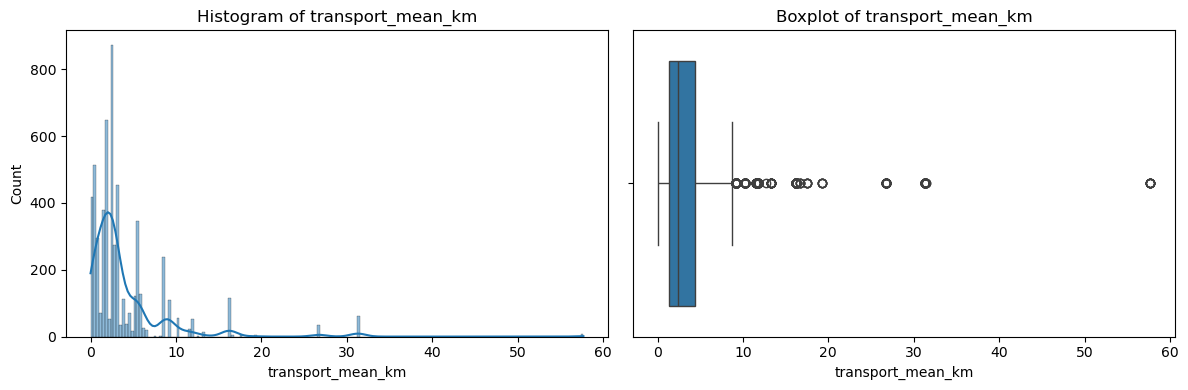

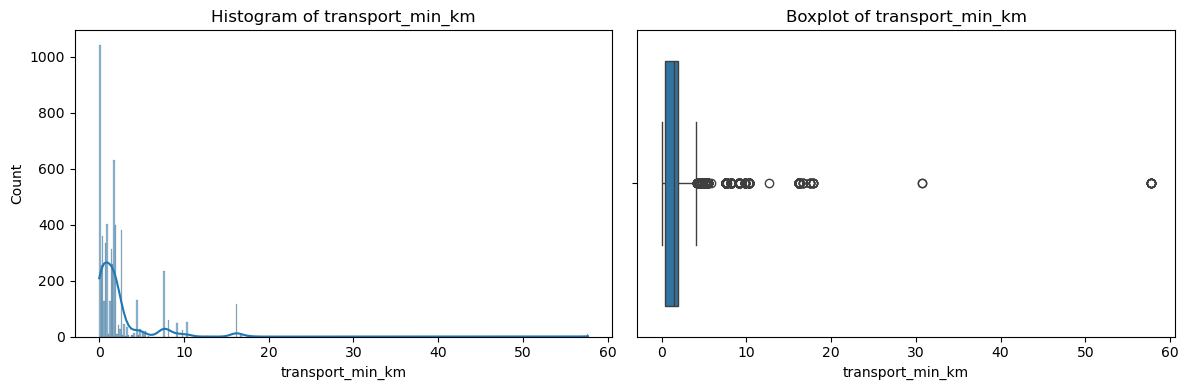

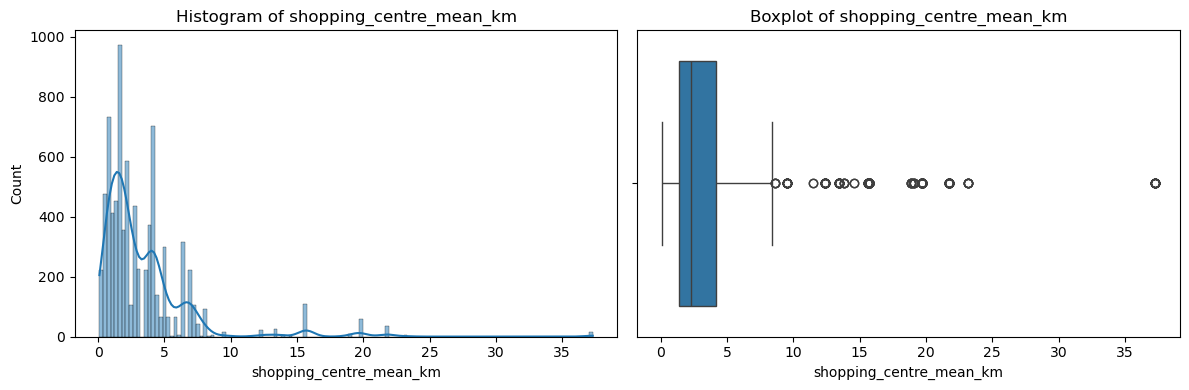

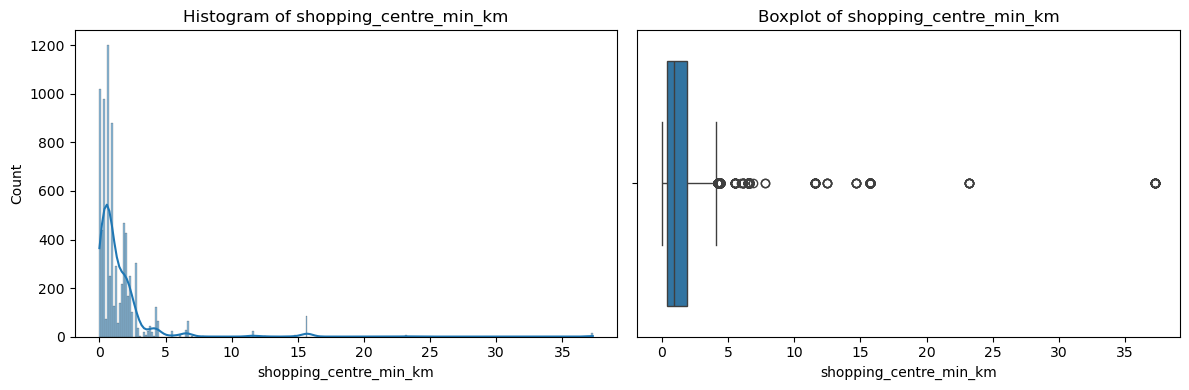

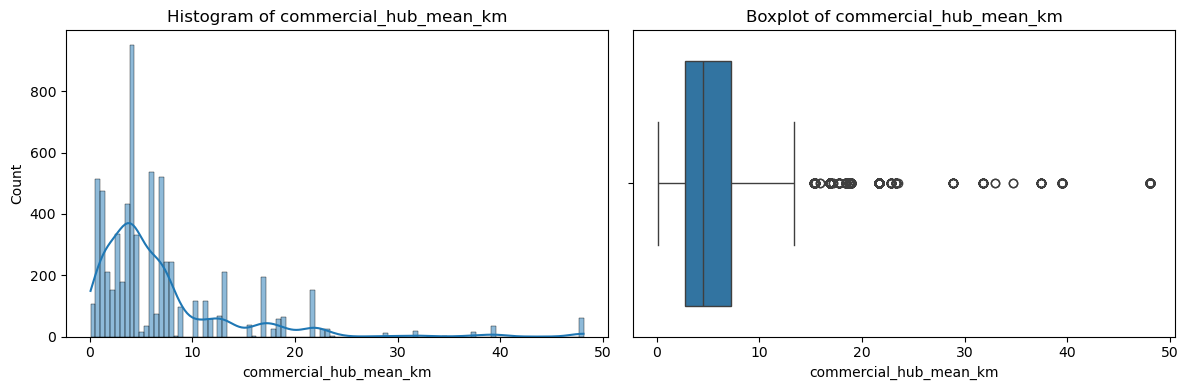

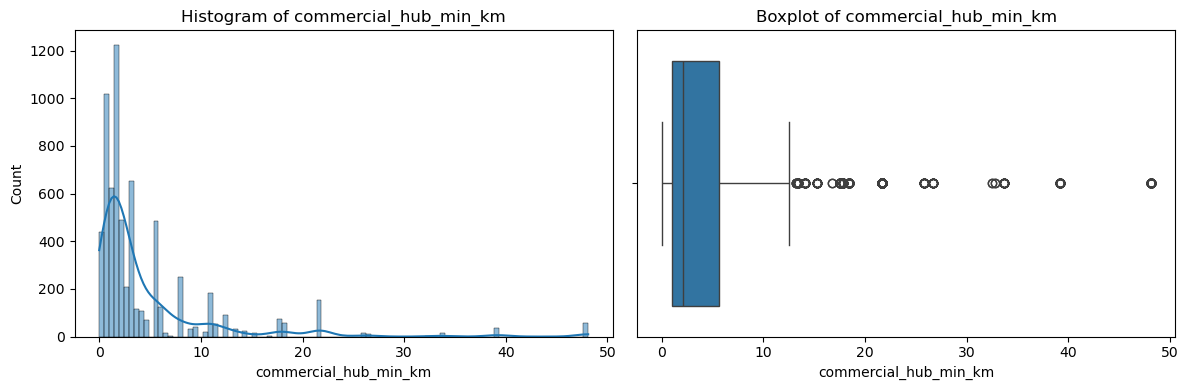

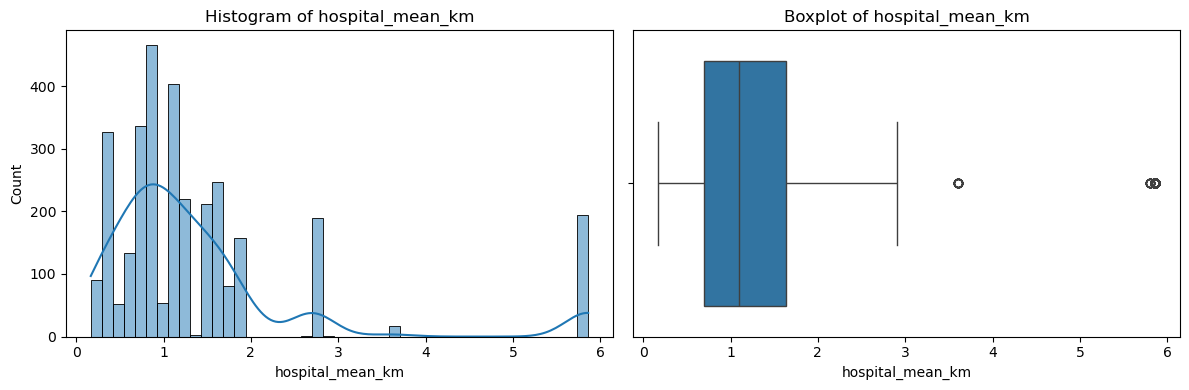

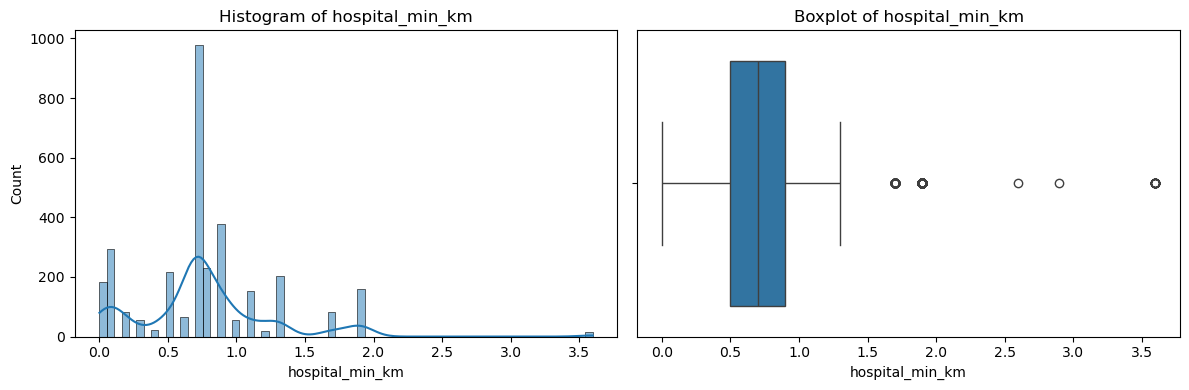

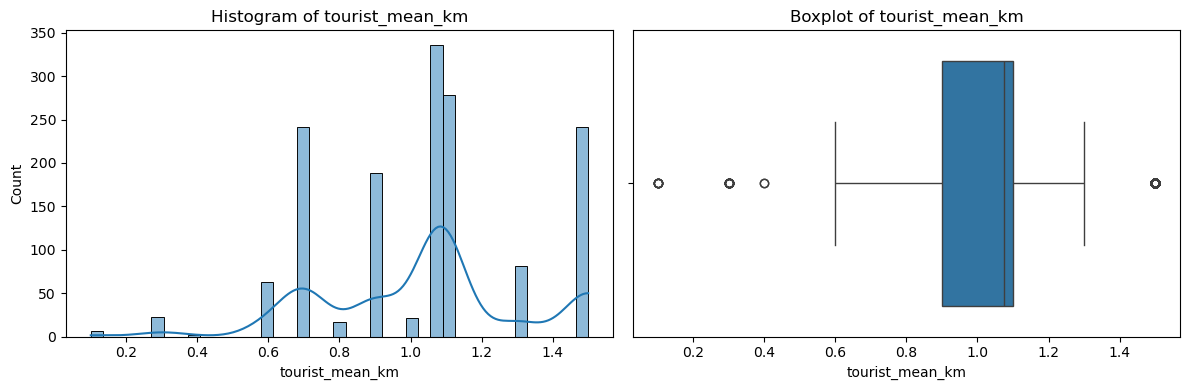

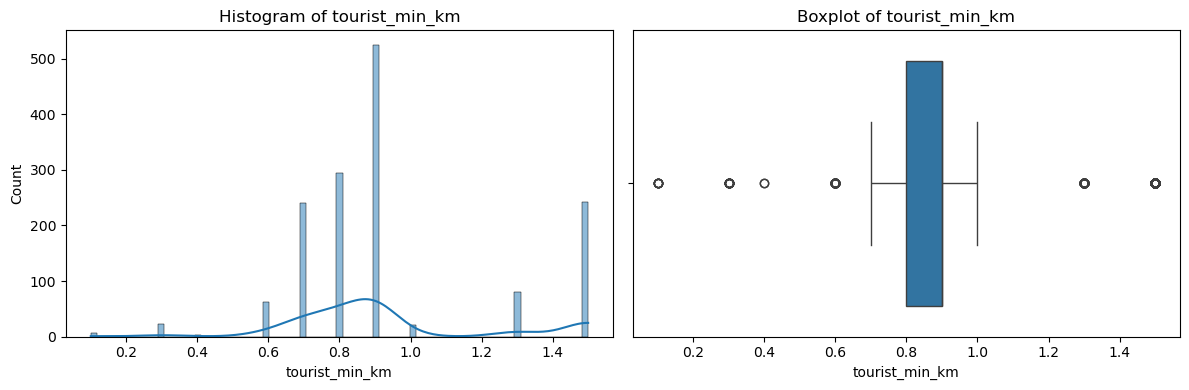

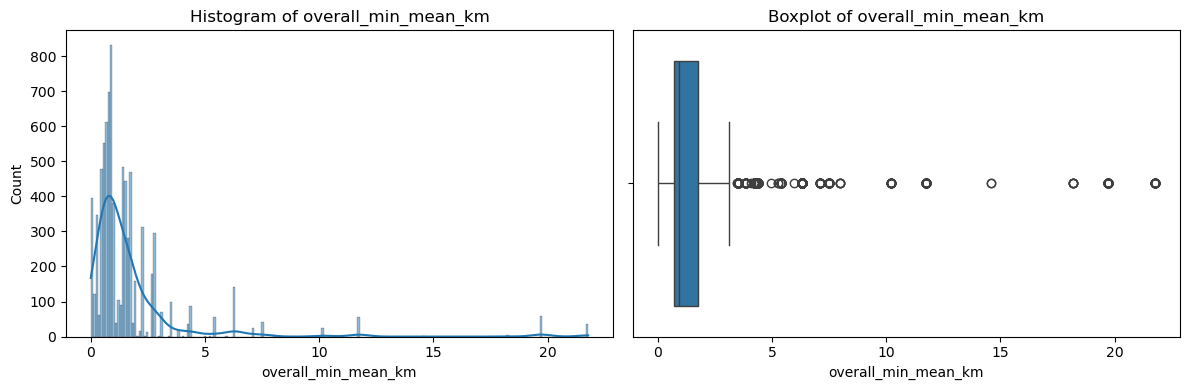

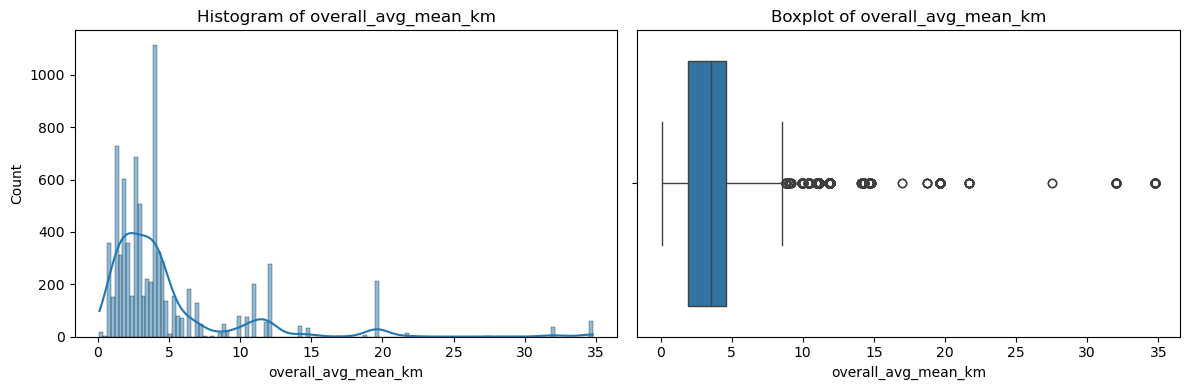

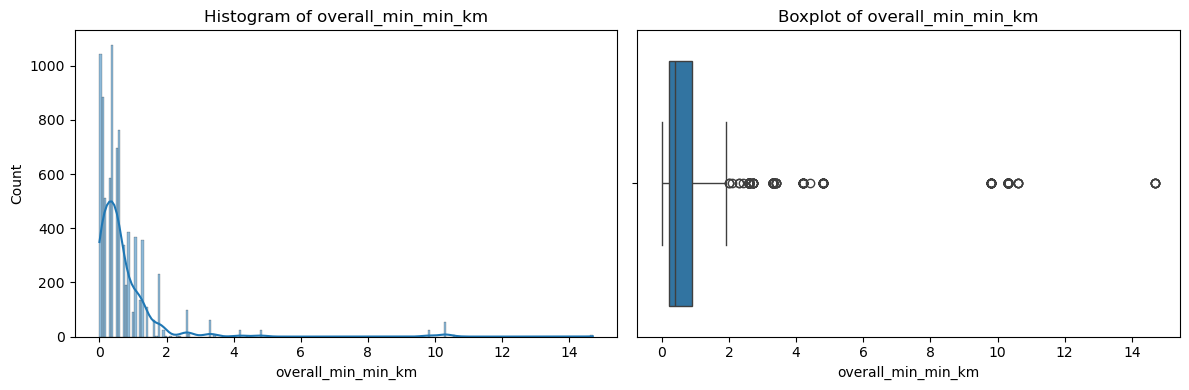

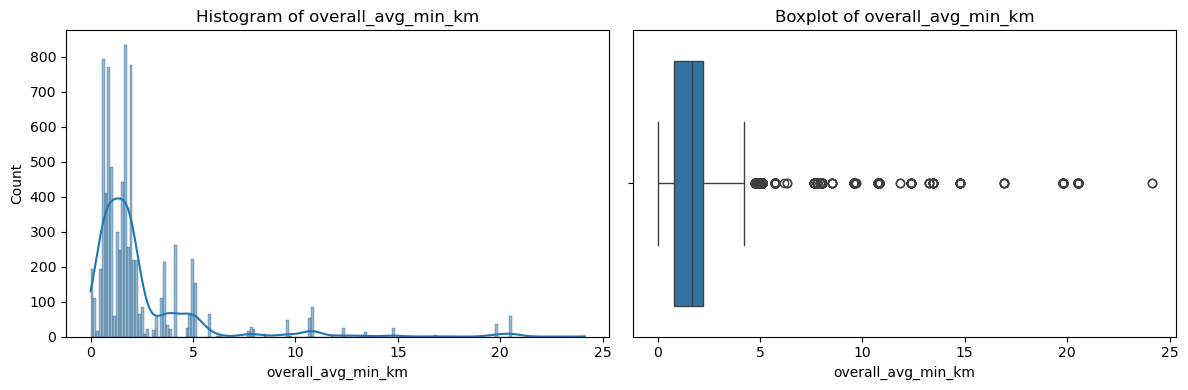


--- Value Counts for 'within_2km' Columns ---

education_within_2km
education_within_2km
NaN    4242
1.0    2367
3.0    1653
0.0    1427
2.0    1156
4.0     530
5.0     482
Name: count, dtype: int64


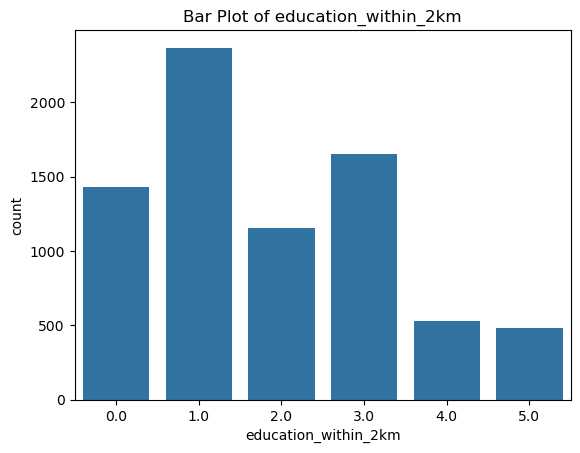


transport_within_2km
transport_within_2km
NaN    6055
1.0    2217
0.0    1539
2.0    1477
3.0     351
4.0     193
5.0      25
Name: count, dtype: int64


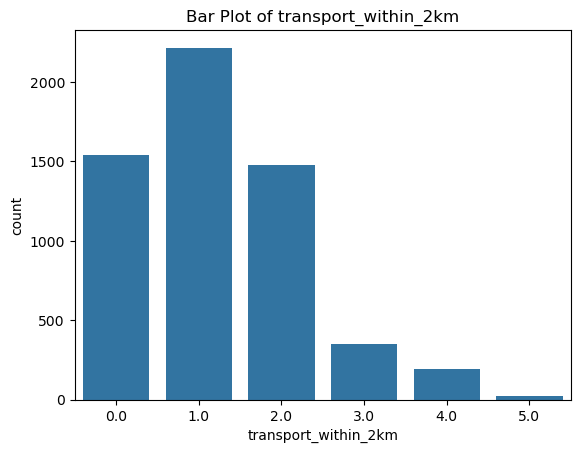


shopping_centre_within_2km
shopping_centre_within_2km
NaN    3863
3.0    2192
1.0    1806
0.0    1422
4.0    1056
2.0     760
5.0     758
Name: count, dtype: int64


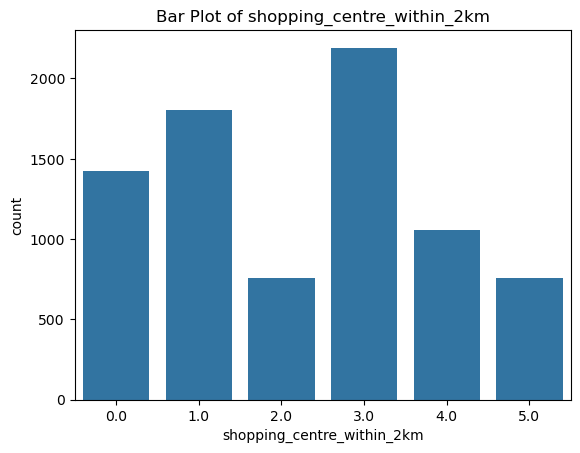


commercial_hub_within_2km
commercial_hub_within_2km
NaN    5116
0.0    3432
2.0    1490
1.0     962
4.0     518
3.0     293
5.0      46
Name: count, dtype: int64


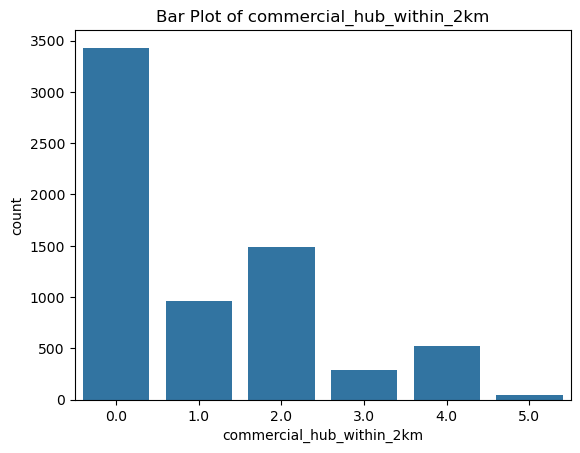


hospital_within_2km
hospital_within_2km
NaN    8564
1.0    1394
2.0    1074
3.0     516
4.0     183
0.0     126
Name: count, dtype: int64


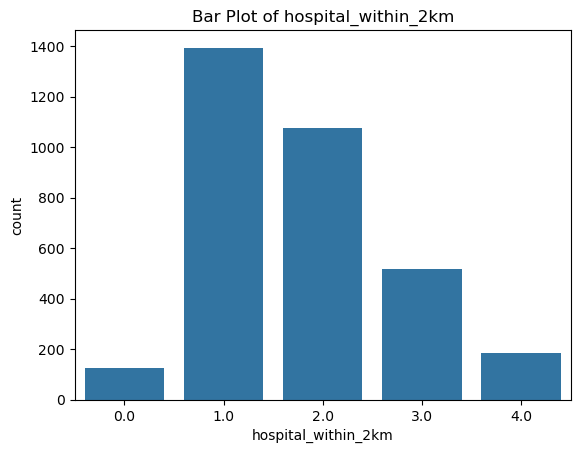


tourist_within_2km
tourist_within_2km
NaN    10306
2.0      711
1.0      453
4.0      336
0.0       51
Name: count, dtype: int64


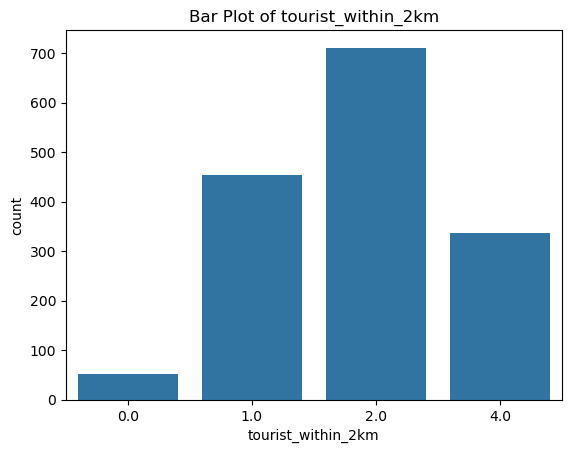


total_within_2km
total_within_2km
0.0     3998
6.0     1037
5.0      988
10.0     937
2.0      677
7.0      672
4.0      529
1.0      500
11.0     432
3.0      387
15.0     372
9.0      368
8.0      292
14.0     265
13.0     256
12.0     110
16.0      13
17.0      12
21.0      12
Name: count, dtype: int64


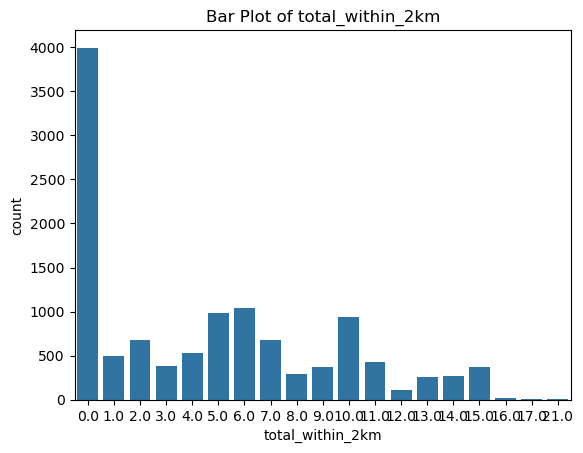

In [102]:
# Split columns
km_cols = [col for col in distance_cols if 'mean_km' in col or 'min_km' in col or 'overall' in col]
flag_cols = [col for col in distance_cols if 'within_2km' in col]

# Summary statistics for distance (numerical) columns
print("\n--- Summary Statistics for Distance Columns ---")
print(df[km_cols].describe().T)

# Skewness & kurtosis
print("\n--- Skewness & Kurtosis ---")
for col in km_cols:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    print(f"{col:30s} | Skew: {skew:.2f} | Kurtosis: {kurt:.2f}")

summary_zero_nan = pd.DataFrame({
    'Zero_Counts': (df[distance_cols] == 0).sum(),
    'NaN_Counts': df[distance_cols].isna().sum()
}).sort_values(by='Zero_Counts', ascending=False)

print("\n--- Zero KM and NaN Counts ---")
print(summary_zero_nan)

# Plot histograms and boxplots
for col in km_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# Binary/flag columns: value counts and bar plots
print("\n--- Value Counts for 'within_2km' Columns ---")
for col in flag_cols:
    print(f"\n{col}")
    print(df[col].value_counts(dropna=False))

    # Bar plot
    sns.countplot(x=df[col])
    plt.title(f"Bar Plot of {col}")
    plt.show()

`observation`
- except tourist column all other columns from `distance_col` are right skewed

# Univariate analysis on Categorical columns

In [103]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)
print("-" * 100)
print(f'Total categorical columns: {len(categorical_columns)}')

Index(['id', 'builder', 'project_name', 'location', 'city', 'property_type',
       'status', 'construction', 'ownership', 'furnish', 'overlooking',
       'facing', 'flooring', 'extra_rooms', 'price_category', 'seller'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Total categorical columns: 16


## builder

In [104]:
cat_summary(df, 'builder', top_n=10, threshold=90) 

--------------------------------------------------
Quick Glance:


0                 raymond realty
1                 paradise group
2    n rose developers pvt. ltd.
3                    avant group
4                        mj shah
Name: builder, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 1143 categories
Missing Data   : 4,255 rows (35.89 %)
Available Data : 7,602 / 11,857 rows
--------------------------------------------------
summary:


count          7602
unique         1143
top     lodha group
freq            466

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                          
lodha group           466        6.13         6.13
godrej properties     276        3.63         9.76
rustomjee             241        3.17        12.93
piramal realty        227        2.99        15.92
oberoi realty ltd.    199        2.62        18.54
hiranandani group     171        2.25        20.79
l&t realty            152        2.00        22.79
runwal group          143        1.88        24.67
kalpataru ltd.        138        1.82        26.49
dosti realty          128        1.68        28.17


10 Categories in 'builder' with cumulative percentage ≤ 90%:
['lodha group', 'godrej properties', 'rustomjee', 'piramal realty', 'oberoi realty ltd.', 'hiranandani group', 'l&t realty', 'runwal group', 'kalpataru ltd.', 'dosti realty']


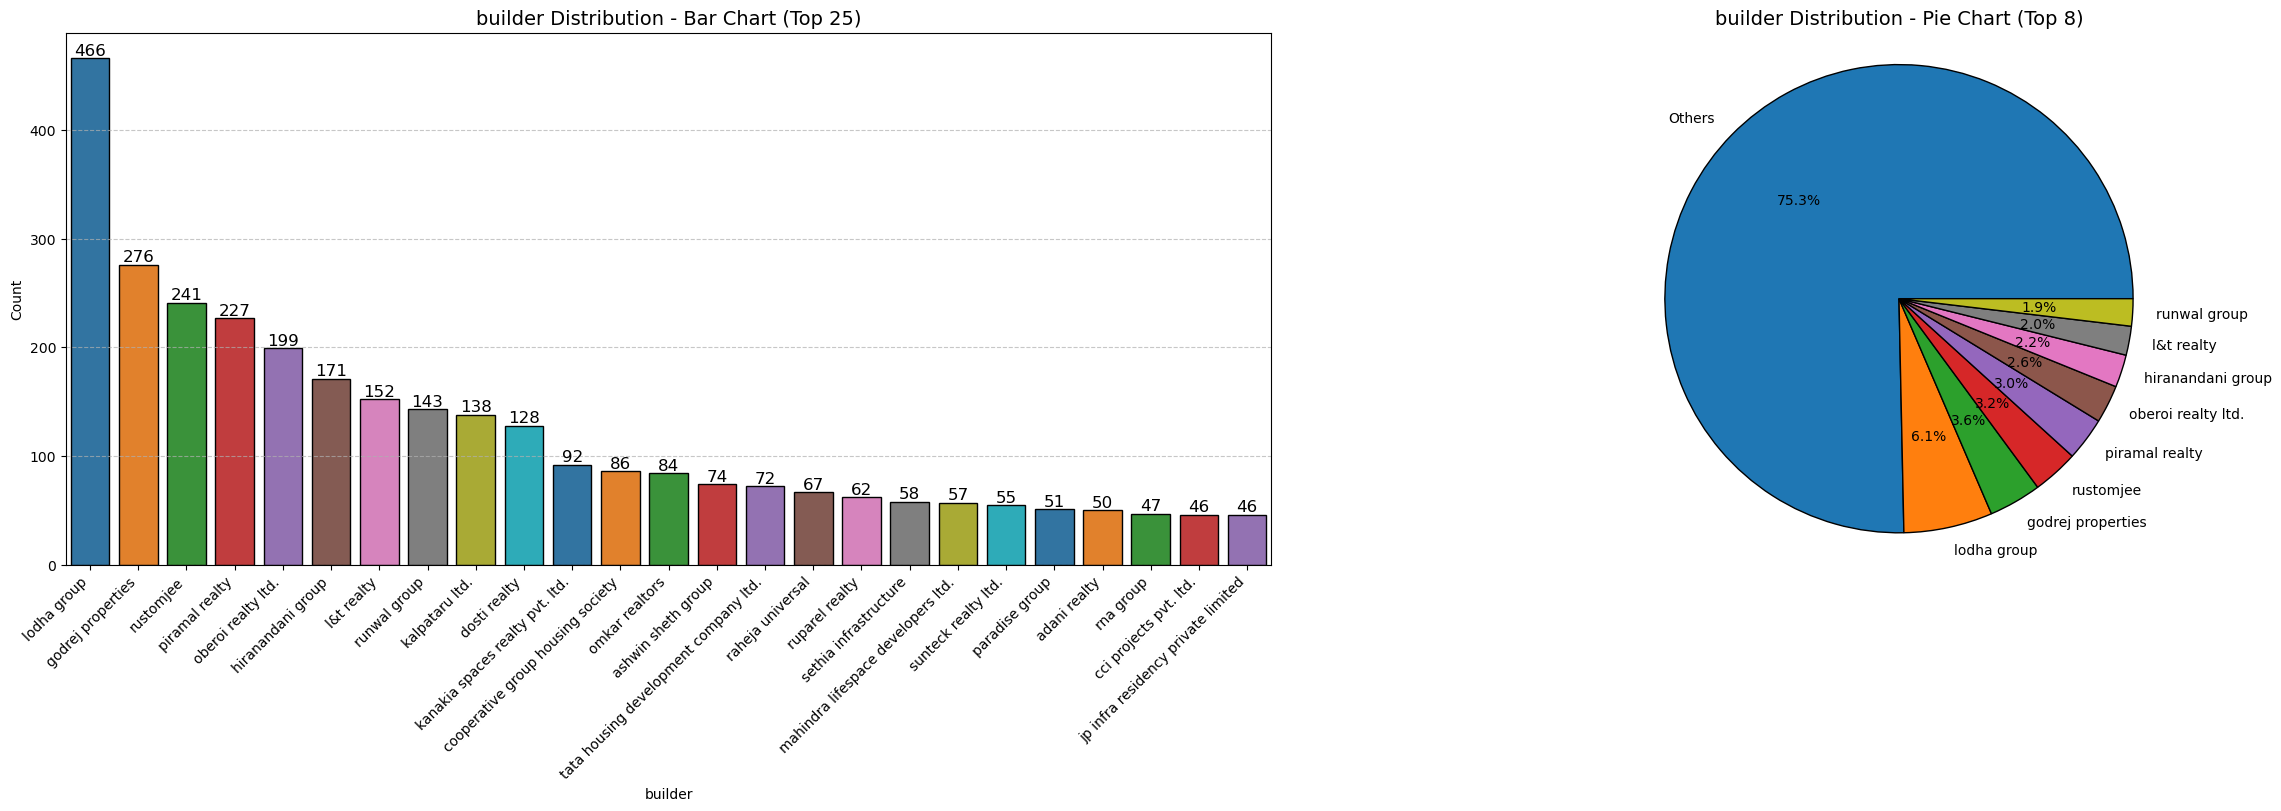

In [105]:
bar_pie_chart_plot(df, 'builder', bar_top_n=25, pie_top_n=8)

In [106]:
project_counts = df['builder'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "High (50-100)": int(((project_counts >= 50) & (project_counts <= 100)).sum()),
    "Average (10-49)": int(((project_counts >= 10) & (project_counts < 50)).sum()),
    "Low (2-9)": int(((project_counts > 1) & (project_counts < 10)).sum()),
    "Very Low (1)": int((project_counts == 1).sum())
}
frequency_bins

{'High (50-100)': 12,
 'Average (10-49)': 124,
 'Low (2-9)': 498,
 'Very Low (1)': 499}

`observation`
- High cardinality feature 
- total 1144 unique builders   
- The top 49 builders have 50 percent of the projects and the rest 50 percent of the properties come under the remaining 1097 builders
- while doing the train test split ensure that the train-test split maintains the same proportion of high-volume and low-volume projects to prevent bias during training and testing. i.e do statified sampling
  - High (50-100): 12 builders have done 50 to 100 projects 
  - Average (10-49): 124 builders have done 10 to 149 projects 
  - Low (2-9): 499 builders have done 2 to 9 projects 
  - Very Low (1): 501 builders have done only 1 project
- Total 4255 missing values 

## project_name

In [107]:
cat_summary(df, 'project_name', top_n=5, threshold=90)

--------------------------------------------------
Quick Glance:


0    tenx habitat raymond realty
1      paradise sai world empire
2                 northern hills
3               avant heritage v
4                      centrionx
Name: project_name, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 2935 categories
Missing Data   : 3,479 rows (29.34 %)
Available Data : 8,378 / 11,857 rows
--------------------------------------------------
summary:


count              8378
unique             2935
top     oberoi sky city
freq                 96

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                        
oberoi sky city      96        1.15         1.15
piramal vaikunth     90        1.07         2.22
tata serein          71        0.85         3.07
omkar alta monte     67        0.80         3.87
rustomjee crown      66        0.79         4.66


5 Categories in 'project_name' with cumulative percentage ≤ 90%:
['oberoi sky city', 'piramal vaikunth', 'tata serein', 'omkar alta monte', 'rustomjee crown']


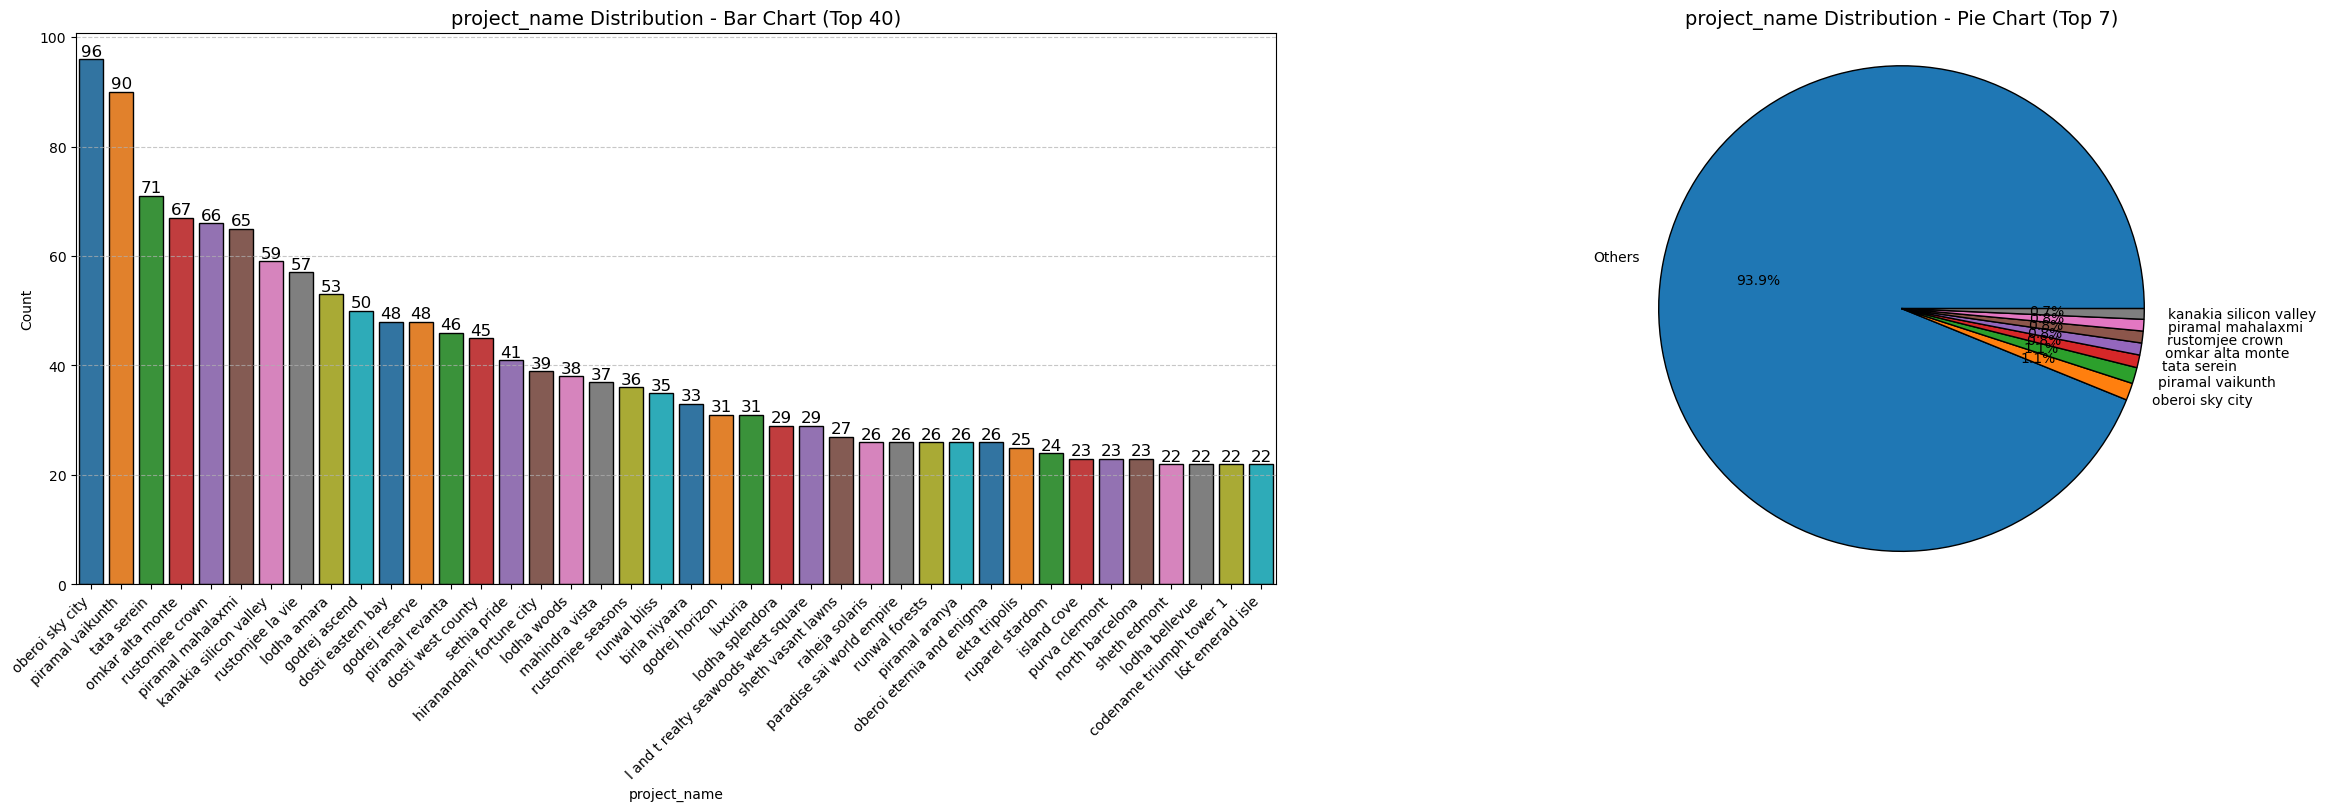

In [108]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'project_name', bar_top_n=40, pie_top_n=7)

creating categories for project_name 

In [109]:
society_counts = df['project_name'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "High (50-100)": int(((society_counts >= 50) & (society_counts <= 100)).sum()),
    "Average (10-49)": int(((society_counts >= 10) & (society_counts < 50)).sum()),
    "Low (2-9)": int(((society_counts > 1) & (society_counts < 10)).sum()),
    "Very Low (1)": int((society_counts == 1).sum())
}
frequency_bins

{'High (50-100)': 10,
 'Average (10-49)': 143,
 'Low (2-9)': 1007,
 'Very Low (1)': 1775}

`Observation`
- High cardinality feature 
- total 2937 unique project_name   
- The top 317 project_names have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 2626 project_names
- while doing the train test split ensure that the train-test split maintains the same proportion of high-volume and low-volume projects to prevent bias during training and testing. i.e do statified sampling
  - High (50-100): 10 societies have between 50 to 100 listings.
  - Average (10-49): 143 societies fall in this range with 10 to 49 listings each.
  - Low (2-9): 1007 societies have between 2 to 9 listings.
  - Very Low (1): A significant number, 1777 societies, have only 1 listing.
- Total 3479 missing values 

## location

In [110]:
cat_summary(df, 'location', top_n=13, threshold=90)

--------------------------------------------------
Quick Glance:


0       pokhran road
1           kharghar
2       dahisar east
3    jogeshwari east
4            govandi
Name: location, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 901 categories
Missing Data   : 481 rows (4.06 %)
Available Data : 11,376 / 11,857 rows
--------------------------------------------------
summary:


count         11376
unique          901
top     mulund west
freq            335

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                      
mulund west       335        2.94         2.94
andheri west      297        2.61         5.55
kandivali east    281        2.47         8.02
kharghar          263        2.31        10.33
powai             242        2.13        12.46
andheri east      241        2.12        14.58
malad west        241        2.12        16.70
chembur           235        2.07        18.77
panvel            228        2.00        20.77
goregaon west     225        1.98        22.75
kandivali west    207        1.82        24.57
borivali east     196        1.72        26.29
mira road east    187        1.64        27.93


13 Categories in 'location' with cumulative percentage ≤ 90%:
['mulund west', 'andheri west', 'kandivali east', 'kharghar', 'powai', 'andheri east', 'malad west', 'chembur', 'panvel', 'goregaon west', 'kandivali west', 'borivali east', 'mira road east']


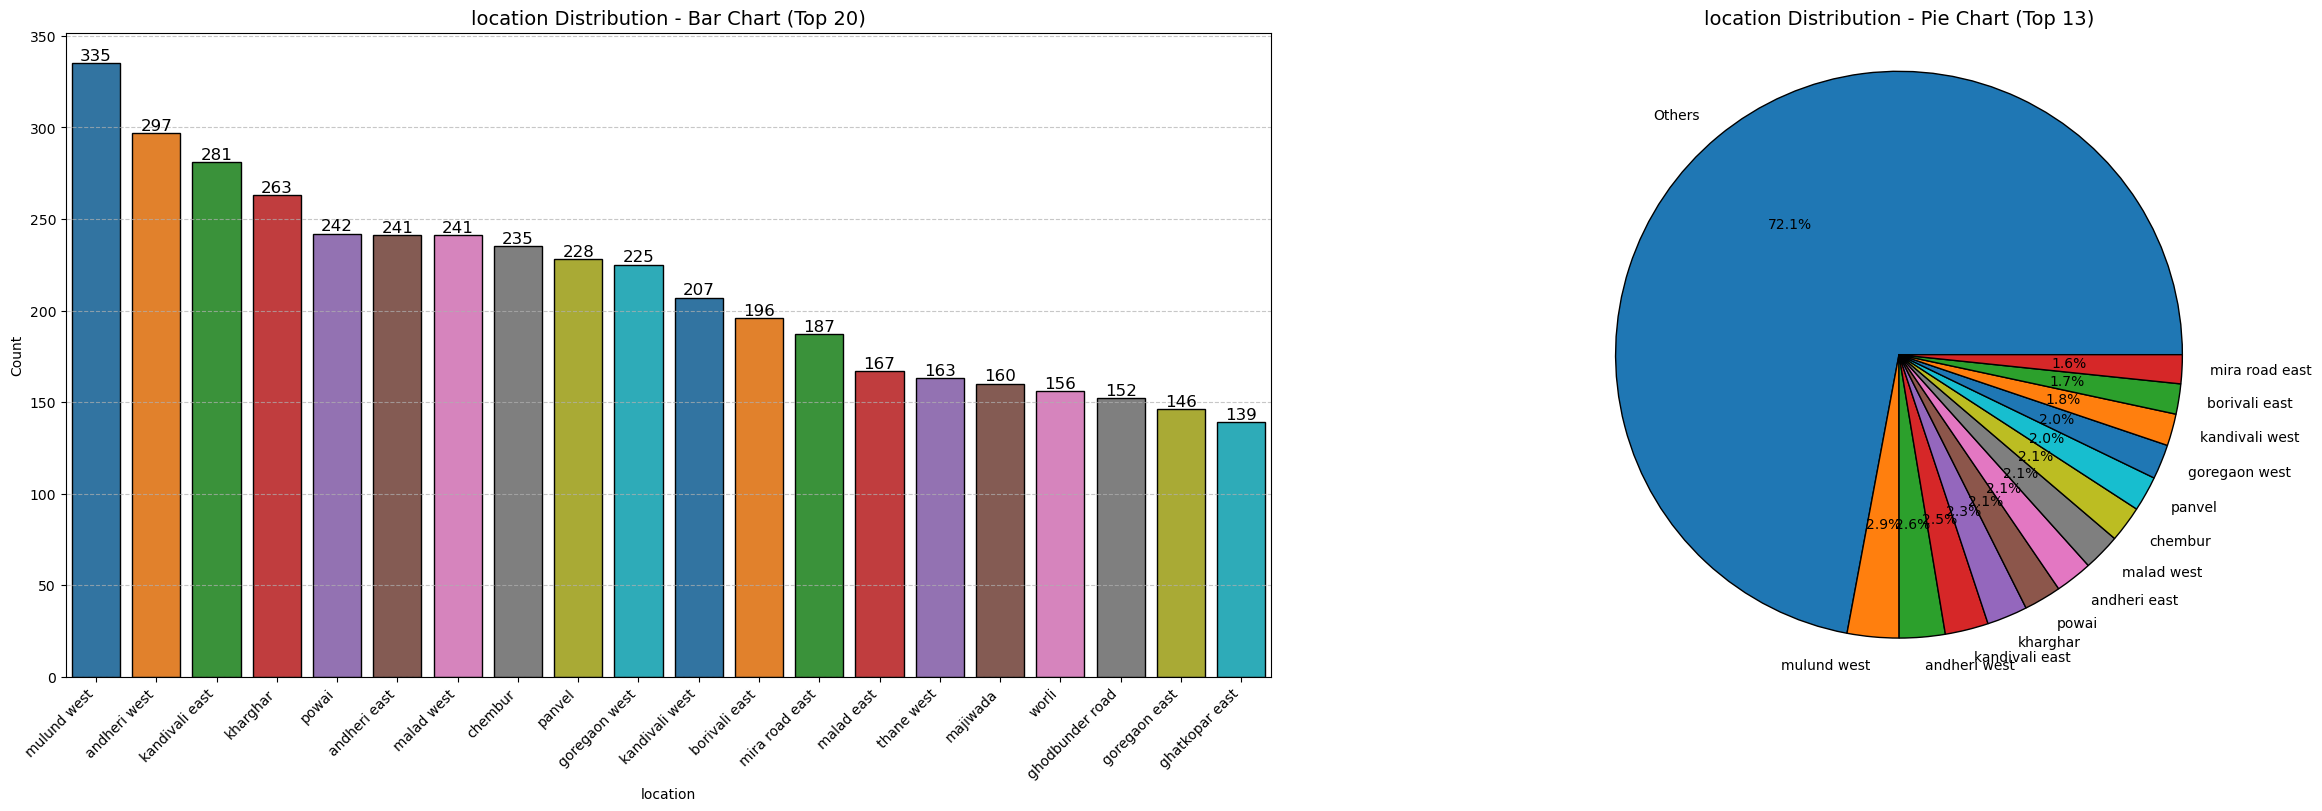

In [111]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'location', bar_top_n=20, pie_top_n=13)

## city

In [112]:
cat_summary(df, 'city', top_n=4, threshold=90)

--------------------------------------------------
Quick Glance:


0          thane
1    navi mumbai
2         mumbai
3         mumbai
4         mumbai
Name: city, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 11,857 / 11,857 rows
--------------------------------------------------
summary:


count    11857
unique       4
top     mumbai
freq      7543

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                
mumbai     7543       63.62        63.62
thane      2162       18.23        81.85


2 Categories in 'city' with cumulative percentage ≤ 90%:
['mumbai', 'thane']


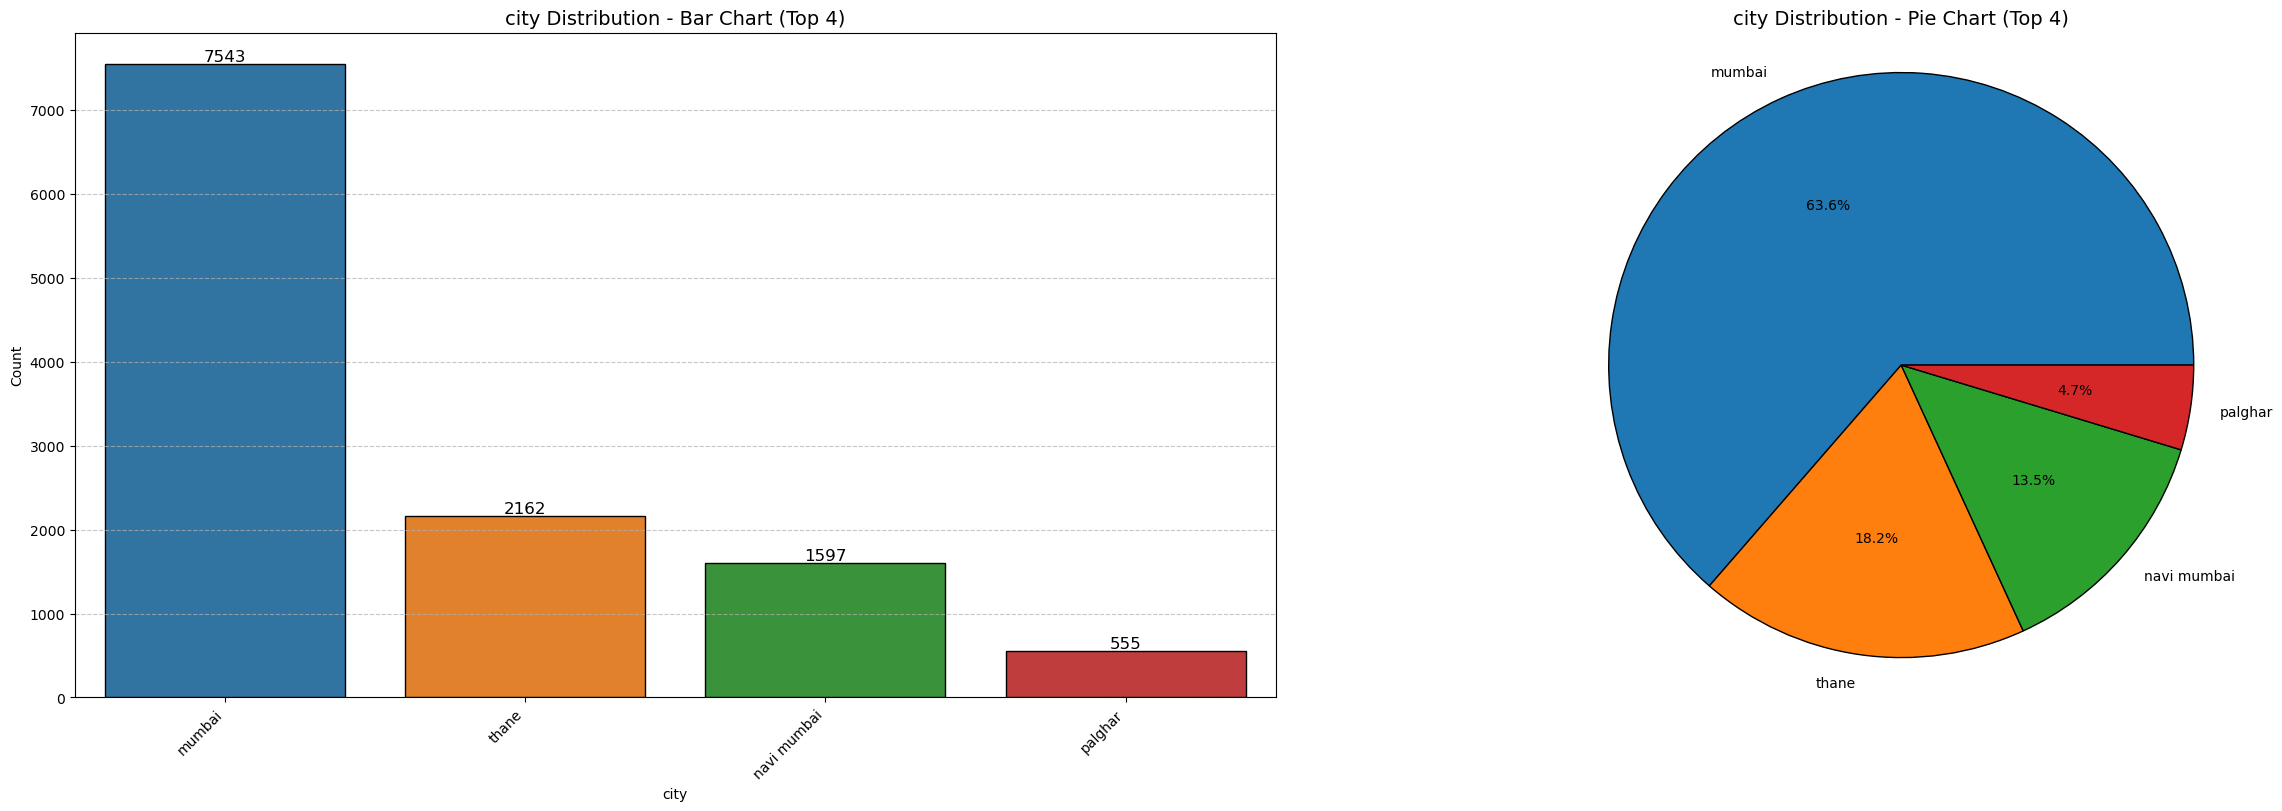

In [113]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'city', bar_top_n=4, pie_top_n=4)

`observation`
- most of the data is from mumbai region and it can create bias
- thane and navi mumbai almost have same properties in data
- very less number of properties for palghar region 

## property_type

In [114]:
cat_summary(df, 'property_type', top_n=2, threshold=90)

--------------------------------------------------
Quick Glance:


0    new property
1    new property
2    new property
3    new property
4    new property
Name: property_type, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 2 categories
Missing Data   : 2 rows (0.02 %)
Available Data : 11,855 / 11,857 rows
--------------------------------------------------
summary:


count    11855
unique       2
top     resale
freq      6702

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                
resale     6702       56.53        56.53


1 Categories in 'property_type' with cumulative percentage ≤ 90%:
['resale']


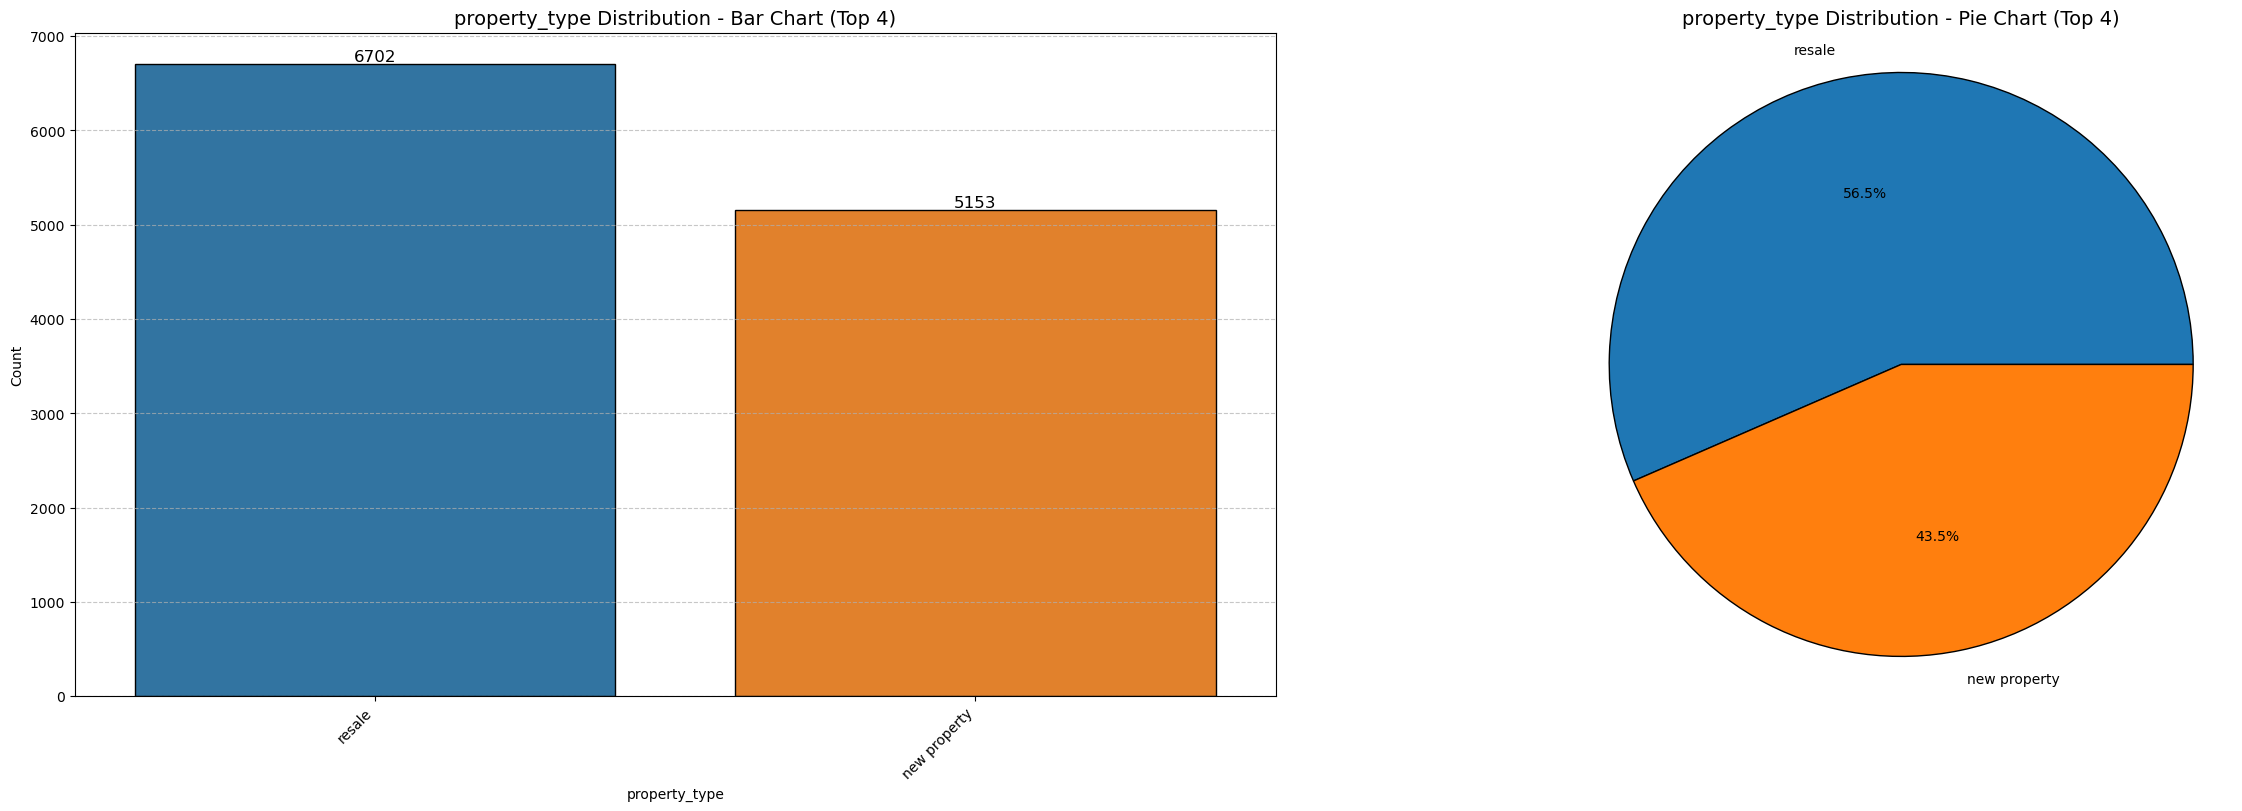

In [115]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'property_type', bar_top_n=4, pie_top_n=4)

`observation`  
- 2 missing values 
- 56.50% data is resale
- 43.5% data is new property

## status

In [116]:
cat_summary(df, 'status', top_n=3, threshold=90)

--------------------------------------------------
Quick Glance:


0    under construction
1    under construction
2    under construction
3    under construction
4    under construction
Name: status, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 3 categories
Missing Data   : 82 rows (0.69 %)
Available Data : 11,775 / 11,857 rows
--------------------------------------------------
summary:


count           11775
unique              3
top     ready to move
freq             7225

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                     
ready to move   7225       61.36        61.36


1 Categories in 'status' with cumulative percentage ≤ 90%:
['ready to move']


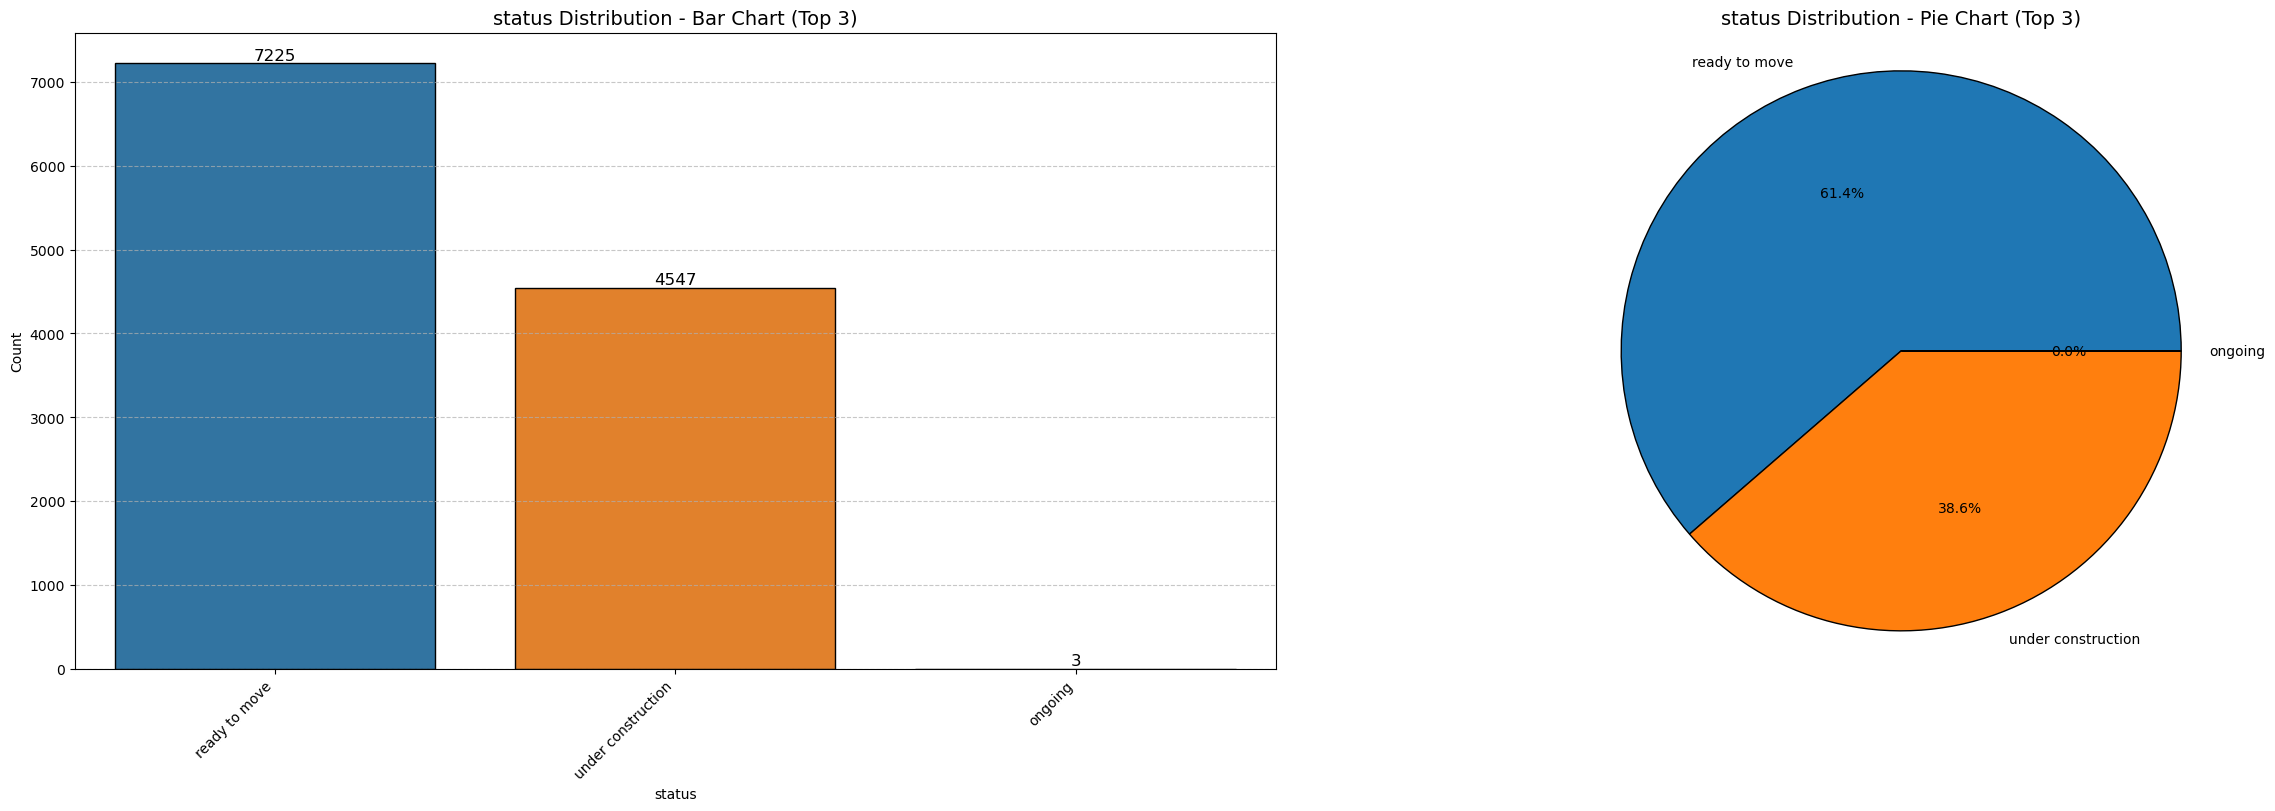

In [117]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'status', bar_top_n=3, pie_top_n=3)

`observation`
- 23 missing values
- 61.4% are ready to move properties
- 38.6% under construction properties
- 0.030 are ongoing,immediatly and nan properties 

## construction

In [118]:
cat_summary(df, 'construction', top_n=8, threshold=100)  

--------------------------------------------------
Quick Glance:


0    under construction
1    under construction
2    under construction
3    under construction
4    under construction
Name: construction, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 7 categories
Missing Data   : 1,048 rows (8.84 %)
Available Data : 10,809 / 11,857 rows
--------------------------------------------------
summary:


count                10809
unique                   7
top     under construction
freq                  4547

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                          
under construction   4547       42.07        42.07
less than 5 years    1504       13.91        55.98
new construction     1464       13.54        69.52
5 to 10 years        1400       12.95        82.47
10 to 15 years        942        8.71        91.18
above 20 years        494        4.57        95.75
15 to 20 years        458        4.24        99.99


7 Categories in 'construction' with cumulative percentage ≤ 100%:
['under construction', 'less than 5 years', 'new construction', '5 to 10 years', '10 to 15 years', 'above 20 years', '15 to 20 years']


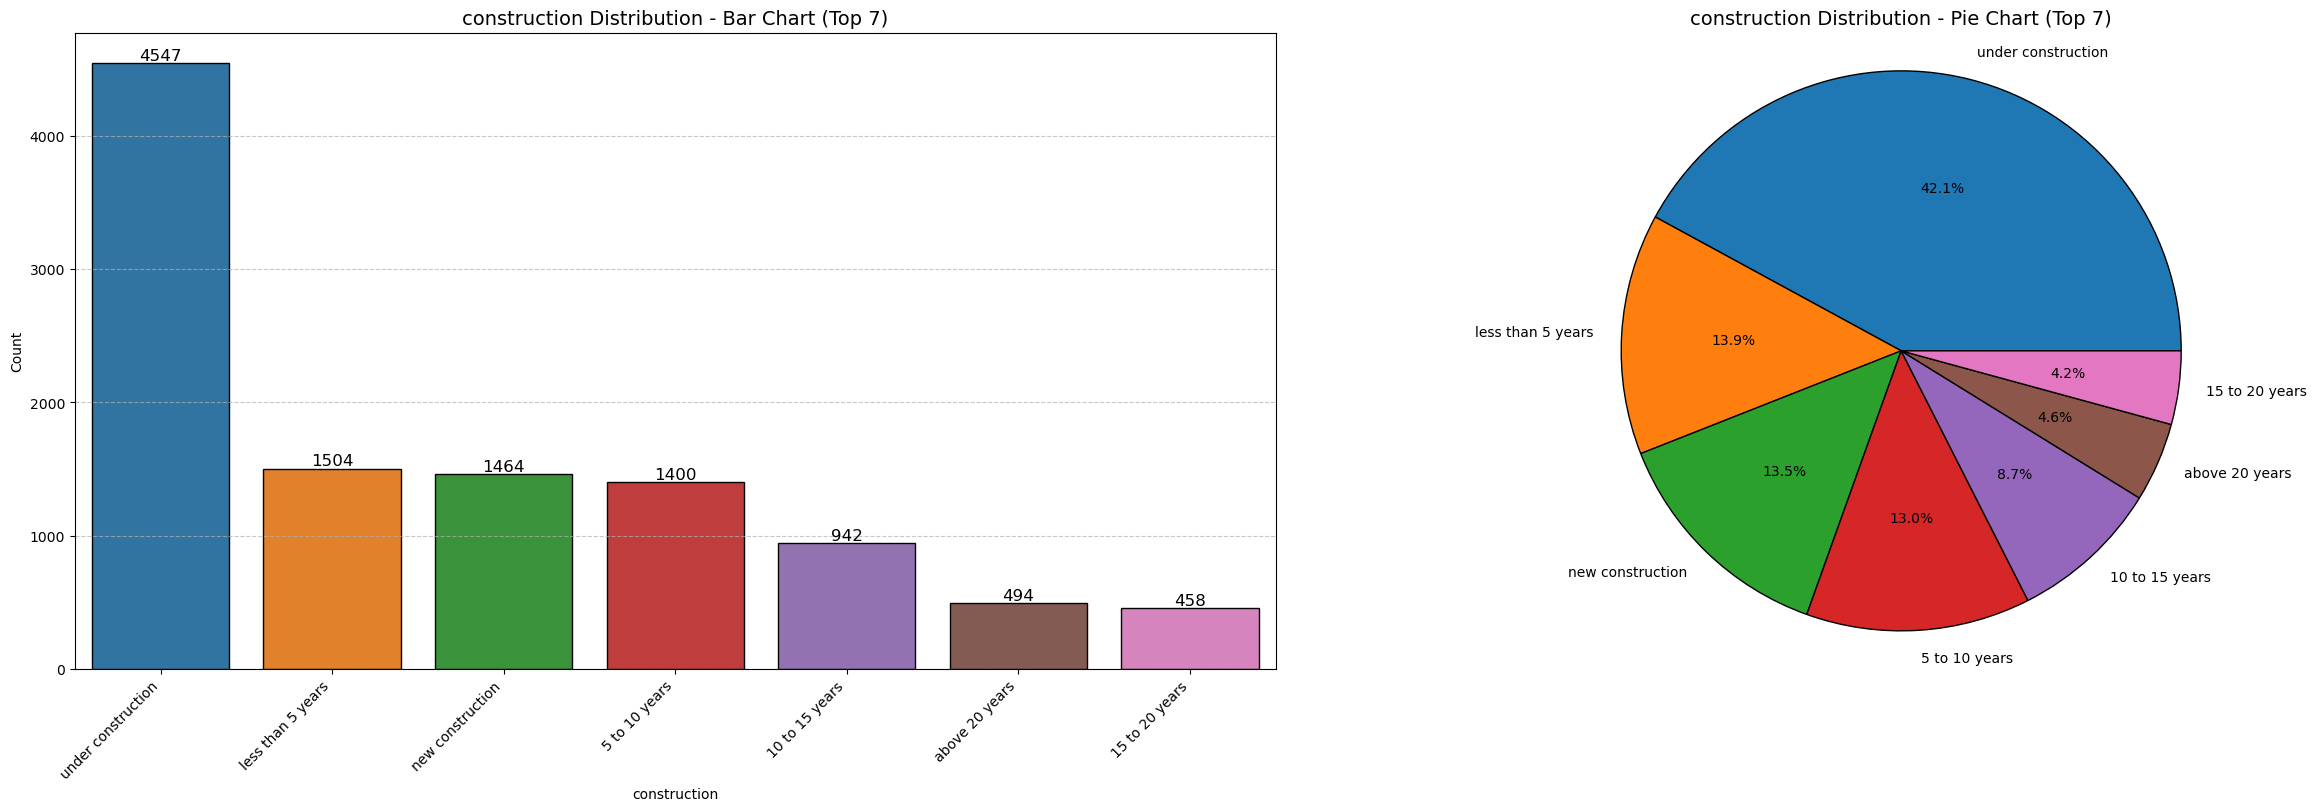

In [119]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'construction', bar_top_n=7, pie_top_n=7)

`observation` 
- 1048 missing values
- 3295 properties are older more than 5 years
- 1504 properties are less than 5 years old
- 4547 are under construction properties
- 1465 are new construction properties
- 42.1% properties are under construction and all other are completed properties
- make above 10 years as separate category 

## ownership

In [120]:
cat_summary(df, 'ownership', top_n=4, threshold=90)

--------------------------------------------------
Quick Glance:


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ownership, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 4 categories
Missing Data   : 3,590 rows (30.28 %)
Available Data : 8,267 / 11,857 rows
--------------------------------------------------
summary:


count       8267
unique         4
top     freehold
freq        5906

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                
freehold   5906       71.44        71.44


1 Categories in 'ownership' with cumulative percentage ≤ 90%:
['freehold']


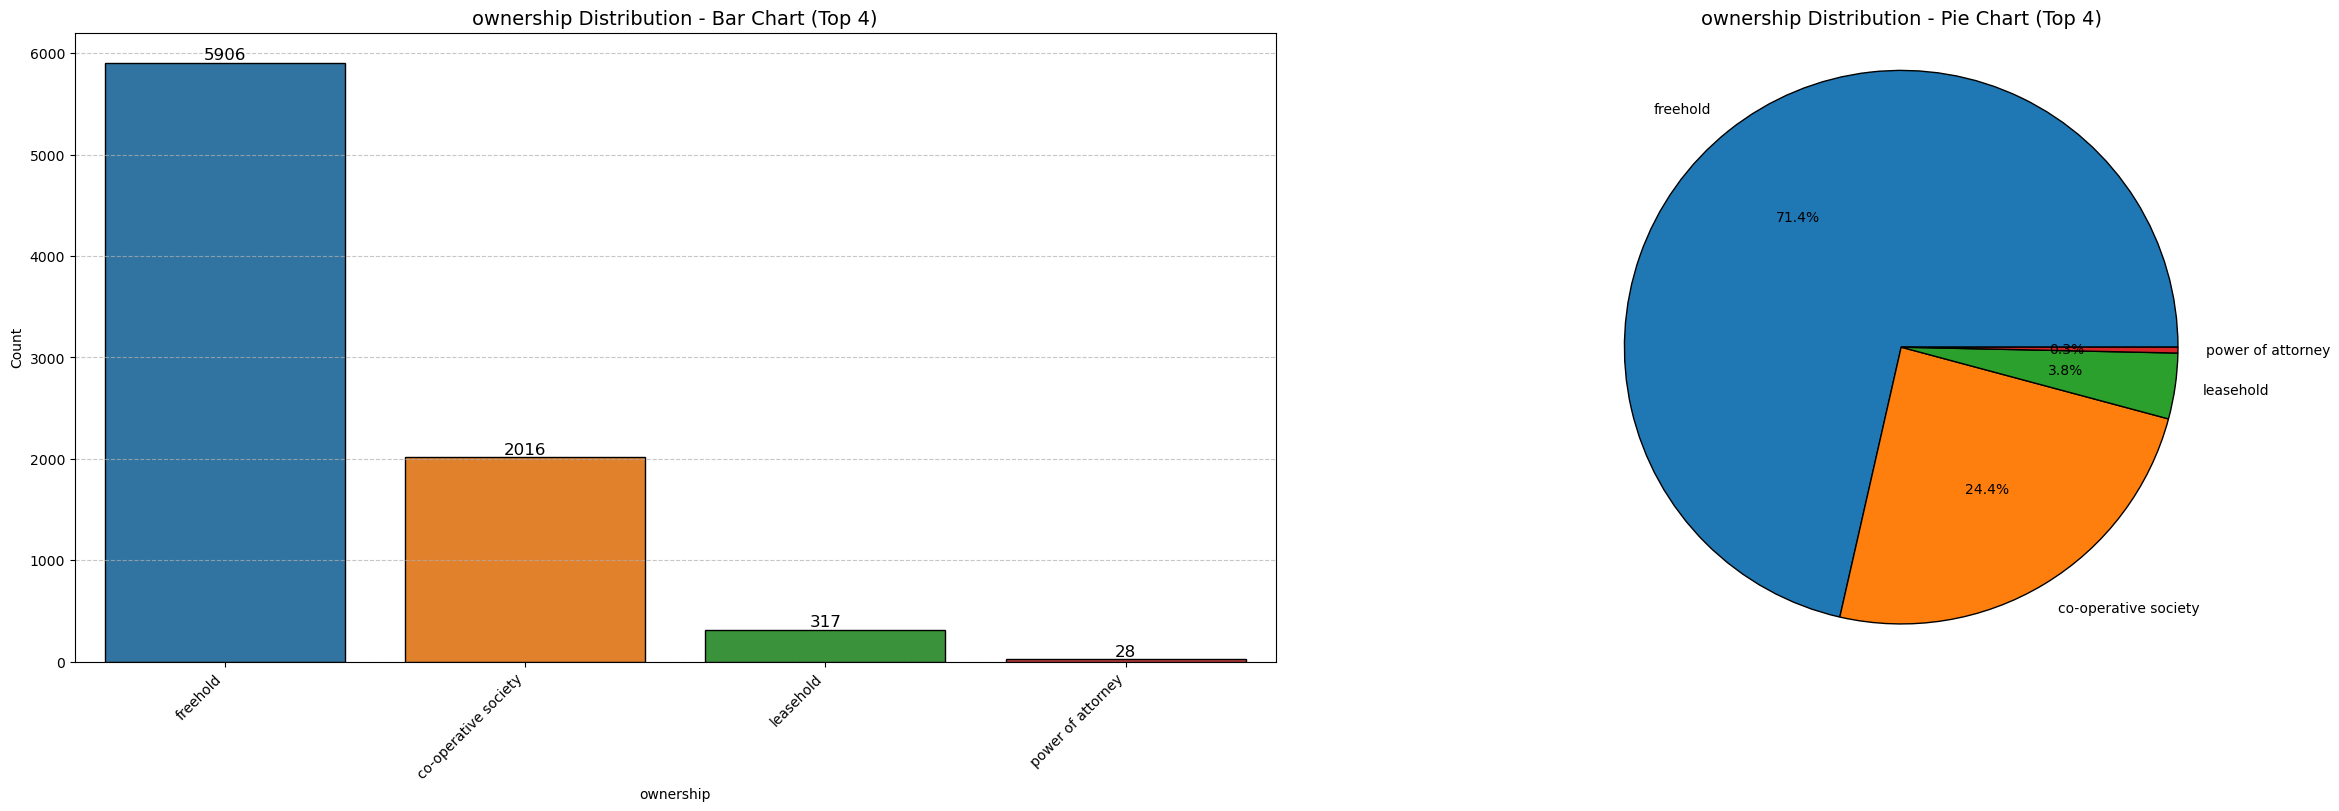

In [121]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'ownership', bar_top_n=4, pie_top_n=4)

`observation`
- freehold - owner has complete ownership of both the building and the land it is built on.
- leasehold - buyer owns the building but not the land it is built on.the land is leased from a landlord (often referred to as the freeholder) for a specific period, typically ranging from 30 to 99 years or more.
- Co-operative society in property ownership refers to a housing arrangement where the property (e.g., an apartment building) is owned and managed by a co-operative society
- Power of Attorney (PoA) in property allows a person (the principal) to authorize another (the agent) to manage, sell, lease, or transfer property on their behalf, without granting ownership.

`observation`
- 3590 missing values
- most of the properties are from freehold properties 71.4% followed by the co-op society

## furnish

In [122]:
cat_summary(df, 'furnish', top_n=3, threshold=90)

--------------------------------------------------
Quick Glance:


0    unfurnished
1    unfurnished
2    unfurnished
3    unfurnished
4    unfurnished
Name: furnish, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 3 categories
Missing Data   : 39 rows (0.33 %)
Available Data : 11,818 / 11,857 rows
--------------------------------------------------
summary:


count         11818
unique            3
top     unfurnished
freq           7461

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                   
unfurnished   7461       63.13        63.13


1 Categories in 'furnish' with cumulative percentage ≤ 90%:
['unfurnished']


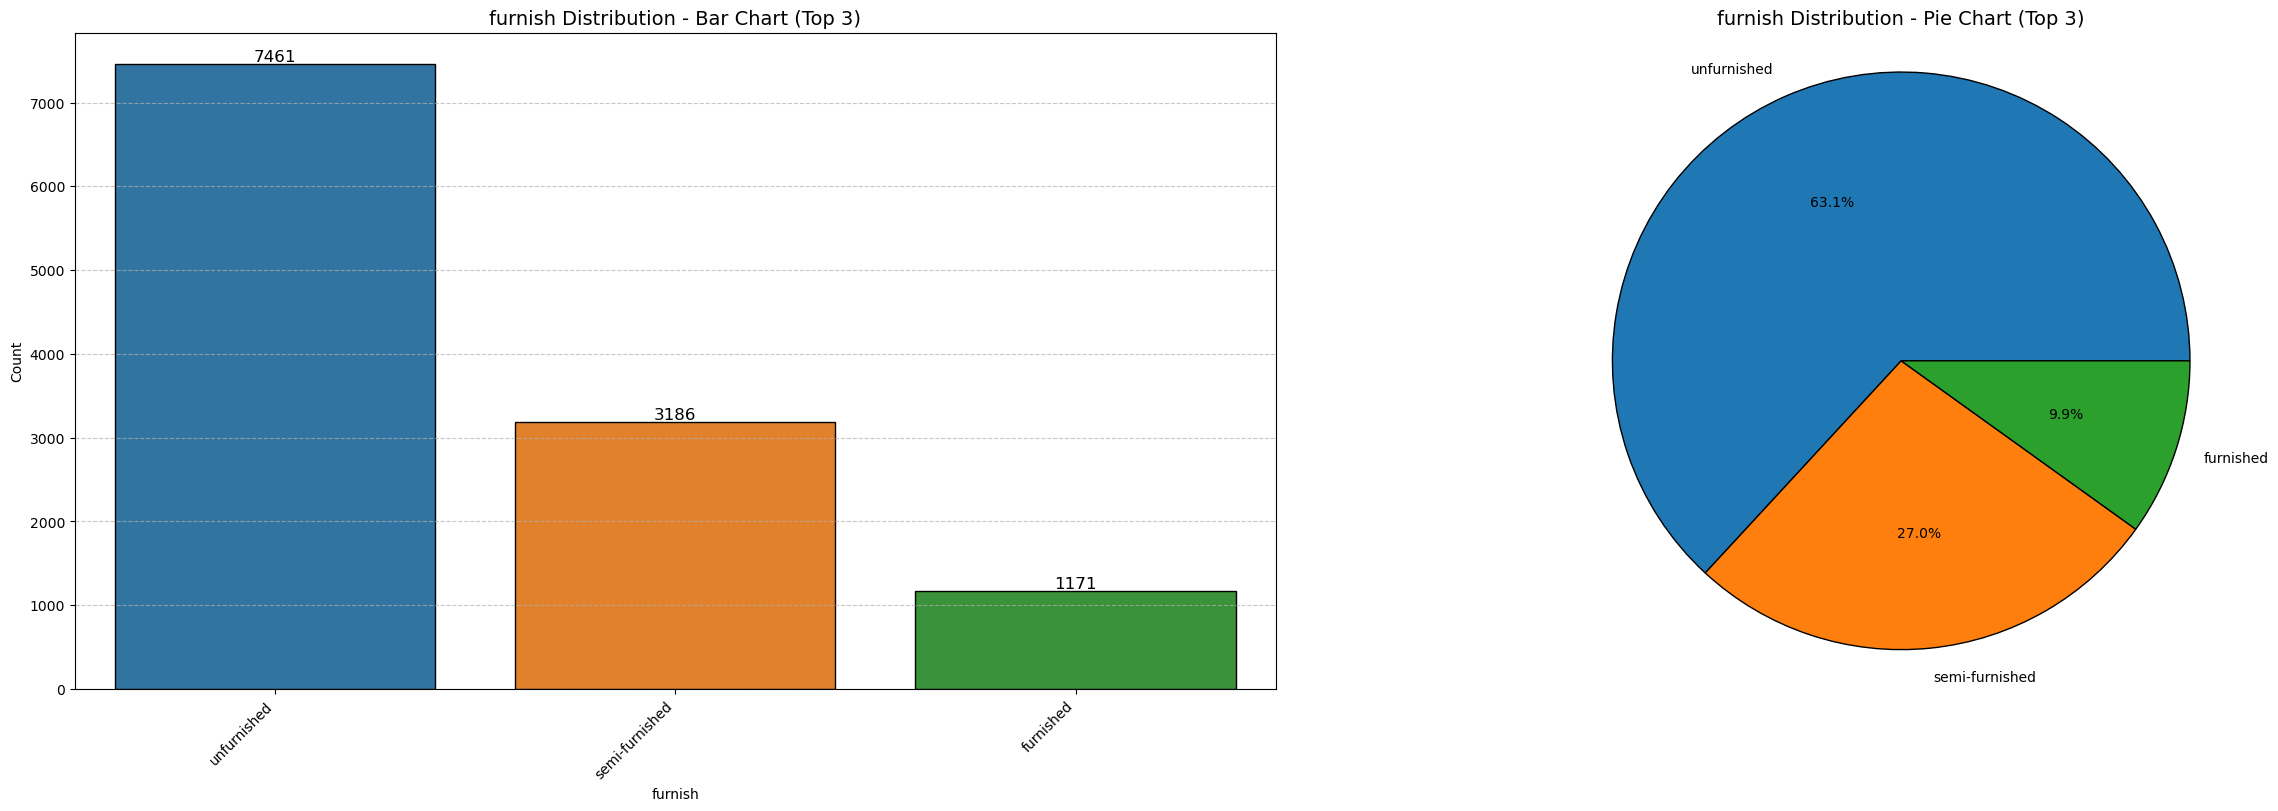

In [123]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'furnish', bar_top_n=3, pie_top_n=3)

`observation`
- 39 missing values
- unfurnished(63.10%) properties are more followed by semi-furnished(27%) and furnished(9.9%)

## overlooking

In [124]:
cat_summary(df, 'overlooking', top_n=7, threshold=90)

--------------------------------------------------
Quick Glance:


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: overlooking, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 7 categories
Missing Data   : 3,945 rows (33.27 %)
Available Data : 7,912 / 11,857 rows
--------------------------------------------------
summary:


count        7912
unique          7
top     main road
freq         2240

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                                    
main road                      2240       28.31        28.31
garden/park, main road         1788       22.60        50.91
garden/park, main road, pool   1746       22.07        72.98


3 Categories in 'overlooking' with cumulative percentage ≤ 90%:
['main road', 'garden/park, main road', 'garden/park, main road, pool']


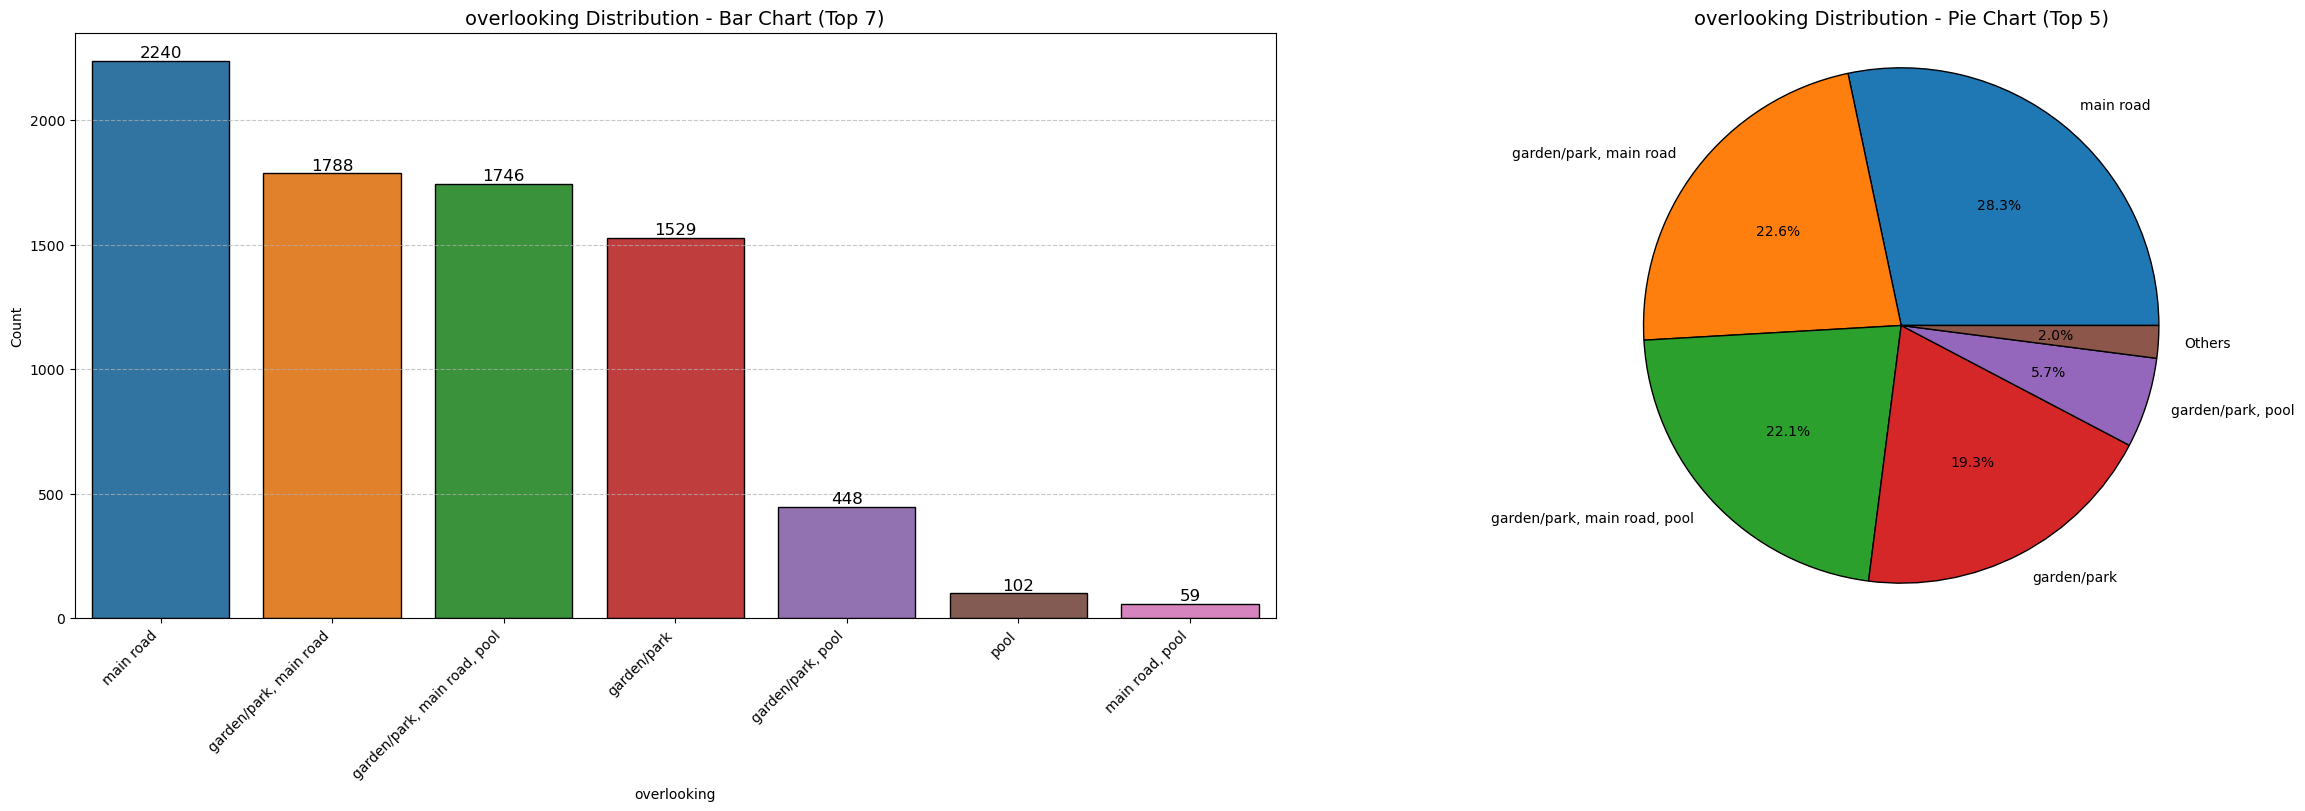

In [125]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'overlooking', bar_top_n=7, pie_top_n=5)

`observation`
- 3945 missing values
- main road and garden/park are the most common "overlooking" categories
- make 5th category as other(pool) which can have this combination garden/park, pool or main road, pool

## facing

In [126]:
cat_summary(df, 'facing', top_n=8, threshold=90)

--------------------------------------------------
Quick Glance:


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: facing, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 8 categories
Missing Data   : 3,716 rows (31.34 %)
Available Data : 8,141 / 11,857 rows
--------------------------------------------------
summary:


count   8141
unique     8
top     east
freq    4721

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                    
east           4721       57.99        57.99
north - east   1262       15.50        73.49
west            915       11.24        84.73


3 Categories in 'facing' with cumulative percentage ≤ 90%:
['east', 'north - east', 'west']


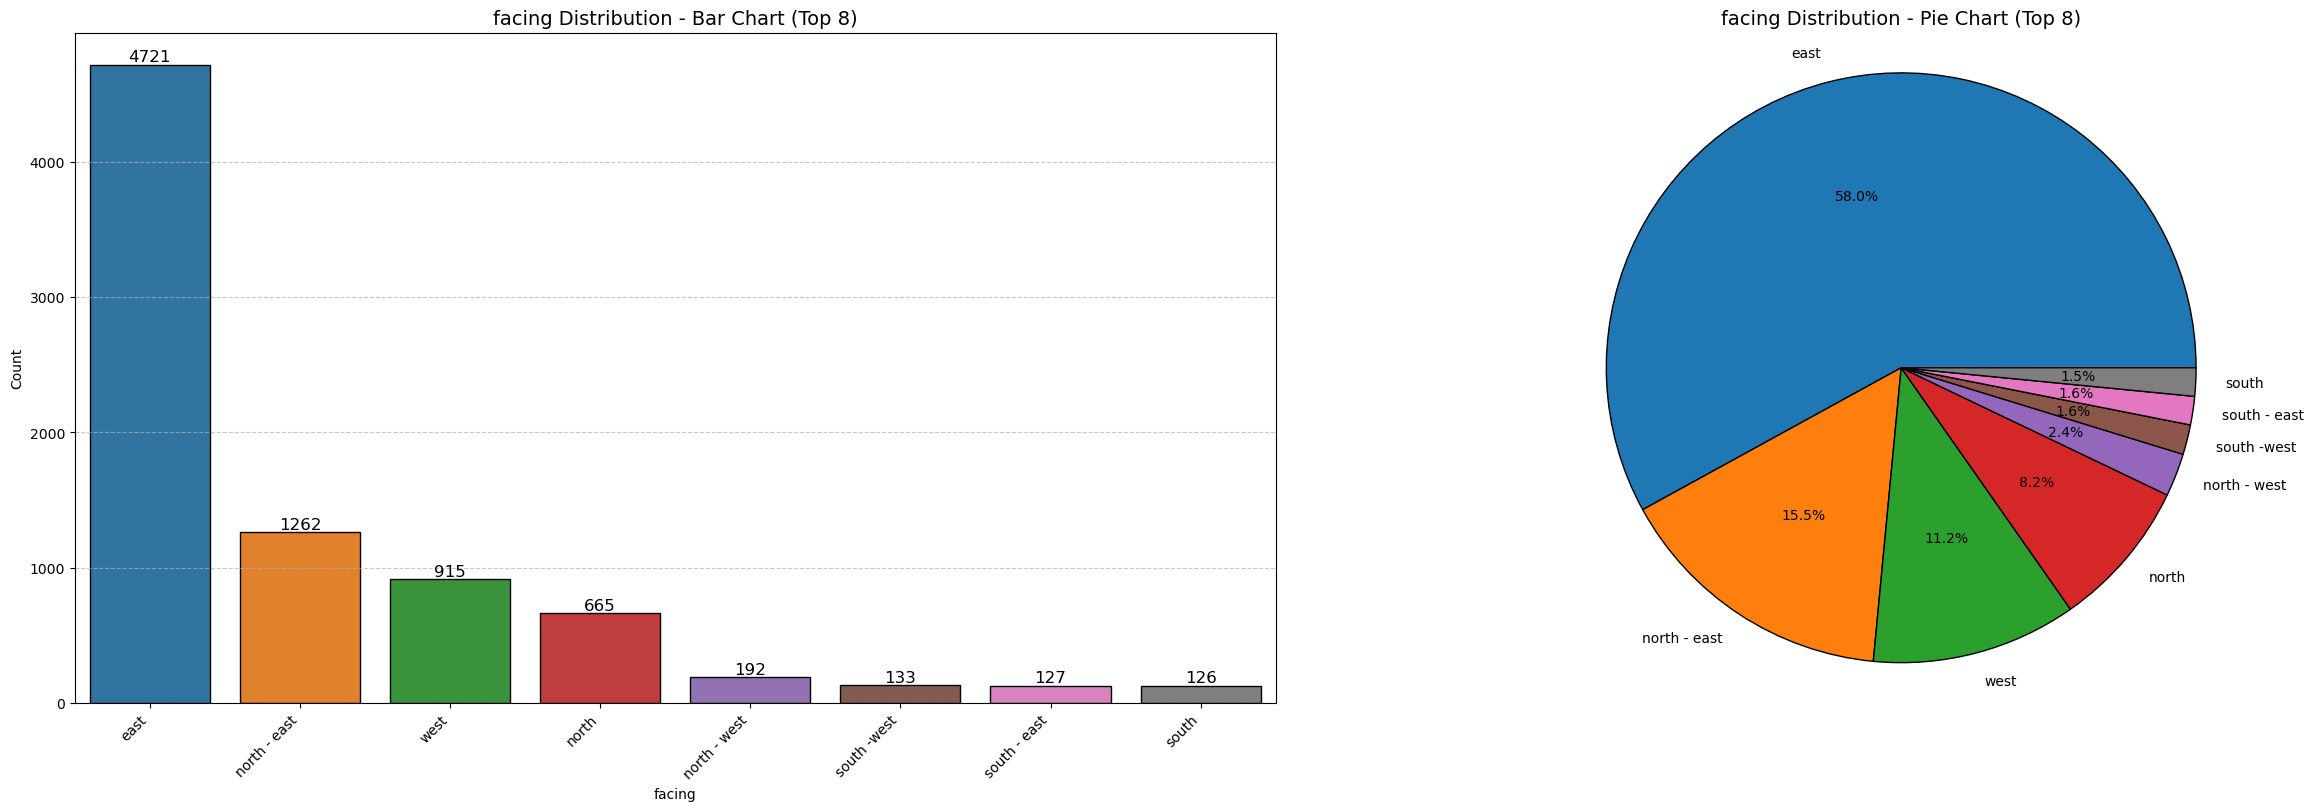

In [127]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'facing', bar_top_n=8, pie_top_n=8)

`observation`
- 3716 missing values
- 58.00% properties have east facing followed by north-east(15.5%) and west(11.2%)
- all other facing are less than 10%

## extra_rooms

In [128]:
cat_summary(df, 'extra_rooms', top_n=16, threshold=90)

--------------------------------------------------
Quick Glance:


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: extra_rooms, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 35 categories
Missing Data   : 5,275 rows (44.49 %)
Available Data : 6,582 / 11,857 rows
--------------------------------------------------
summary:


count            6582
unique             35
top     none of these
freq             2999

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                                   
none of these                 2999       45.56        45.56
store                         1109       16.85        62.41
puja                           741       11.26        73.67
study                          309        4.69        78.36
servant                        292        4.44        82.80
puja, store                    225        3.42        86.22
puja, study, store, servant    224        3.40        89.62


7 Categories in 'extra_rooms' with cumulative percentage ≤ 90%:
['none of these', 'store', 'puja', 'study', 'servant', 'puja, store', 'puja, study, store, servant']


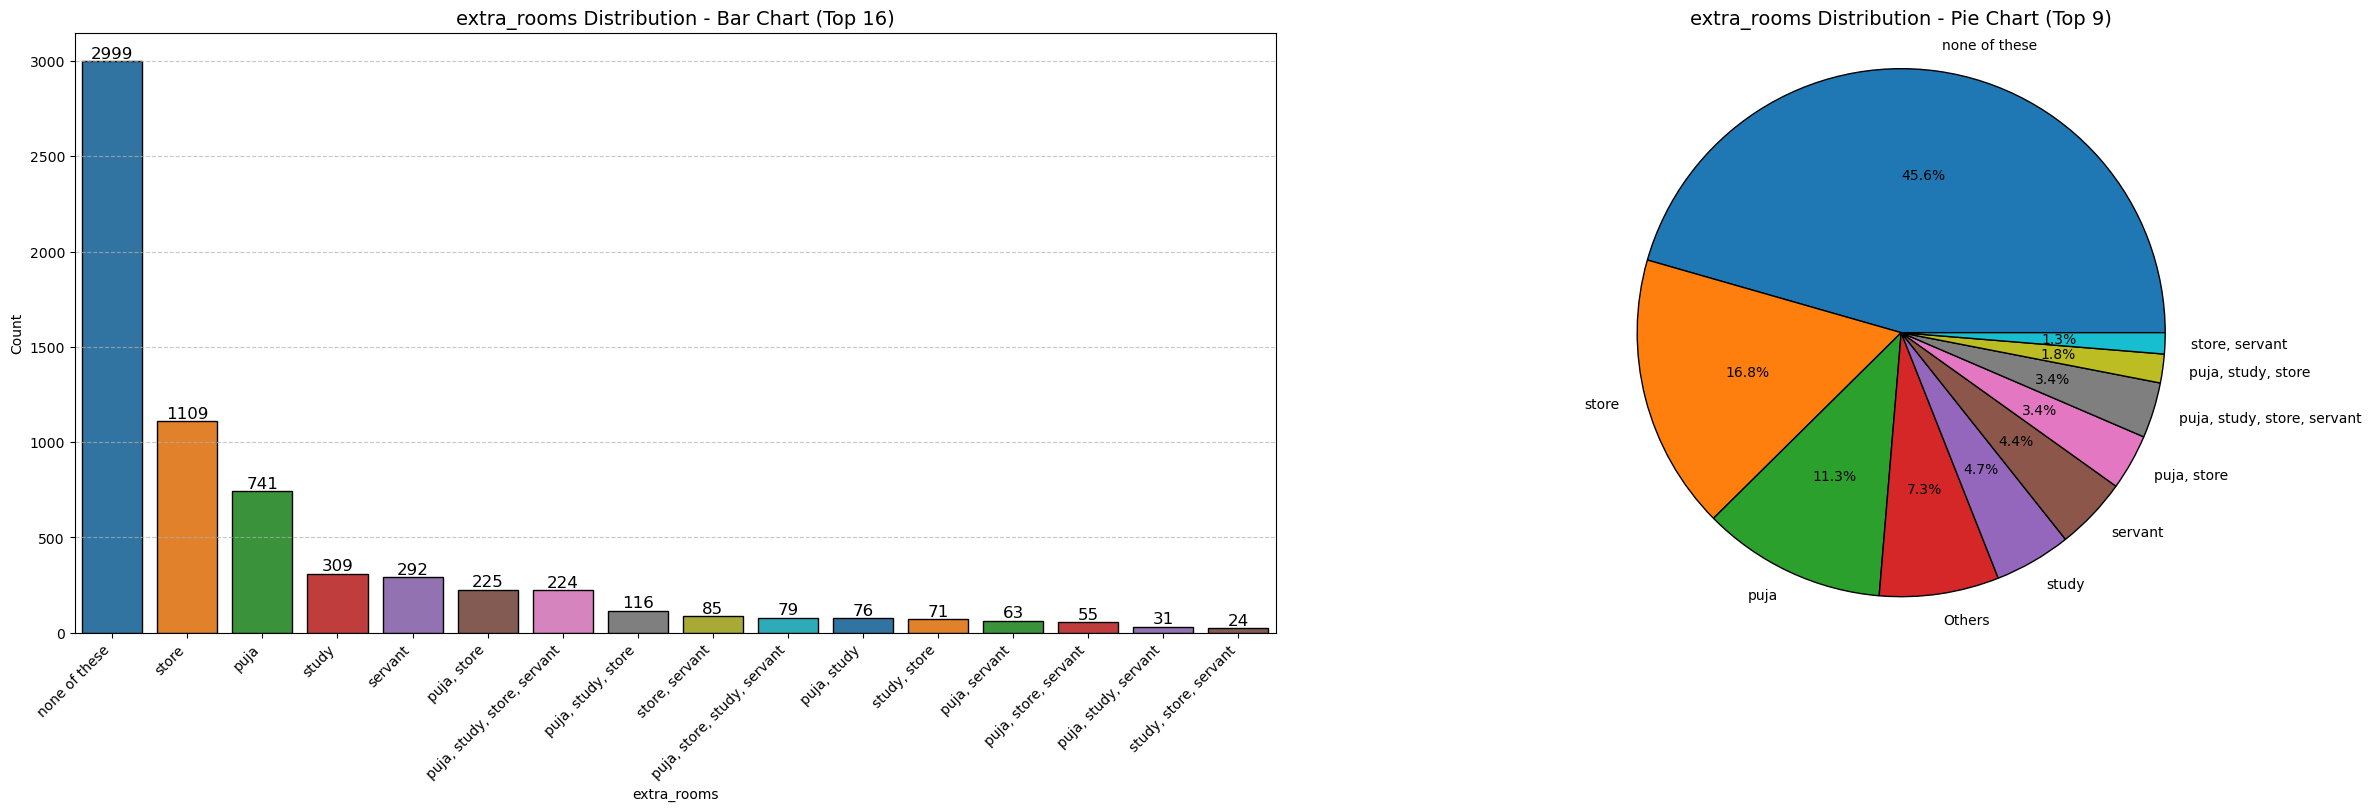

In [129]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'extra_rooms', bar_top_n=16, pie_top_n=9)

`observation`
- 5277 missing values
- 45.6% properties dont have extra rooms
- most properties have store room followed by puja,study,servant
- feature engineering for this column eg: puja,servant so consider this as 2 rooms 

## price_category

In [130]:
cat_summary(df, 'price_category', top_n=13, threshold=90)

--------------------------------------------------
Quick Glance:


0    1.00-1.99
1    2.00-2.99
2    1.00-1.99
3    1.00-1.99
4    1.00-1.99
Name: price_category, dtype: category
Categories (13, object): ['0.00-0.99' < '1.00-1.99' < '2.00-2.99' < '3.00-3.99' ... '9.00-9.99' < '10.00-14.99' < '15.00-20.00' < '20.00 and above']

--------------------------------------------------
Meta-data
Data Type      : category
Cardinality    : 13 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 11,857 / 11,857 rows
--------------------------------------------------
summary:


count       11857
unique         13
top     1.00-1.99
freq         3455

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                 
1.00-1.99   3455       29.14        29.14
0.00-0.99   3155       26.61        55.75
2.00-2.99   1998       16.85        72.60
3.00-3.99   1071        9.03        81.63
4.00-4.99    571        4.82        86.45
5.00-5.99    414        3.49        89.94


6 Categories in 'price_category' with cumulative percentage ≤ 90%:
['1.00-1.99', '0.00-0.99', '2.00-2.99', '3.00-3.99', '4.00-4.99', '5.00-5.99']


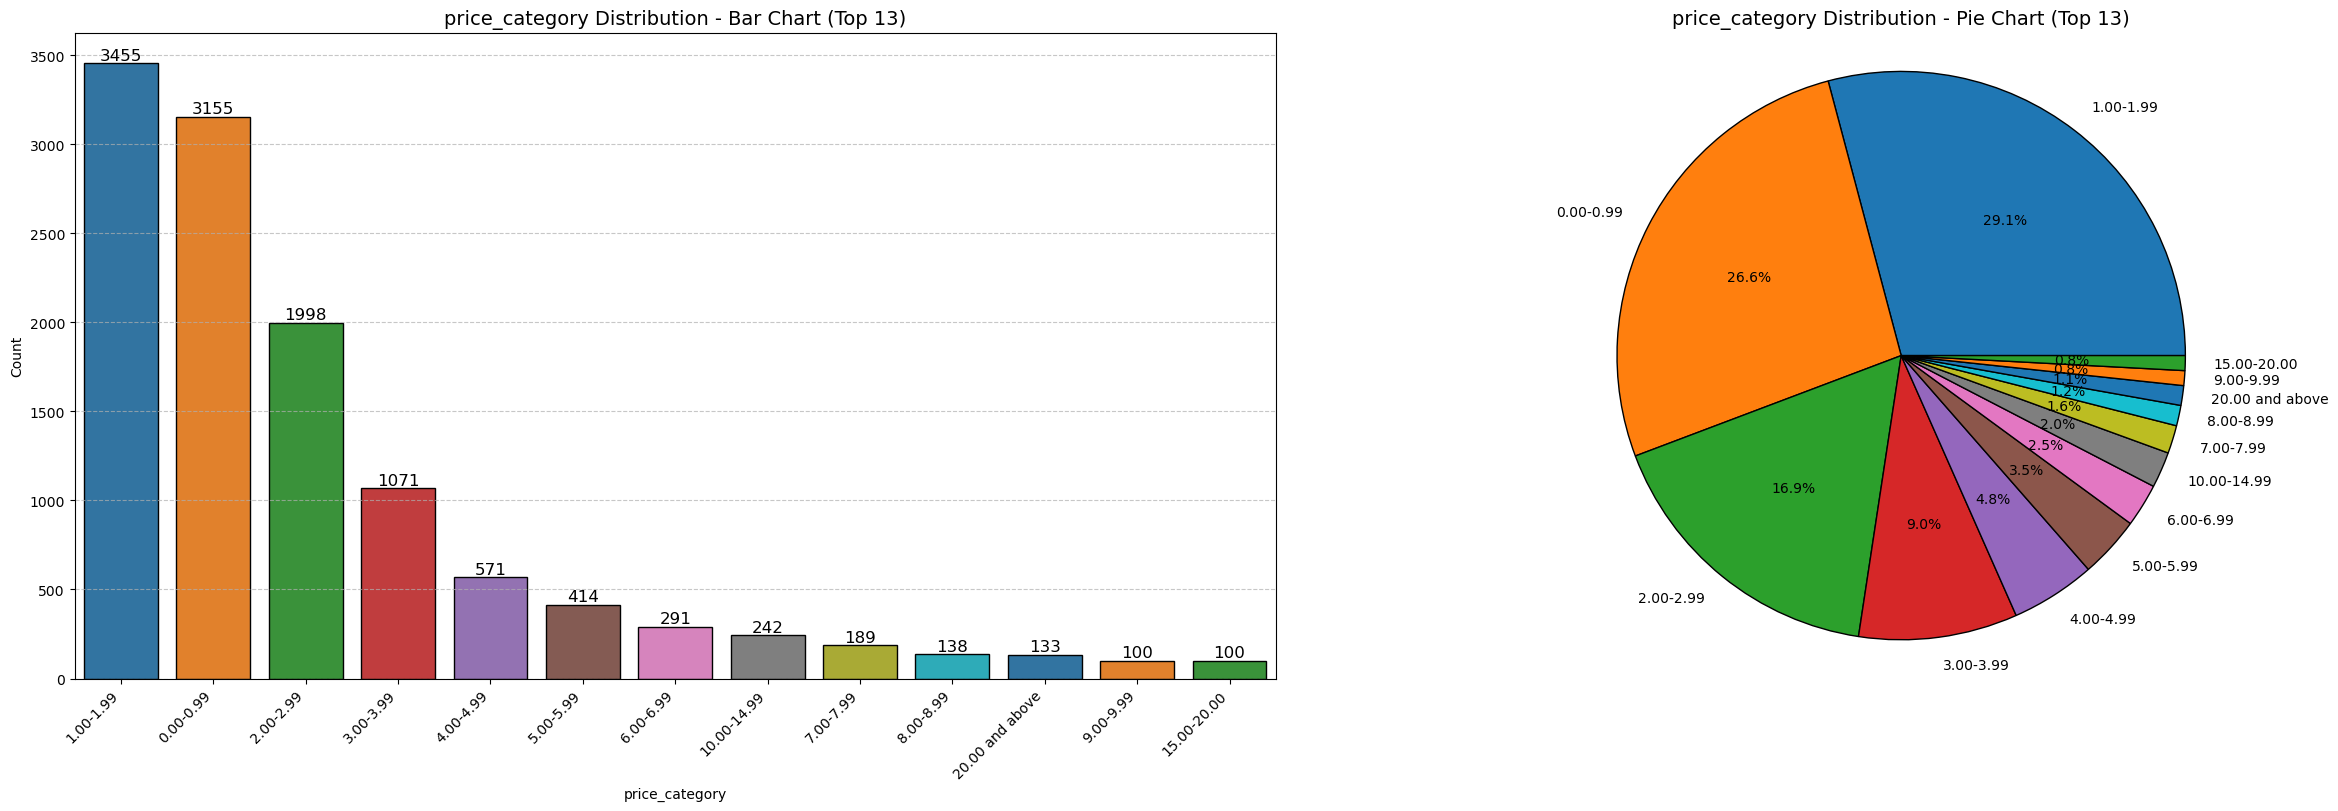

In [131]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'price_category', bar_top_n=13, pie_top_n=13)

`observation`
- 80% properties are below 4 cr

## seller

In [132]:
cat_summary(df, 'seller', top_n=10, threshold=100)

--------------------------------------------------
Quick Glance:


0       organization
1    realestateagent
2       organization
3       organization
4       organization
Name: seller, dtype: object

--------------------------------------------------
Meta-data
Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 11,857 / 11,857 rows
--------------------------------------------------
summary:


count             11857
unique                3
top     realestateagent
freq               8096

--------------------------------------------------
Categories Distribution:


count  percentage  cum_percent
category                                       
realestateagent   8096       68.28        68.28
person            3401       28.68        96.96
organization       360        3.04       100.00


3 Categories in 'seller' with cumulative percentage ≤ 100%:
['realestateagent', 'person', 'organization']


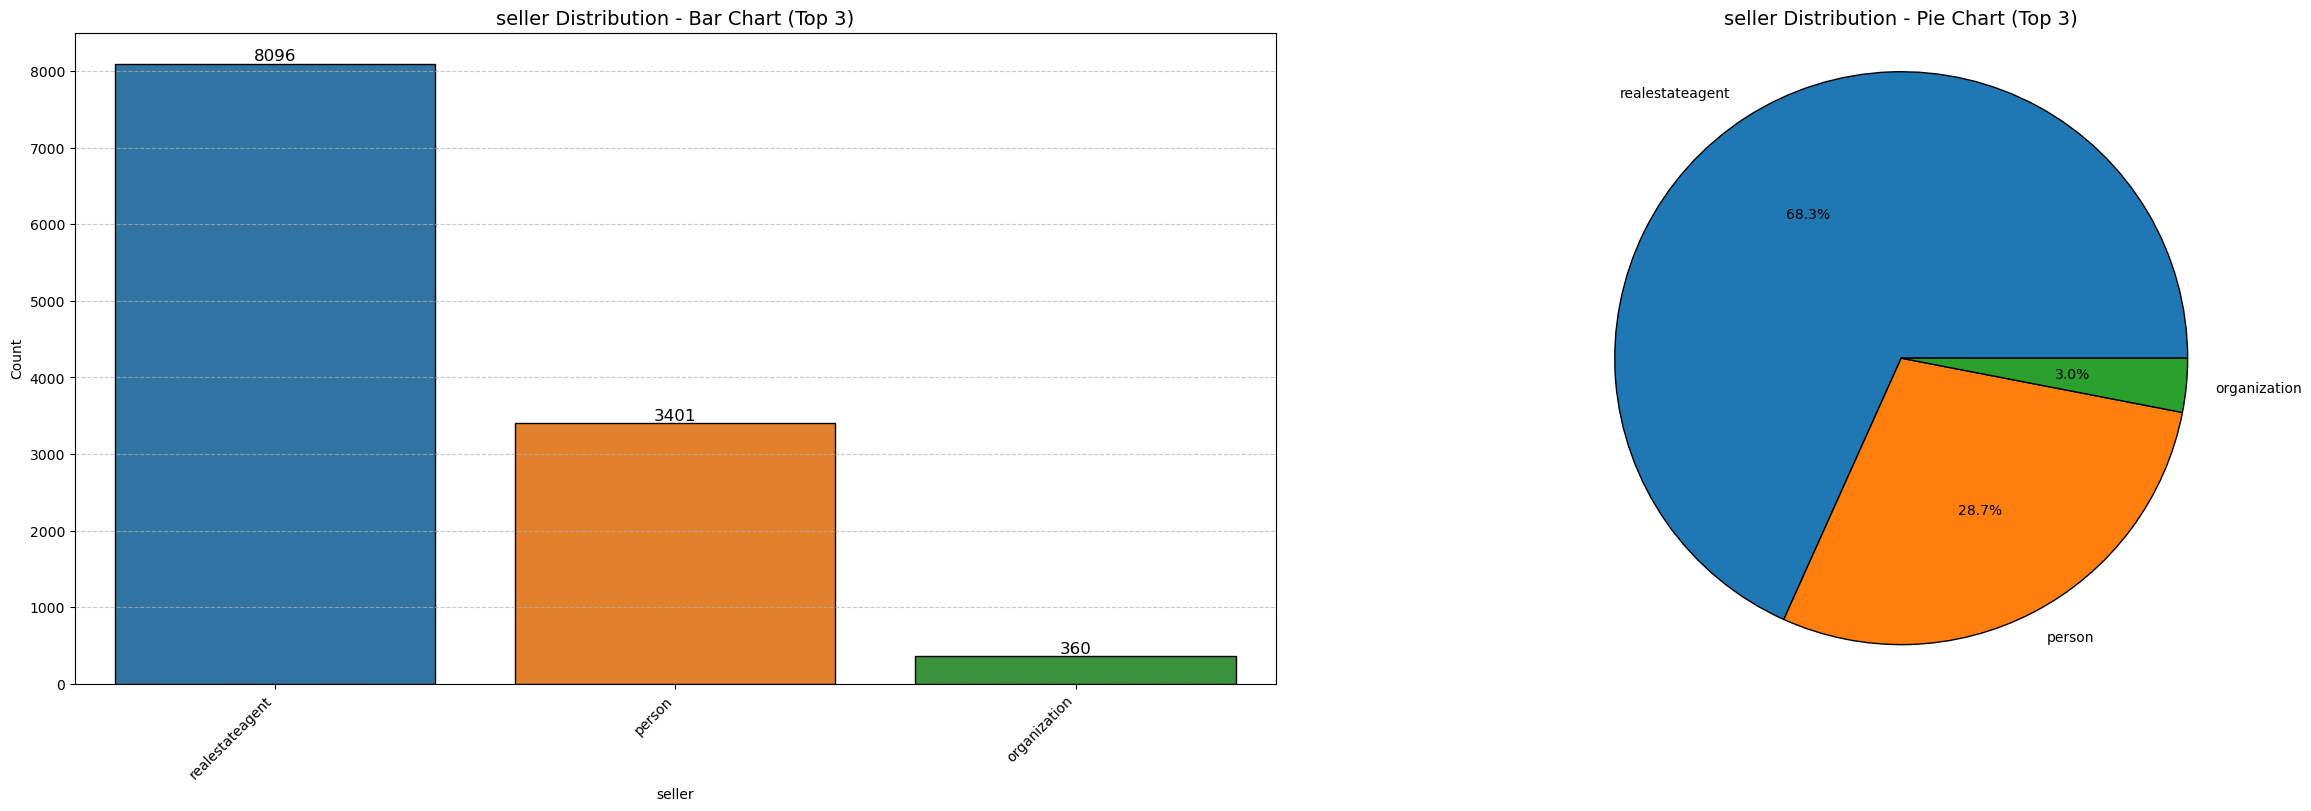

In [133]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'seller', bar_top_n=3, pie_top_n=3)

`observations`
- The column represents the entity responsible for selling the property.  
- There are no missing values in this column.  
- 68.30% of properties are listed by estate agents acting as brokers to facilitate sales.  
- 28.70% of properties are being sold directly by individuals (could be owners or estate agents as well).  
- 3.00% of properties are listed for sale by organizations.  

In [134]:
df.shape

(11857, 53)

In [135]:
df.columns

Index(['id', 'builder', 'project_name', 'project_in_acres', 'location', 'city',
       'lattitude', 'longitude', 'property_type', 'status', 'construction',
       'ownership', 'flat_on_floor', 'total_floor', 'furnish', 'area', 'bed',
       'bath', 'balcony', 'lift', 'parking', 'overlooking', 'facing',
       'flooring', 'extra_rooms', 'costpersqft', 'emi', 'price_category',
       'price', 'education_mean_km', 'education_min_km',
       'education_within_2km', 'transport_mean_km', 'transport_min_km',
       'transport_within_2km', 'shopping_centre_mean_km',
       'shopping_centre_min_km', 'shopping_centre_within_2km',
       'commercial_hub_mean_km', 'commercial_hub_min_km',
       'commercial_hub_within_2km', 'hospital_mean_km', 'hospital_min_km',
       'hospital_within_2km', 'tourist_mean_km', 'tourist_min_km',
       'tourist_within_2km', 'overall_min_mean_km', 'overall_avg_mean_km',
       'overall_min_min_km', 'overall_avg_min_km', 'total_within_2km',
       'seller'],
      dt

## In below approach we fill the missing values in distance_cols using location and project_name column
apply this below method after train test split

In [136]:
def fill_na_with_group_min(df, col, group_cols):
    """
    Fill NaN values in `col` using group-wise minimums based on the provided `group_cols` list.
    The function applies each group level in order. Skips if the group key is NaN.
    """
    for group_col in group_cols:
        group_min = df.groupby(group_col, dropna=True)[col].min()
        df[col] = df.apply(
            lambda row: (
                group_min[row[group_col]] if pd.isna(row[col]) and pd.notna(row[group_col])
                else row[col]
            ),
            axis=1
        )
    return df

# Example usage for multiple distance columns
distance_cols = [
    'education_mean_km', 'education_min_km', 'education_within_2km',
    'transport_mean_km', 'transport_min_km', 'transport_within_2km',
    'shopping_centre_mean_km', 'shopping_centre_min_km', 'shopping_centre_within_2km',
    'commercial_hub_mean_km', 'commercial_hub_min_km', 'commercial_hub_within_2km',
    'hospital_mean_km', 'hospital_min_km', 'hospital_within_2km',
    'tourist_mean_km', 'tourist_min_km', 'tourist_within_2km',
    'overall_min_mean_km', 'overall_avg_mean_km',
    'overall_min_min_km', 'overall_avg_min_km', 'total_within_2km'
]

# Apply for each distance column
for col in distance_cols:
    df = fill_na_with_group_min(df, col, group_cols=['location', 'project_name'])
